# QF627 G1 Programming and Computational Finance

## Group Take-Home Assessment


👋 Hi Team,

The take-home group assignment is yet another intriguing task in computational finance—building your trading strategy to beat the market. Yes, this is not an easy task given the stage of your learning for now. Thus, rather than trying to predict the future, the take-home group project asks you to employ backtesting to test your strategies.

> Note that this is for assignment purposes, and you are running backtesting here. Recall that even if you could beat the market in the past, that does not mean that you will be able to do so in the future.

* You will build your trading strategy using the past 20 years (November 2004 through October 2023) of S&P 500 data, extracting the data from Yahoo Finance. Your starting capital is set at $100,000.


Wishes 😊

> I wish you the best, Team!

## <a id = "top">Table of Contents</a> ✌

## [Part 1. Building of Trading Strategies](#p1)

### [Part 1.1 Momentum Trading Strategies](#p1.1)

> #### [Part 1.1.1 Simple Moving Average Crossover](#p1.1.1)
> #### [Part 1.1.2 Time Series Momentum](#p1.1.2)
> #### [Part 1.1.3 MACD](#p1.1.3)

### [Part 1.2 Mean-Reversion Trading Strategies](#p1.2)

> #### [Part 1.2.1 Simple Mean-Reversion](#p1.2.1)
> #### [Part 1.2.2 RSI](#p1.2.2)

### [Part 1.3 Supervised Machine Learning](#p1.3)

## [Part 2. Backtesting of Trading Strategies](#p2)

### [Part 2.1 Momentum Trading Strategies](#p2.1)

> #### [Part 2.1.1 Simple Moving Average Crossover](#p2.1.1)
> #### [Part 2.1.2 Time Series Momentum](#p2.1.2)
> #### [Part 2.1.3 MACD](#p2.1.3)

### [Part 2.2 Mean-Reversion Trading Strategies](#p2.2)

> #### [Part 2.2.1 Simple Mean-Reversion](#p2.2.1)
> #### [Part 2.2.2 RSI](#p2.2.2)

### [Part 2.3 Supervised Machine Learning](#p2.3)

## [Part 3. Executive Summary of Strategies and Backtesting Results](#p3)

> ### [Part 3.1 Simple Moving Average Crossover](#p3.1)
> ### [Part 3.2 MACD](#p3.2)
> ### [Part 3.3 Support Vector Regression & Elastic Net (Supervised Machine Learning)](#p3.3)
> ### [Part 3.4 Summary of Backtesting Results](#p3.4)

## [Part 4. Self-Critique of Trading Strategies](#p4)

In [1]:
# Import General Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt
import yfinance as yf
import pandas_datareader.data as web
from pandas_datareader import data as pdr
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import trange, tqdm
from time import sleep

# Import Dependencies for ML

# Load Algorithms
from sklearn.linear_model import LinearRegression

# Regularisation
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Ensemble
# Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# K Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor

# Support Vector Machine
from sklearn.svm import SVR

# Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor

# For Data Analysis and Model Evaluation

# For data split
from sklearn.model_selection import train_test_split

# For cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# For assessment
from sklearn.metrics import mean_squared_error

# For feature selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

from pandas.plotting import scatter_matrix

# For pre-processing
from sklearn.preprocessing import StandardScaler

# For assumption checks for time series
from statsmodels.graphics.tsaplots import plot_acf

# Time Series
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

In [2]:
# Import SPY Data
start = dt.datetime(2004, 11, 1)
end = dt.datetime(2023, 11, 1)

data =\
(    web
     .get_data_yahoo("SPY",
                     start,
                     end)
)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-01,113.559998,113.839996,113.199997,113.510002,78.617905,36720900
2004-11-02,113.669998,114.570000,113.220001,113.550003,78.645638,56210000
2004-11-03,115.029999,115.360001,114.239998,114.980003,79.636055,76960200
2004-11-04,114.779999,116.669998,114.680000,116.550003,80.723457,55350300
2004-11-05,117.050003,117.639999,116.489998,117.279999,81.229073,63287200
...,...,...,...,...,...,...
2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200
2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800
2023-10-27,414.190002,414.600006,409.209991,410.679993,410.679993,107367700


## Questions
The core tasks contain a bigger threefold of questions, as follows:

## <a id = "p1">1. </a> <font color = "green"> Building of Trading Strategies </font>  [back to table of contents](#top)

## Part 1 (7 points)
First, you should build a series of trading strategies employing `momentum`, `mean-reversion`, and `machine learning` approaches. As you have learned, within each approach, you could come up with varying strategies depending on how you define them. Here, think about how you’d like to do this in a more efficient and effective manner, building on what you have learned about Python programming throughout the course.

### <a id = "p1.1">1.1 </a> <font color = "green"> Momentum Trading Strategies </font>  [back to table of contents](#top)

### <a id = "p1.1.1">1.1.1 </a> <font color = "green"> Simple Moving Average Crossover </font>  [back to table of contents](#top)

In [4]:
spy = data[["Adj Close"]]
spy

,Adj Close
Date,
2004-11-01,78.617905
2004-11-02,78.645638
2004-11-03,79.636055
2004-11-04,80.723457
2004-11-05,81.229073
...,...
2023-10-25,417.549988
2023-10-26,412.549988
2023-10-27,410.679993


In [5]:
# We need to create a loop to find the appropriate window period to maximize the final return
best_short = 0
best_long = 0
max_final_capital = 0

for short in range(10, 100):  
    for long in range(100, 300): 
        spy['SMA_{}'.format(short)] = spy['Adj Close'].rolling(window=short).mean()
        spy['SMA_{}'.format(long)] = spy['Adj Close'].rolling(window=long).mean()
        spy['Positions'] = np.where(spy['SMA_{}'.format(short)] > spy['SMA_{}'.format(long)], 1, -1)
        spy['SPY_Returns'] = np.log(spy['Adj Close'] / spy['Adj Close'].shift(1))
        spy['Strategy_Returns'] = spy['Positions'].shift(1) * spy['SPY_Returns']
        spy['Cumulative_Returns'] = spy['Strategy_Returns'].cumsum().apply(np.exp)

        final_capital = 100000 * spy['Cumulative_Returns'][-1]

        if final_capital > max_final_capital:
            max_final_capital = final_capital
            best_short = short
            best_long = long

print(f"best short period: {best_short}")
print(f"best long period: {best_long}")
print(f"final capital: {max_final_capital}")


spy['SMA_{}'.format(best_short)] = spy['Adj Close'].rolling(window=best_short).mean()
spy['SMA_{}'.format(best_long)] = spy['Adj Close'].rolling(window=best_long).mean()
spy['Positions'] = np.where(spy['SMA_{}'.format(best_short)] > spy['SMA_{}'.format(best_long)], 1, -1)
spy['SPY_Returns'] = np.log(spy['Adj Close'] / spy['Adj Close'].shift(1))
spy['Strategy_Returns'] = spy['Positions'].shift(1) * spy['SPY_Returns']
spy['Cumulative_Returns'] = spy['Strategy_Returns'].cumsum().apply(np.exp)
spy["Max_Gross_Performance"] = spy["Cumulative_Returns"].cummax()

best short period: 46
best long period: 161
final capital: 460541.91628087196


In [6]:
spy

,Adj Close,SMA_10,SMA_100,Positions,SPY_Returns,Strategy_Returns,Cumulative_Returns,SMA_101,SMA_102,SMA_103,...,SMA_91,SMA_92,SMA_93,SMA_94,SMA_95,SMA_96,SMA_97,SMA_98,SMA_99,Max_Gross_Performance
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-01,78.617905,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-02,78.645638,NaN,NaN,-1,0.000353,-0.000353,0.999647,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999647
2004-11-03,79.636055,NaN,NaN,-1,0.012515,-0.012515,0.987215,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999647
2004-11-04,80.723457,NaN,NaN,-1,0.013562,-0.013562,0.973916,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999647
2004-11-05,81.229073,NaN,NaN,-1,0.006244,-0.006244,0.967854,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,417.549988,427.668997,438.608015,1,-0.014456,-0.014456,4.598261,438.471676,438.278638,438.051081,...,439.537112,439.535753,439.476563,439.413140,439.321164,439.190772,439.055188,438.896233,438.755331,5.023683
2023-10-26,412.549988,425.557996,438.493278,1,-0.012047,-0.012047,4.543198,438.350015,438.217542,438.028845,...,439.258373,439.243774,439.245583,439.190110,439.130370,439.042298,438.916125,438.784727,438.630109,5.023683
2023-10-27,410.679993,423.475995,438.350608,1,-0.004543,-0.004543,4.522605,438.217899,438.078740,437.950187,...,438.984050,438.947738,438.936637,438.941694,438.890004,438.834012,438.749903,438.628001,438.500840,5.023683


### <a id = "p1.1.2">1.1.2 </a> <font color = "green"> Time Series Momentum </font>  [back to table of contents](#top)

In [7]:
spy_close =\
(
    pd
    .DataFrame(data["Adj Close"]
              )
    .rename(columns = {"Adj Close": "Price"}
           )
)

In [8]:
spy_close["SPY_Returns"] =\
(
    np
    .log(spy_close["Price"]
         / 
         spy_close["Price"].shift(1)
        )
)
spy_close["positions"] =\
(
    np
    .sign(spy_close["SPY_Returns"]
         )
)

In [9]:
spy_close["Strategy_Returns"] =\
(
    spy_close["positions"]
    .shift(1)
    *
    spy_close["SPY_Returns"] # passive following
)
spy_close["Cumulative_Returns"] = spy_close["Strategy_Returns"].cumsum().apply(np.exp)
spy_close["Max_Gross_Performance"] = spy_close["Cumulative_Returns"].cummax()
spy_close

,Price,SPY_Returns,positions,Strategy_Returns,Cumulative_Returns,Max_Gross_Performance
Date,,,,,,
2004-11-01,78.617905,NaN,NaN,NaN,NaN,NaN
2004-11-02,78.645638,0.000353,1.0,NaN,NaN,NaN
2004-11-03,79.636055,0.012515,1.0,0.012515,1.012593,1.012593
2004-11-04,80.723457,0.013562,1.0,0.013562,1.026420,1.026420
2004-11-05,81.229073,0.006244,1.0,0.006244,1.032849,1.032849
...,...,...,...,...,...,...
2023-10-25,417.549988,-0.014456,-1.0,-0.014456,0.201819,1.101752
2023-10-26,412.549988,-0.012047,-1.0,0.012047,0.204265,1.101752
2023-10-27,410.679993,-0.004543,-1.0,0.004543,0.205195,1.101752


### <a id = "p1.1.3">1.1.3 </a> <font color = "green"> MACD </font>  [back to table of contents](#top)

In [10]:
SPY_macd = data[['Adj Close']]

best short period: 24
best long period: 146
final_capital_macd: 293699.48172650335


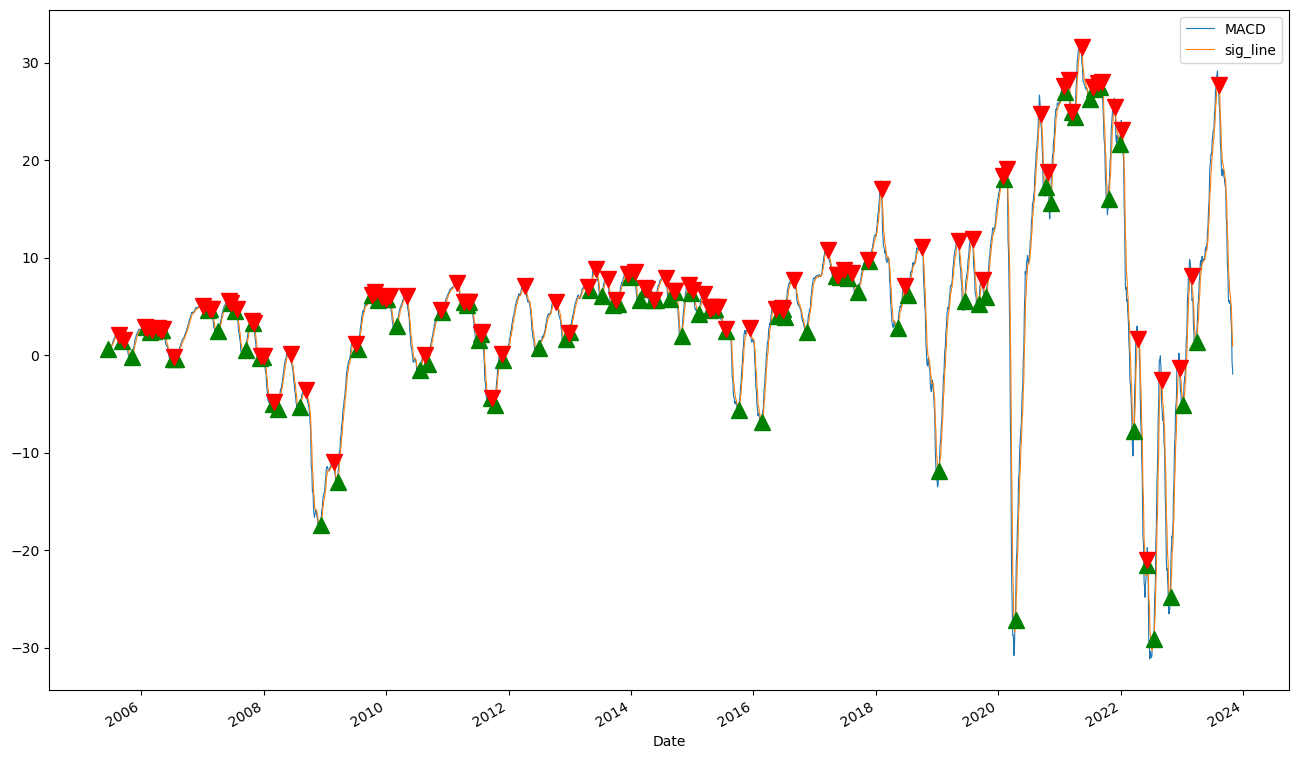

In [11]:
best_short = 0
best_long = 0
max_final_capital_macd = 0

short_range = range(10, 40)
long_range = range(40, 150)

for short in short_range:
    for long in long_range:
        SPY_macd['shorter_EMA'] = SPY_macd['Adj Close'].ewm(span=short, min_periods=short).mean()
        SPY_macd['longer_EMA'] = SPY_macd['Adj Close'].ewm(span=long, min_periods=long).mean()
        SPY_macd['MACD'] = SPY_macd['shorter_EMA'] - SPY_macd['longer_EMA']
        SPY_macd["sig_line"] = SPY_macd['MACD'].ewm(span=9, min_periods=9).mean()
        
        SPY_macd["Positions"] = np.where(SPY_macd['MACD'] > SPY_macd['sig_line'], 1.0, 0.0)
        
        SPY_macd["BUY_or_SELL"] = SPY_macd["Positions"].diff()

        SPY_macd['SPY_Returns'] = np.log(SPY_macd['Adj Close'] / SPY_macd['Adj Close'].shift(1))
        SPY_macd['Strategy_Returns'] = SPY_macd['SPY_Returns'] * SPY_macd['Positions'].shift(1)
        SPY_macd['Cumulative_Returns'] = SPY_macd['Strategy_Returns'].cumsum().apply(np.exp)

        final_capital_macd = 100000 * SPY_macd['Cumulative_Returns'][-1]

        if final_capital_macd > max_final_capital_macd:
            max_final_capital_macd = final_capital_macd
            best_short = short
            best_long = long

print(f"best short period: {best_short}")
print(f"best long period: {best_long}")
print(f"final_capital_macd: {max_final_capital_macd}")

SPY_macd['shorter_EMA'] = SPY_macd['Adj Close'].ewm(span=best_short, min_periods=best_short).mean()
SPY_macd['longer_EMA'] = SPY_macd['Adj Close'].ewm(span=best_long, min_periods=best_long).mean()
SPY_macd['MACD'] = SPY_macd['shorter_EMA'] - SPY_macd['longer_EMA']
SPY_macd["sig_line"] = SPY_macd['MACD'].ewm(span=9, min_periods=9).mean()
SPY_macd["Positions"] = np.where(SPY_macd['MACD'] > SPY_macd['sig_line'], 1.0, 0.0)
SPY_macd['SPY_Returns'] = np.log(SPY_macd['Adj Close'] / SPY_macd['Adj Close'].shift(1))
SPY_macd['Strategy_Returns'] = SPY_macd['SPY_Returns'] * SPY_macd['Positions'].shift(1)
SPY_macd['Cumulative_Returns'] = SPY_macd['Strategy_Returns'].cumsum().apply(np.exp)

fig, sub = plt.subplots(figsize=[16, 10])
SPY_macd[["MACD", "sig_line"]].plot(ax=sub, style=["-", "-"], lw=0.80)
sub.plot(SPY_macd.loc[SPY_macd.BUY_or_SELL == 1.0].index,
         SPY_macd.sig_line[SPY_macd.BUY_or_SELL == 1.0],
         "^", color="green", markersize=12)
sub.plot(SPY_macd.loc[SPY_macd.BUY_or_SELL == -1.0].index,
         SPY_macd.sig_line[SPY_macd.BUY_or_SELL == -1.0],
         "v", color="red", markersize=12)
plt.show()

In [12]:
SPY_macd["Max_Gross_Performance"] = SPY_macd["Cumulative_Returns"].cummax()
SPY_macd

,Adj Close,shorter_EMA,longer_EMA,MACD,sig_line,Positions,BUY_or_SELL,SPY_Returns,Strategy_Returns,Cumulative_Returns,Max_Gross_Performance
Date,,,,,,,,,,,
2004-11-01,78.617905,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2004-11-02,78.645638,NaN,NaN,NaN,NaN,0.0,0.0,0.000353,0.0,1.000000,1.000000
2004-11-03,79.636055,NaN,NaN,NaN,NaN,0.0,0.0,0.012515,0.0,1.000000,1.000000
2004-11-04,80.723457,NaN,NaN,NaN,NaN,0.0,0.0,0.013562,0.0,1.000000,1.000000
2004-11-05,81.229073,NaN,NaN,NaN,NaN,0.0,0.0,0.006244,0.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,417.549988,429.433139,427.851989,1.581150,3.813854,0.0,0.0,-0.014456,-0.0,2.936995,3.009169
2023-10-26,412.549988,428.082487,427.643798,0.438688,3.138821,0.0,0.0,-0.012047,-0.0,2.936995,3.009169
2023-10-27,410.679993,426.690287,427.412998,-0.722711,2.366514,0.0,0.0,-0.004543,-0.0,2.936995,3.009169


### <a id = "p1.2">1.2 </a> <font color = "green"> Mean-Reversion Trading Strategies </font>  [back to table of contents](#top)

### <a id = "p1.2.1">1.2.1 </a> <font color = "green"> Simple Mean-Reversion </font>  [back to table of contents](#top)

In [13]:
def MeanReversion(dataframe,SMA,threshold):
    
    # We would want to remove the unwated columns from original df
    if all(col in dataframe.columns for col in ['Open', 'High', 'Low', 'Close', 'Volume']):
        dataframe = dataframe.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    
    #Calculate Simple Moving Average
    dataframe[f'SMA_{SMA}'] = \
            dataframe['Adj Close'] \
            .rolling(window=SMA) \
            .mean()

    #Create a Threshold 
    dataframe[f'STD+{threshold}'] = \
        dataframe[f'SMA_{SMA}'] + threshold*(dataframe['Adj Close'].rolling(SMA).std())

    dataframe[f'STD-{threshold}'] = \
            dataframe[f'SMA_{SMA}'] - threshold*(dataframe['Adj Close'].rolling(SMA).std())

    #Calculate the Distance
    dataframe['DISTANCE'] = \
        dataframe['Adj Close'] - dataframe[f'SMA_{SMA}']

    #Create the positions
    dataframe['POSITION'] = \
        np.where(dataframe['DISTANCE'] > (dataframe[f'STD+{threshold}'] - dataframe[f'SMA_{SMA}']),
                 -1, np.nan)

    dataframe['POSITION'] = \
        np.where(dataframe['DISTANCE'] < (dataframe[f'STD-{threshold}'] - dataframe[f'SMA_{SMA}']),
                 1, dataframe['POSITION'])

    dataframe['POSITION'] = \
        np.where(dataframe['DISTANCE'] * dataframe['DISTANCE'].shift(1) < 0,
                 0, dataframe['POSITION'])
    
    #forward fill the NaN Values
    dataframe['POSITION'] = \
        dataframe['POSITION'].ffill()
    
    dataframe['POSITION'] = \
        dataframe['POSITION'].fillna(0)
    
    #Calculate Returns
    dataframe['SPY_Returns'] = \
        np.log(dataframe['Adj Close'] / dataframe['Adj Close'].shift(1))

    #Calculate Strategy Returns
    dataframe['Strategy_Returns'] = \
        dataframe['POSITION'].shift(1) * dataframe['SPY_Returns']

    return dataframe

In [14]:
spy_smr = MeanReversion(data,42,3)
spy_smr["Cumulative_Returns"] = spy_smr["Strategy_Returns"].cumsum().apply(np.exp)
spy_smr["Max_Gross_Performance"] = spy_smr["Cumulative_Returns"].cummax()
spy_smr

,Adj Close,SMA_42,STD+3,STD-3,DISTANCE,POSITION,SPY_Returns,Strategy_Returns,Cumulative_Returns,Max_Gross_Performance
Date,,,,,,,,,,
2004-11-01,78.617905,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2004-11-02,78.645638,NaN,NaN,NaN,NaN,0.0,0.000353,0.0,1.000000,1.000000
2004-11-03,79.636055,NaN,NaN,NaN,NaN,0.0,0.012515,0.0,1.000000,1.000000
2004-11-04,80.723457,NaN,NaN,NaN,NaN,0.0,0.013562,0.0,1.000000,1.000000
2004-11-05,81.229073,NaN,NaN,NaN,NaN,0.0,0.006244,0.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
2023-10-25,417.549988,435.212083,463.675965,406.748200,-17.662095,0.0,-0.014456,-0.0,0.887643,1.081711
2023-10-26,412.549988,434.529851,464.708585,404.351116,-21.979863,0.0,-0.012047,-0.0,0.887643,1.081711
2023-10-27,410.679993,433.651249,465.133144,402.169355,-22.971257,0.0,-0.004543,-0.0,0.887643,1.081711


### <a id = "p1.2.2">1.2.2 </a> <font color = "green"> RSI </font>  [back to table of contents](#top)

In [15]:
# Import data

start_date = dt.datetime(2004, 11, 1)
end_date = dt.datetime(2023, 11, 1)
SPY = pdr.get_data_yahoo("SPY", start = start_date, end = end_date)

# Calculate RSI

SPY["diff"] = SPY["Adj Close"].diff()

SPY["gain"] = np.where(SPY["diff"] > 0 , SPY["diff"], 0)
SPY["loss"] = np.where(SPY["diff"] < 0 , -SPY["diff"], 0)
SPY["gain_av"] = SPY["gain"].rolling(window = 14).mean()
SPY["loss_av"] = SPY["loss"].rolling(window = 14).mean()

SPY["RS"] = SPY["gain_av"] / SPY["loss_av"]

SPY["RSI"] = 100 - (100/(1 + SPY["RS"]))
SPY["RSI"]

[*********************100%%**********************]  1 of 1 completed


Date
2004-11-01          NaN
2004-11-02          NaN
2004-11-03          NaN
2004-11-04          NaN
2004-11-05          NaN
                ...    
2023-10-25    42.447292
2023-10-26    31.520559
2023-10-27    26.036828
2023-10-30    30.157081
2023-10-31    31.350385
Name: RSI, Length: 4783, dtype: float64

In [16]:
SPY["position"] = np.nan

long  = (SPY["RSI"].shift(1) < 30) & (SPY["RSI"] >= 30)
short = (SPY["RSI"].shift(1) > 70) & (SPY["RSI"] <= 70)
exit  = ((SPY['RSI'].shift(1) > 50) & (SPY['RSI'] <= 50)) | ((SPY['RSI'].shift(1) < 50) & (SPY['RSI'] >= 50))

SPY["position"] = np.where(long, 1, SPY["position"])
SPY["position"] = np.where(short, -1, SPY["position"])
SPY["position"] = np.where(exit, 0, SPY["position"])

SPY["position"].ffill(inplace = True)
SPY['position'] = SPY['position'].fillna(0)
SPY["trading_signal"] = SPY["position"].diff()

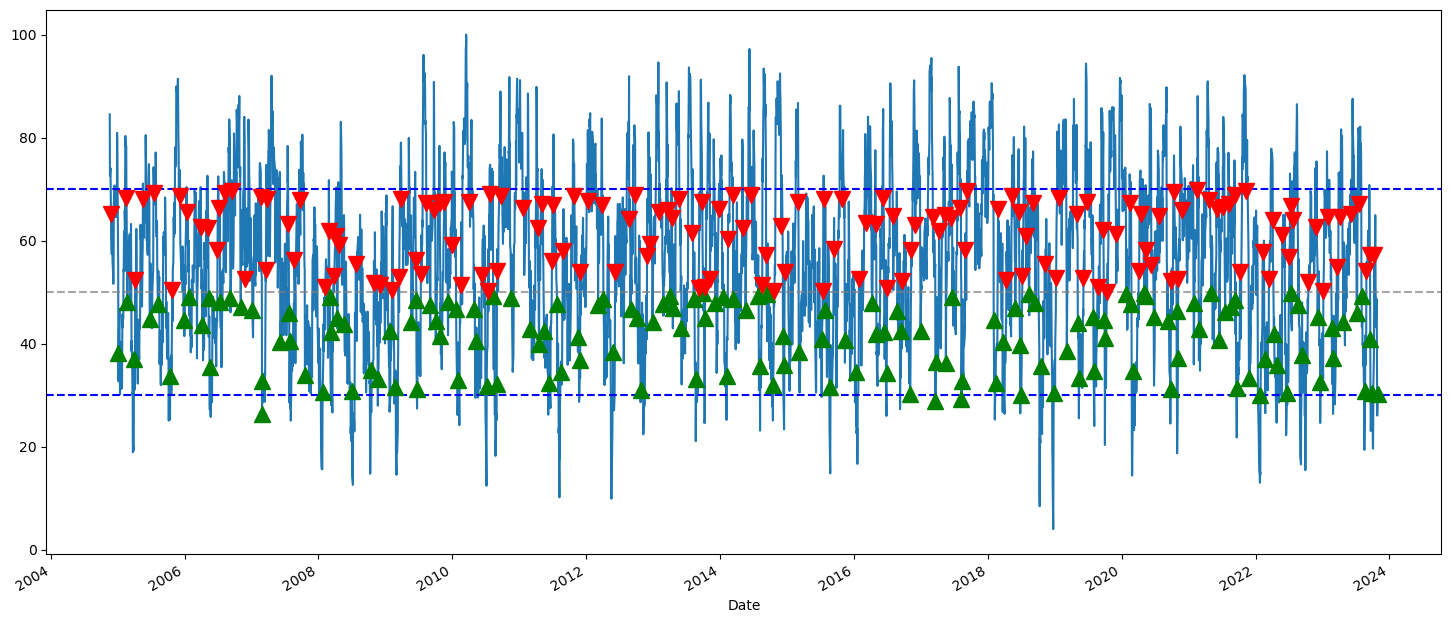

In [17]:
SPY["RSI"].plot(figsize = [18,8])
plt.axhline(y=70, color = "blue", ls = "--")
plt.axhline(y=30, color = "blue", ls = "--")
plt.axhline(y=50, color = "grey", ls = "--", alpha = 0.7)


plt.plot(SPY.loc[SPY.trading_signal == 1.0].index,
          SPY.RSI[SPY.trading_signal == 1.0],
          "^",
          color = "green",
          markersize = 12)

plt.plot(SPY.loc[SPY.trading_signal == -1.0].index,
          SPY.RSI[SPY.trading_signal == -1.0],
          "v",
          color = "red",
          markersize = 12)

In [18]:
initial_capital = 1e5
SPY['SPY_Returns'] = np.log(SPY['Adj Close'] / SPY['Adj Close'].shift(1))
SPY['capital'] = initial_capital

SPY['Strategy_Returns'] = (SPY['position'].shift(1) * SPY['SPY_Returns'])
SPY = SPY.dropna()
SPY["Cumulative_Returns"] = SPY["Strategy_Returns"].cumsum().apply(np.exp)
SPY["Max_Gross_Performance"] = SPY["Cumulative_Returns"].cummax()
SPY

,Open,High,Low,Close,Adj Close,Volume,diff,gain,loss,gain_av,loss_av,RS,RSI,position,trading_signal,SPY_Returns,capital,Strategy_Returns,Cumulative_Returns,Max_Gross_Performance
Date,,,,,,,,,,,,,,,,,,,,
2004-11-18,118.529999,118.800003,118.230003,118.739998,82.483963,31854300,0.111122,0.111122,0.000000,0.338111,0.061966,5.456406,84.511507,0.0,0.0,0.001348,100000.0,0.000000,1.000000,1.0000
2004-11-19,118.699997,118.720001,117.139999,117.419998,81.567032,54276500,-0.916931,0.000000,0.916931,0.338111,0.127461,2.652664,72.622725,0.0,0.0,-0.011179,100000.0,-0.000000,1.000000,1.0000
2004-11-22,117.169998,118.120003,117.029999,117.980003,81.956062,37560200,0.389030,0.389030,0.000000,0.363919,0.127461,2.855143,74.060622,0.0,0.0,0.004758,100000.0,0.000000,1.000000,1.0000
2004-11-23,117.930000,118.260002,117.370003,118.160004,82.081093,41968800,0.125031,0.125031,0.000000,0.302105,0.127461,2.370175,70.327951,0.0,0.0,0.001524,100000.0,0.000000,1.000000,1.0000
2004-11-24,118.269997,118.589996,118.050003,118.440002,82.275566,29724800,0.194473,0.194473,0.000000,0.238328,0.127461,1.869807,65.154456,-1.0,-1.0,0.002366,100000.0,0.000000,1.000000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200,-6.080017,0.000000,6.080017,1.395002,1.891432,0.737538,42.447292,0.0,0.0,-0.014456,100000.0,-0.000000,1.037564,1.3377
2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800,-5.000000,0.000000,5.000000,1.035001,2.248574,0.460292,31.520559,0.0,0.0,-0.012047,100000.0,-0.000000,1.037564,1.3377
2023-10-27,414.190002,414.600006,409.209991,410.679993,410.679993,107367700,-1.869995,0.000000,1.869995,0.838573,2.382145,0.352024,26.036828,0.0,0.0,-0.004543,100000.0,-0.000000,1.037564,1.3377


### <a id = "p1.3">1.3 </a> <font color = "green"> Supervised Machine Learning </font>  [back to table of contents](#top)

In [19]:
# DJIA
# NASDAQ100
# VIX
# US Dollar Index
# US 10-Year Treasury Yield
# https://fred.stlouisfed.org/series/DGS10
# Crude Oil Price

yf_tickers = ["SPY","^DJI", "^NDX", "^VIX", "^NYICDX", "CL=F"] # 'BZ=F' # dropped Brent Oil due to incomplete data

fred_tickers = ["DEXJPUS", "DEXUSUK", "DGS10"]


yf_data = pdr.get_data_yahoo(yf_tickers, start, end)

fred_data = pdr.get_data_fred(fred_tickers, start, end)

[*********************100%%**********************]  6 of 6 completed


In [20]:
yf_data

Adj Close                                                      \
                 CL=F         SPY          ^DJI          ^NDX     ^NYICDX   
Date                                                                        
2004-11-01  50.130001   78.617935  10054.389648   1488.790039   85.199997   
2004-11-02  49.619999   78.645615  10035.730469   1494.829956   85.470001   
2004-11-03  50.880001   79.636078  10137.049805   1503.890015   84.699997   
2004-11-04  48.820000   80.723465  10314.759766   1516.199951   84.540001   
2004-11-05  49.610001   81.229050  10387.540039   1525.239990   84.010002   
...               ...         ...           ...           ...         ...   
2023-10-25  85.389999  417.549988  33035.929688  14381.639648  106.529999   
2023-10-26  83.209999  412.549988  32784.300781  14109.570312  106.599998   
2023-10-27  85.540001  410.679993  32417.589844  14180.419922  106.559998   
2023-10-30  82.309998  415.589996  32928.960938  14335.509766  106.120003   
2023-10-31  81.019997  418.200012  33052.871094  14409.780273  106.660004   

                           Close                                          ...  \
                 ^VIX       CL=F         SPY          ^DJI          ^NDX  ...   
Date                                                                      ...   
2004-11-01  16.270000  50.130001  113.510002  10054.389648   1488.790039  ...   
2004-11-02  16.180000  49.619999  113.550003  10035.730469   1494.829956  ...   
2004-11-03  14.040000  50.880001  114.980003  10137.049805   1503.890015  ...   
2004-11-04  13.970000  48.820000  116.550003  10314.759766   1516.199951  ...   
2004-11-05  13.840000  49.610001  117.279999  10387.540039   1525.239990  ...   
...               ...        ...         ...           ...           ...  ...   
2023-10-25  20.190001  85.389999  417.549988  33035.929688  14381.639648  ...   
2023-10-26  20.680000  83.209999  412.549988  32784.300781  14109.570312  ...   
2023-10-27  21.270000  85.540001  410.679993  32417.589844  14180.419922  ...   
2023-10-30  19.750000  82.309998  415.589996  32928.960938  14335.509766  ...   
2023-10-31  18.139999  81.019997  418.200012  33052.871094  14409.780273  ...   

                    Open                                         Volume  \
                    ^DJI          ^NDX     ^NYICDX       ^VIX      CL=F   
Date                                                                      
2004-11-01  10028.730469   1486.250000   84.699997  16.430000  133138.0   
2004-11-02  10053.870117   1490.319946   85.220001  15.990000   82754.0   
2004-11-03  10037.500000   1519.969971   85.330002  15.050000  143701.0   
2004-11-04  10132.480469   1498.060059   84.660004  13.830000  121094.0   
2004-11-05  10317.049805   1526.709961   84.480003  13.670000  115766.0   
...                  ...           ...         ...        ...       ...   
2023-10-25  33203.531250  14642.080078  106.250000  19.389999  429459.0   
2023-10-26  33017.171875  14314.009766  106.580002  21.780001  341792.0   
2023-10-27  32782.398438  14245.750000  106.589996  20.389999  333760.0   
2023-10-30  32537.539062  14283.980469  106.580002  21.129999  356928.0   
2023-10-31  33029.109375  14340.860352  106.160004  19.860001  346007.0   

                                                                 
                    SPY         ^DJI          ^NDX ^NYICDX ^VIX  
Date                                                             
2004-11-01   36720900.0  267040000.0  1.522820e+09     0.0  0.0  
2004-11-02   56210000.0  369480000.0  1.845080e+09     0.0  0.0  
2004-11-03   76960200.0  332790000.0  1.957400e+09     0.0  0.0  
2004-11-04   55350300.0  365770000.0  1.823490e+09     0.0  0.0  
2004-11-05   63287200.0  325770000.0  1.908970e+09     0.0  0.0  
...                 ...          ...           ...     ...  ...  
2023-10-25   94223200.0  355690000.0  4.599850e+09     0.0  0.0  
2023-10-26  115156800.0  379880000.0  4.894900e+09     0.0  0.0  
2023-10-27  107367700

In [21]:
combined_data = yf_data.loc[:,'Adj Close']
sorted_column = combined_data.columns.tolist()
sorted_column.remove('SPY')
sorted_column.insert(0, 'SPY')
combined_data = combined_data[sorted_column]
combined_data

,SPY,CL=F,^DJI,^NDX,^NYICDX,^VIX
Date,,,,,,
2004-11-01,78.617935,50.130001,10054.389648,1488.790039,85.199997,16.270000
2004-11-02,78.645615,49.619999,10035.730469,1494.829956,85.470001,16.180000
2004-11-03,79.636078,50.880001,10137.049805,1503.890015,84.699997,14.040000
2004-11-04,80.723465,48.820000,10314.759766,1516.199951,84.540001,13.970000
2004-11-05,81.229050,49.610001,10387.540039,1525.239990,84.010002,13.840000
...,...,...,...,...,...,...
2023-10-25,417.549988,85.389999,33035.929688,14381.639648,106.529999,20.190001
2023-10-26,412.549988,83.209999,32784.300781,14109.570312,106.599998,20.680000
2023-10-27,410.679993,85.540001,32417.589844,14180.419922,106.559998,21.270000


In [22]:
fred_data

,DEXJPUS,DEXUSUK,DGS10
DATE,,,
2004-11-01,106.41,1.8323,4.11
2004-11-02,106.29,1.8385,4.10
2004-11-03,106.20,1.8445,4.09
2004-11-04,106.02,1.8440,4.10
2004-11-05,105.60,1.8542,4.21
...,...,...,...
2023-10-26,150.44,1.2113,4.86
2023-10-27,149.60,1.2151,4.84
2023-10-30,149.01,1.2157,4.88


In [23]:
combined_data = combined_data.merge(fred_data, how = 'inner', left_on = 'Date', right_on = 'DATE')
combined_data

,SPY,CL=F,^DJI,^NDX,^NYICDX,^VIX,DEXJPUS,DEXUSUK,DGS10
0,78.617935,50.130001,10054.389648,1488.790039,85.199997,16.270000,106.41,1.8323,4.11
1,78.645615,49.619999,10035.730469,1494.829956,85.470001,16.180000,106.29,1.8385,4.10
2,79.636078,50.880001,10137.049805,1503.890015,84.699997,14.040000,106.20,1.8445,4.09
3,80.723465,48.820000,10314.759766,1516.199951,84.540001,13.970000,106.02,1.8440,4.10
4,81.229050,49.610001,10387.540039,1525.239990,84.010002,13.840000,105.60,1.8542,4.21
...,...,...,...,...,...,...,...,...,...
4780,417.549988,85.389999,33035.929688,14381.639648,106.529999,20.190001,149.94,1.2140,4.95
4781,412.549988,83.209999,32784.300781,14109.570312,106.599998,20.680000,150.44,1.2113,4.86
4782,410.679993,85.540001,32417.589844,14180.419922,106.559998,21.270000,149.60,1.2151,4.84
4783,415.589996,82.309998,32928.960938,14335.509766,106.120003,19.750000,149.01,1.2157,4.88


In [24]:
combined_data = combined_data.set_index(yf_data.index)
combined_data

,SPY,CL=F,^DJI,^NDX,^NYICDX,^VIX,DEXJPUS,DEXUSUK,DGS10
Date,,,,,,,,,
2004-11-01,78.617935,50.130001,10054.389648,1488.790039,85.199997,16.270000,106.41,1.8323,4.11
2004-11-02,78.645615,49.619999,10035.730469,1494.829956,85.470001,16.180000,106.29,1.8385,4.10
2004-11-03,79.636078,50.880001,10137.049805,1503.890015,84.699997,14.040000,106.20,1.8445,4.09
2004-11-04,80.723465,48.820000,10314.759766,1516.199951,84.540001,13.970000,106.02,1.8440,4.10
2004-11-05,81.229050,49.610001,10387.540039,1525.239990,84.010002,13.840000,105.60,1.8542,4.21
...,...,...,...,...,...,...,...,...,...
2023-10-25,417.549988,85.389999,33035.929688,14381.639648,106.529999,20.190001,149.94,1.2140,4.95
2023-10-26,412.549988,83.209999,32784.300781,14109.570312,106.599998,20.680000,150.44,1.2113,4.86
2023-10-27,410.679993,85.540001,32417.589844,14180.419922,106.559998,21.270000,149.60,1.2151,4.84


In [25]:
return_period = 5

Y = (np.log(combined_data.loc[ : , "SPY"]).diff(return_period).shift(-return_period))
Y

Date
2004-11-01    0.031223
2004-11-02    0.028905
2004-11-03    0.017159
2004-11-04    0.011177
2004-11-05    0.012793
                ...   
2023-10-25         NaN
2023-10-26         NaN
2023-10-27         NaN
2023-10-30         NaN
2023-10-31         NaN
Name: SPY, Length: 4785, dtype: float64

In [26]:
Y.name = Y.name + "_pred"
Y

Date
2004-11-01    0.031223
2004-11-02    0.028905
2004-11-03    0.017159
2004-11-04    0.011177
2004-11-05    0.012793
                ...   
2023-10-25         NaN
2023-10-26         NaN
2023-10-27         NaN
2023-10-30         NaN
2023-10-31         NaN
Name: SPY_pred, Length: 4785, dtype: float64

In [27]:
combined_data.head()

,SPY,CL=F,^DJI,^NDX,^NYICDX,^VIX,DEXJPUS,DEXUSUK,DGS10
Date,,,,,,,,,
2004-11-01,78.617935,50.130001,10054.389648,1488.790039,85.199997,16.27,106.41,1.8323,4.11
2004-11-02,78.645615,49.619999,10035.730469,1494.829956,85.470001,16.18,106.29,1.8385,4.10
2004-11-03,79.636078,50.880001,10137.049805,1503.890015,84.699997,14.04,106.20,1.8445,4.09
2004-11-04,80.723465,48.820000,10314.759766,1516.199951,84.540001,13.97,106.02,1.8440,4.10
2004-11-05,81.229050,49.610001,10387.540039,1525.239990,84.010002,13.84,105.60,1.8542,4.21


In [28]:
# Create endogenous_df
endogenous_df = combined_data.loc[:,'SPY'].to_frame()
endogenous_df

,SPY
Date,
2004-11-01,78.617935
2004-11-02,78.645615
2004-11-03,79.636078
2004-11-04,80.723465
2004-11-05,81.229050
...,...
2023-10-25,417.549988
2023-10-26,412.549988
2023-10-27,410.679993


In [29]:
# Create exogenous_df
exogenous_df = combined_data.iloc[:,1:]
exogenous_df

,CL=F,^DJI,^NDX,^NYICDX,^VIX,DEXJPUS,DEXUSUK,DGS10
Date,,,,,,,,
2004-11-01,50.130001,10054.389648,1488.790039,85.199997,16.270000,106.41,1.8323,4.11
2004-11-02,49.619999,10035.730469,1494.829956,85.470001,16.180000,106.29,1.8385,4.10
2004-11-03,50.880001,10137.049805,1503.890015,84.699997,14.040000,106.20,1.8445,4.09
2004-11-04,48.820000,10314.759766,1516.199951,84.540001,13.970000,106.02,1.8440,4.10
2004-11-05,49.610001,10387.540039,1525.239990,84.010002,13.840000,105.60,1.8542,4.21
...,...,...,...,...,...,...,...,...
2023-10-25,85.389999,33035.929688,14381.639648,106.529999,20.190001,149.94,1.2140,4.95
2023-10-26,83.209999,32784.300781,14109.570312,106.599998,20.680000,150.44,1.2113,4.86
2023-10-27,85.540001,32417.589844,14180.419922,106.559998,21.270000,149.60,1.2151,4.84


# Exploratory Data Analysis

### Correlation Matrices

In [30]:
combined_data_dpc =\
(
    combined_data[['SPY', 'CL=F', '^DJI', '^NDX', '^NYICDX', '^VIX', 'DEXJPUS', 'DEXUSUK', 'DGS10']]
    .pct_change()
    .fillna(0)
)

combined_data_dpc

,SPY,CL=F,^DJI,^NDX,^NYICDX,^VIX,DEXJPUS,DEXUSUK,DGS10
Date,,,,,,,,,
2004-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2004-11-02,0.000352,-0.010174,-0.001856,0.004057,0.003169,-0.005532,-0.001128,0.003384,-0.002433
2004-11-03,0.012594,0.025393,0.010096,0.006061,-0.009009,-0.132262,-0.000847,0.003264,-0.002439
2004-11-04,0.013654,-0.040487,0.017531,0.008185,-0.001889,-0.004986,-0.001695,-0.000271,0.002445
2004-11-05,0.006263,0.016182,0.007056,0.005962,-0.006269,-0.009306,-0.003962,0.005531,0.026829
...,...,...,...,...,...,...,...,...,...
2023-10-25,-0.014352,0.019704,-0.003182,-0.024700,0.002447,0.064312,0.000667,-0.002465,0.024845
2023-10-26,-0.011975,-0.025530,-0.007617,-0.018918,0.000657,0.024269,0.003335,-0.002224,-0.018182
2023-10-27,-0.004533,0.028001,-0.011186,0.005021,-0.000375,0.028530,-0.005584,0.003137,-0.004115


In [31]:
combined_data_cumulative_daily_returns =\
(
    (1 + combined_data_dpc)
     .cumprod()
)

combined_data_cumulative_daily_returns

,SPY,CL=F,^DJI,^NDX,^NYICDX,^VIX,DEXJPUS,DEXUSUK,DGS10
Date,,,,,,,,,
2004-11-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2004-11-02,1.000352,0.989826,0.998144,1.004057,1.003169,0.994468,0.998872,1.003384,0.997567
2004-11-03,1.012951,1.014961,1.008221,1.010142,0.994131,0.862938,0.998027,1.006658,0.995134
2004-11-04,1.026782,0.973868,1.025896,1.018411,0.992254,0.858636,0.996335,1.006385,0.997567
2004-11-05,1.033213,0.989627,1.033135,1.024483,0.986033,0.850645,0.992388,1.011952,1.024331
...,...,...,...,...,...,...,...,...,...
2023-10-25,5.311129,1.703371,3.285722,9.659952,1.250352,1.240934,1.409078,0.662555,1.204380
2023-10-26,5.247530,1.659884,3.260695,9.477206,1.251174,1.271051,1.413777,0.661082,1.182482
2023-10-27,5.223744,1.706363,3.224223,9.524795,1.250704,1.307314,1.405883,0.663156,1.177616


In [32]:
combined_data_corr_dpc =\
    (combined_data_cumulative_daily_returns
     .corr()
    )

combined_data_corr_dpc

,SPY,CL=F,^DJI,^NDX,^NYICDX,^VIX,DEXJPUS,DEXUSUK,DGS10
SPY,1.000000,-0.105889,0.992934,0.992099,0.753480,-0.041330,0.579173,-0.725107,-0.386347
CL=F,-0.105889,1.000000,-0.117165,-0.103510,-0.491645,-0.042964,-0.236435,0.302579,0.226212
^DJI,0.992934,-0.117165,1.000000,0.975598,0.753600,-0.084320,0.570489,-0.730035,-0.398031
^NDX,0.992099,-0.103510,0.975598,1.000000,0.711096,0.011808,0.531138,-0.707177,-0.400757
^NYICDX,0.753480,-0.491645,0.753600,0.711096,1.000000,-0.065425,0.727196,-0.769539,-0.254914
^VIX,-0.041330,-0.042964,-0.084320,0.011808,-0.065425,1.000000,-0.189788,-0.111386,-0.138773
DEXJPUS,0.579173,-0.236435,0.570489,0.531138,0.727196,-0.189788,1.000000,-0.230741,0.283934
DEXUSUK,-0.725107,0.302579,-0.730035,-0.707177,-0.769539,-0.111386,-0.230741,1.000000,0.613591
DGS10,-0.386347,0.226212,-0.398031,-0.400757,-0.254914,-0.138773,0.283934,0.613591,1.000000


In [33]:
combined_data_corr_dpc.loc["SPY"]

SPY        1.000000
CL=F      -0.105889
^DJI       0.992934
^NDX       0.992099
^NYICDX    0.753480
^VIX      -0.041330
DEXJPUS    0.579173
DEXUSUK   -0.725107
DGS10     -0.386347
Name: SPY, dtype: float64

### Mutual Info Regression Analysis

In [34]:
from sklearn.feature_selection import mutual_info_regression

In [35]:
# Feature Selection - Mutual Info Regression
MI = pd.Series(mutual_info_regression(combined_data.dropna().iloc[:,1:], combined_data.dropna().loc[:,'SPY']), index = combined_data.columns[1:]).sort_values(ascending = False)

MI

^DJI       3.431233
^NDX       3.240991
DEXUSUK    1.713988
DEXJPUS    1.637125
^NYICDX    1.579760
DGS10      1.433084
CL=F       1.262364
^VIX       0.825311
dtype: float64

### Ordinary Least Squares Regression

In [36]:
combined_data_ols = combined_data.dropna().pct_change().fillna(0)
combined_data_ols

,SPY,CL=F,^DJI,^NDX,^NYICDX,^VIX,DEXJPUS,DEXUSUK,DGS10
Date,,,,,,,,,
2004-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2004-11-02,0.000352,-0.010174,-0.001856,0.004057,0.003169,-0.005532,-0.001128,0.003384,-0.002433
2004-11-03,0.012594,0.025393,0.010096,0.006061,-0.009009,-0.132262,-0.000847,0.003264,-0.002439
2004-11-04,0.013654,-0.040487,0.017531,0.008185,-0.001889,-0.004986,-0.001695,-0.000271,0.002445
2004-11-05,0.006263,0.016182,0.007056,0.005962,-0.006269,-0.009306,-0.003962,0.005531,0.026829
...,...,...,...,...,...,...,...,...,...
2023-10-25,-0.014352,0.019704,-0.003182,-0.024700,0.002447,0.064312,0.000667,-0.002465,0.024845
2023-10-26,-0.011975,-0.025530,-0.007617,-0.018918,0.000657,0.024269,0.003335,-0.002224,-0.018182
2023-10-27,-0.004533,0.028001,-0.011186,0.005021,-0.000375,0.028530,-0.005584,0.003137,-0.004115


In [37]:
ols_model = sm.OLS(combined_data_ols[['SPY']], sm.add_constant(combined_data_ols[['CL=F', '^DJI', '^NDX', '^NYICDX', '^VIX', 'DEXJPUS', 'DEXUSUK', 'DGS10']])).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.636e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:00:25   Log-Likelihood:                 22088.
No. Observations:                4731   AIC:                        -4.416e+04
Df Residuals:                    4722   BIC:                        -4.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.105e-05   3.32e-05      2.139      0.032    5.93e-06       0.000
CL=F           0.0011      0.001      1.861      0.063   -6.11e-05       0.002
^DJI           0.6866      0.006    112.242      0.000       0.675       0.699
^NDX           0.2736      0.005     56.109      0.000       0.264       0.283
^NYICDX       -0.1003      0.010    -10.541      0.000      -0.119      -0.082
^VIX          -0.0060      0.001     -9.944      0.000      -0.007      -0.005
DEXJPUS        0.0574      0.006      9.322      0.000       0.045       0.069
DEXUSUK        0.0157      0.007      2.239      0.025       0.002       0.029
DGS10         -0.0034      0.001     -2.389      0.017      -0.006      -0.001
==============================================================================
Omnibus:                     1294.288   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48005.253
Skew:                           0.607   Prob(JB):                         0.00
Kurtosis:                      18.558   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Supervised Machine Learning Optimisation - Determining the Optimal Combination of Variables

While methods such as OLS regression, mutual info regression and other feature selection methods have given us some indication of which exogenous variables could potentially prove useful in forecasting SPY prices/returns, we have elected to `allow the data to speak for itself`. Hence, we set up the following code to determine the `optimal combination of variables`, while concurrently determining the `optimal supervised ML algorithm` that yields the best results in terms of `lowest Mean Squared Error (MSE)` during backtesting as well as the `highest cumulative returns` when deployed in a trading strategy.

Since we employ a `5-trading day lag` across the board to all our variables, we have essentially elected to generate our forecasts of `SPY returns` in `weekly time intervals`. Consequently, the supervised ML algorithm will also generate forecasts of SPY returns in weekly time steps. Having obtained this series of weekly forecasted SPY returns, we are able to calculate cumulative returns at weekly time intervals. When combined with the `knowledge of the last adjusted SPY close price` at the end of the training period, we are also able to `back into the implied SPY prices at weekly intervals`.

However, we are cognisant that these weekly signals are generated `only at market close of the trading day` which implies that the soonest that one would be able to act on the generated trading signal is `the next trading day`. Taking these `practical considerations` into account, we have elected to merge the series of weekly forecasts into the original daily time series where we are then able to initiate buy/sell positions by comparing `actual SPY prices for the day against the predicted SPY prices for the next week`. We achieve this by using .ffill() to fill the NaN values that originally existed in the daily time series between weekly price predictions.
> If the following week's predicted SPY price is higher than the actual SPY price for the day, we will generate a Buy Signal

### Using Itertools to generate all possible combinations of exogenous variables

* To this end, we first use itertools to generate combinations of index numbers (with each index number corresponding to the column index number for each variable in the exogenous_df)

> For example, an index number combination of [0,1,2] would refer to the 1st, 2nd and 3rd columns of the exogenous_df (ie. Crude Oil (WTI), Dow Jones Industrial Average (DJIA) and NASDAQ 100
* This allows us to experiment with every possible combination of variables within our scope of study.

In [ ]:
import itertools

In [ ]:
exogenous_df.columns

Index(['CL=F', '^DJI', '^NDX', '^NYICDX', '^VIX', 'DEXJPUS', 'DEXUSUK',
       'DGS10'],
      dtype='object')

In [ ]:
# Generating every possible combination of variables
exog_possible_combinations = exogenous_variables
indexes = [i for i in range(0, len(exog_possible_combinations))]
print(indexes)
all_combinations = []
# Generate all possible groups
for r in range(1, len(indexes) + 1):
    groups = list(itertools.combinations(indexes, r))
    all_combinations.extend([list(group) for group in groups])

all_combinations

[0, 1, 2, 3, 4, 5, 6, 7]


[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [4, 5],
 [4, 6],
 [4, 7],
 [5, 6],
 [5, 7],
 [6, 7],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 4],
 [0, 1, 5],
 [0, 1, 6],
 [0, 1, 7],
 [0, 2, 3],
 [0, 2, 4],
 [0, 2, 5],
 [0, 2, 6],
 [0, 2, 7],
 [0, 3, 4],
 [0, 3, 5],
 [0, 3, 6],
 [0, 3, 7],
 [0, 4, 5],
 [0, 4, 6],
 [0, 4, 7],
 [0, 5, 6],
 [0, 5, 7],
 [0, 6, 7],
 [1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 2, 6],
 [1, 2, 7],
 [1, 3, 4],
 [1, 3, 5],
 [1, 3, 6],
 [1, 3, 7],
 [1, 4, 5],
 [1, 4, 6],
 [1, 4, 7],
 [1, 5, 6],
 [1, 5, 7],
 [1, 6, 7],
 [2, 3, 4],
 [2, 3, 5],
 [2, 3, 6],
 [2, 3, 7],
 [2, 4, 5],
 [2, 4, 6],
 [2, 4, 7],
 [2, 5, 6],
 [2, 5, 7],
 [2, 6, 7],
 [3, 4, 5],
 [3, 4, 6],
 [3, 4, 7],
 [3, 5, 6],
 [3, 5, 7],
 [3, 6, 7],
 [4, 5, 6],
 [4, 5, 7],
 [4, 6, 7],
 [5, 6, 7],
 [0, 1, 2, 3],
 [0, 1, 2, 4]

In [ ]:
len(all_combinations)

255

#### Supervised ML: Determining optimal combination of variables and optimal supervised ML algorithm


> WARNING: We do not recommend refreshing the cell below given the significant amount of time/computational resources required.

In [ ]:
# Assumption Inputs
return_period = 5
validation_size = 0.2

# Common Set Up for ML outside the loop
# Define settings for 10-fold Cross Validation
num_folds = 10
seed = 100
scoring = "neg_mean_squared_error"

models = []

models.append(('LR', LinearRegression() ))
models.append(('LASSO', Lasso() ))
models.append(('EN', ElasticNet() ))
models.append(('CART', DecisionTreeRegressor() ))
models.append(('KNN', KNeighborsRegressor() ))
models.append(('SVR', SVR() ))
# Bagging
models.append(('RFR', RandomForestRegressor() ))
models.append(('ETR', ExtraTreesRegressor() ))
# Boosting
models.append(('GBR', GradientBoostingRegressor() ))
models.append(('ABR', AdaBoostRegressor() ))

# Initialise lists for storage of results
final_result_combination_tracker = []
final_result_model_tracker = []
final_result_cv_results_mean = []
final_result_cv_results_std = []
final_result_train_results = []
final_result_test_results = []
final_result_cum_returns_tracker = []

for combination in tqdm(all_combinations):

    final_df = exogenous_df.iloc[:,combination]
    final_df = final_df.apply(lambda x: np.log(x).diff(return_period))
    final_df = pd.concat([Y, final_df], axis = 1).dropna().iloc[ : :return_period, :]
    final_df_Y = final_df.iloc[ : , 0]
    final_df_X = final_df.iloc[ : , 1:]

    train_size = int(len(final_df_X) * (1 - validation_size))
    final_df_X_train , final_df_X_test = final_df_X[0:train_size], final_df_X[train_size:len(final_df_X)]
    final_df_Y_train , final_df_Y_test = final_df_Y[0:train_size], final_df_Y[train_size:len(final_df_X)]

    for name, model in models:
        # Temporary Data Storage within each loop
        k_fold_results = []
        cv_results_mean = []
        cv_results_std = []
        train_results = []
        test_results = []

        kfold = KFold(n_splits = num_folds, random_state = seed, shuffle = True)

        cv_results = -1 * cross_val_score(model, final_df_X_train, final_df_Y_train, cv = kfold, scoring = scoring)

        k_fold_results.append(cv_results)

        res = model.fit(final_df_X_train, final_df_Y_train)

        train_result = mean_squared_error(res.predict(final_df_X_train), final_df_Y_train)
        train_results.append(train_result)

        test_result = mean_squared_error(res.predict(final_df_X_test), final_df_Y_test)
        test_results.append(test_result)

        print(combination, model)
        # Append cv_results.mean()
        cv_results_mean.append(cv_results.mean())
        # Append cv_results.std()
        cv_results_std.append(cv_results.std())

        message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)

        print(message)

        # Append ML algo results
        final_result_cv_results_mean.append(cv_results.mean())
        final_result_cv_results_std.append(cv_results.std())
        final_result_train_results.append(train_result)
        final_result_test_results.append(test_result)

        # Fitting the model
        final_df_model = model.fit(final_df_X_train, final_df_Y_train)
        final_df_model_predicted = final_df_model.predict(final_df_X_test)
        final_df_model_predicted_cum_returns = pd.Series(final_df_model_predicted, final_df_X_test.index).cumsum().apply(np.exp)
        Y_test_cumulative_returns = pd.Series(final_df_Y_test).cumsum().apply(np.exp)

        last_train_price = endogenous_df.loc[endogenous_df.index == dt.datetime(2020,1,3)]['SPY']

        # Generate Predicted Weekly Prices
        final_df_model_predicted_weekly_prices = final_df_model_predicted_cum_returns.apply(lambda x: x * last_train_price)

        # Set up Strategy DF, beginning with (Filtered) Daily SPY Data
        final_df_model_strategy_df = endogenous_df.loc[(endogenous_df.index >= dt.datetime(2020,1,3)) & (endogenous_df.index <= dt.datetime(2023,10,19))]

        # Merge DF with Predicted Weekly Prices
        final_df_model_strategy_df = final_df_model_strategy_df.merge(final_df_model_predicted_weekly_prices, how = 'outer', left_on = final_df_model_strategy_df.index, right_on = final_df_model_predicted_weekly_prices.index)

        # Rename columns
        final_df_model_strategy_df.columns = ['Date','SPY','Weekly Predicted']
        # Shift down SPY by 5-periods
        final_df_model_strategy_df['SPY'] = final_df_model_strategy_df['SPY'].shift(return_period)
        # .ffill for Weekly Predicted
        final_df_model_strategy_df['Weekly Predicted'] = final_df_model_strategy_df['Weekly Predicted'].ffill()
        # Generate Signals column
        final_df_model_strategy_df['Signal'] = np.where(final_df_model_strategy_df['Weekly Predicted'] > final_df_model_strategy_df['SPY'], 1, 0)

        # Create Positions column
        final_df_model_strategy_df['Positions'] = final_df_model_strategy_df['Signal'].diff()
        # Create Daily Log Returns column
        final_df_model_strategy_df['Returns'] = np.log(final_df_model_strategy_df['SPY'] / final_df_model_strategy_df['SPY'].shift(1))
        # Create Strategy Returns column
        final_df_model_strategy_df['Strategy Returns'] = final_df_model_strategy_df['Positions'].shift(1) * final_df_model_strategy_df['Returns']
        # Create Cumulative Returns column
        final_df_model_strategy_df['Cumulative Returns'] = final_df_model_strategy_df['Strategy Returns'].cumsum().apply(np.exp)

        # Print combination and model
        print(combination,model)
        # Print last value of Cumulative Returns
        print(final_df_model_strategy_df.iloc[-1]['Cumulative Returns'])
        # Append to list
        final_result_combination_tracker.append(combination)
        final_result_model_tracker.append(name)
        final_result_cum_returns_tracker.append(final_df_model_strategy_df.iloc[-1]['Cumulative Returns'])

final_result_dict = dict(Combination = final_result_combination_tracker, Model = final_result_model_tracker, CV_Mean = final_result_cv_results_mean,
                         CV_STD = final_result_cv_results_std, Train_Results = final_result_train_results, Test_Results = final_result_test_results, Cumulative_Returns = final_result_cum_returns_tracker)
final_result_df = pd.DataFrame(final_result_dict)
final_result_df

  0%|          | 0/255 [00:00<?, ?it/s]

[0] LinearRegression()
LR: 0.000639 (0.000261) 0.000633 0.000902
[0] LinearRegression()
0.9876610567239985
[0] Lasso()
LASSO: 0.000636 (0.000259) 0.000634 0.000905
[0] Lasso()
0.960598372380246
[0] ElasticNet()
EN: 0.000636 (0.000259) 0.000634 0.000905
[0] ElasticNet()
0.960598372380246
[0] DecisionTreeRegressor()
CART: 0.001389 (0.001149) 0.000000 0.001804
[0] DecisionTreeRegressor()
0.9753591599324857
[0] KNeighborsRegressor()
KNN: 0.000778 (0.000351) 0.000502 0.000992
[0] KNeighborsRegressor()
1.0266812520743462
[0] SVR()
SVR: 0.001607 (0.000964) 0.001185 0.001476
[0] SVR()
1.3745282660426608
[0] RandomForestRegressor()
RFR: 0.000973 (0.000665) 0.000116 0.001283
[0] RandomForestRegressor()
0.9602228897025078
[0] ExtraTreesRegressor()
ETR: 0.001113 (0.000834) 0.000000 0.001454
[0] ExtraTreesRegressor()
0.929532685757087
[0] GradientBoostingRegressor()
GBR: 0.000915 (0.000905) 0.000362 0.001241
[0] GradientBoostingRegressor()
0.9308310977215449
[0] AdaBoostRegressor()
ABR: 0.000927 (0

[7] ExtraTreesRegressor()
ETR: 0.000871 (0.000186) 0.000053 0.001321
[7] ExtraTreesRegressor()
1.0017992059442944
[7] GradientBoostingRegressor()
GBR: 0.000569 (0.000154) 0.000349 0.001088
[7] GradientBoostingRegressor()
0.9696977971671897
[7] AdaBoostRegressor()
ABR: 0.000565 (0.000173) 0.000494 0.000987
[7] AdaBoostRegressor()
1.0315863309105773
[0, 1] LinearRegression()
LR: 0.000540 (0.000175) 0.000530 0.000980
[0, 1] LinearRegression()
0.9399950420038042
[0, 1] Lasso()
LASSO: 0.000535 (0.000168) 0.000534 0.000959
[0, 1] Lasso()
0.9868230655092496
[0, 1] ElasticNet()
EN: 0.000535 (0.000168) 0.000534 0.000959
[0, 1] ElasticNet()
0.9868230655092496
[0, 1] DecisionTreeRegressor()
CART: 0.001112 (0.000318) 0.000000 0.001995
[0, 1] DecisionTreeRegressor()
0.9941522219975375
[0, 1] KNeighborsRegressor()
KNN: 0.000639 (0.000167) 0.000415 0.001102
[0, 1] KNeighborsRegressor()
0.9703695026140627
[0, 1] SVR()
SVR: 0.001107 (0.000291) 0.001043 0.001559
[0, 1] SVR()
1.4183711679348516
[0, 1] Ra

[0, 7] AdaBoostRegressor()
0.9862515694456478
[1, 2] LinearRegression()
LR: 0.000538 (0.000138) 0.000534 0.000713
[1, 2] LinearRegression()
0.8782122742331272
[1, 2] Lasso()
LASSO: 0.000539 (0.000145) 0.000538 0.000696
[1, 2] Lasso()
0.9645284200781715
[1, 2] ElasticNet()
EN: 0.000539 (0.000145) 0.000538 0.000696
[1, 2] ElasticNet()
0.9645284200781715
[1, 2] DecisionTreeRegressor()
CART: 0.001097 (0.000143) 0.000000 0.001103
[1, 2] DecisionTreeRegressor()
0.9201057399563274
[1, 2] KNeighborsRegressor()
KNN: 0.000640 (0.000221) 0.000426 0.000770
[1, 2] KNeighborsRegressor()
1.0354295924320718
[1, 2] SVR()
SVR: 0.001021 (0.000325) 0.000849 0.001320
[1, 2] SVR()
1.2812464840933797
[1, 2] RandomForestRegressor()
RFR: 0.000644 (0.000159) 0.000093 0.000844
[1, 2] RandomForestRegressor()
1.0718443783985692
[1, 2] ExtraTreesRegressor()
ETR: 0.000705 (0.000172) 0.000000 0.000872
[1, 2] ExtraTreesRegressor()
0.8868844495447281
[1, 2] GradientBoostingRegressor()
GBR: 0.000612 (0.000141) 0.000276 

[2, 4] DecisionTreeRegressor()
CART: 0.000940 (0.000189) 0.000000 0.001264
[2, 4] DecisionTreeRegressor()
0.9420580343646991
[2, 4] KNeighborsRegressor()
KNN: 0.000588 (0.000161) 0.000389 0.000847
[2, 4] KNeighborsRegressor()
0.9302597846250504
[2, 4] SVR()
SVR: 0.001391 (0.000282) 0.001310 0.001505
[2, 4] SVR()
1.0038147982608423
[2, 4] RandomForestRegressor()
RFR: 0.000619 (0.000170) 0.000085 0.000875
[2, 4] RandomForestRegressor()
0.9684587296438348
[2, 4] ExtraTreesRegressor()
ETR: 0.000663 (0.000193) 0.000000 0.001023
[2, 4] ExtraTreesRegressor()
0.9612565830542508
[2, 4] GradientBoostingRegressor()
GBR: 0.000600 (0.000206) 0.000268 0.000820
[2, 4] GradientBoostingRegressor()
0.9825295454243215
[2, 4] AdaBoostRegressor()
ABR: 0.000566 (0.000157) 0.000437 0.000745
[2, 4] AdaBoostRegressor()
1.0773036340516822
[2, 5] LinearRegression()
LR: 0.000522 (0.000227) 0.000517 0.000714
[2, 5] LinearRegression()
0.9977809329108762
[2, 5] Lasso()
LASSO: 0.000524 (0.000218) 0.000524 0.000700
[2

[3, 7] SVR()
0.9633396058324948
[3, 7] RandomForestRegressor()
RFR: 0.000608 (0.000148) 0.000087 0.001130
[3, 7] RandomForestRegressor()
1.036001183615952
[3, 7] ExtraTreesRegressor()
ETR: 0.000636 (0.000171) 0.000000 0.001068
[3, 7] ExtraTreesRegressor()
1.0127369031465394
[3, 7] GradientBoostingRegressor()
GBR: 0.000586 (0.000178) 0.000265 0.001172
[3, 7] GradientBoostingRegressor()
0.8997752079844326
[3, 7] AdaBoostRegressor()
ABR: 0.000546 (0.000172) 0.000402 0.000961
[3, 7] AdaBoostRegressor()
0.9817146988434238
[4, 5] LinearRegression()
LR: 0.000519 (0.000224) 0.000516 0.000716
[4, 5] LinearRegression()
0.9534789788980926
[4, 5] Lasso()
LASSO: 0.000524 (0.000218) 0.000524 0.000700
[4, 5] Lasso()
0.9357070238477829
[4, 5] ElasticNet()
EN: 0.000524 (0.000218) 0.000524 0.000700
[4, 5] ElasticNet()
0.9357070238477829
[4, 5] DecisionTreeRegressor()
CART: 0.001181 (0.000297) 0.000000 0.001128
[4, 5] DecisionTreeRegressor()
0.9914973805601461
[4, 5] KNeighborsRegressor()
KNN: 0.000655 (

[0, 1, 2] GradientBoostingRegressor()
GBR: 0.000630 (0.000202) 0.000252 0.001248
[0, 1, 2] GradientBoostingRegressor()
1.0058861448150045
[0, 1, 2] AdaBoostRegressor()
ABR: 0.000623 (0.000179) 0.000475 0.001078
[0, 1, 2] AdaBoostRegressor()
1.1243984980540613
[0, 1, 3] LinearRegression()
LR: 0.000540 (0.000175) 0.000529 0.000970
[0, 1, 3] LinearRegression()
0.9064371172721898
[0, 1, 3] Lasso()
LASSO: 0.000535 (0.000168) 0.000534 0.000959
[0, 1, 3] Lasso()
0.9868230655092496
[0, 1, 3] ElasticNet()
EN: 0.000535 (0.000168) 0.000534 0.000959
[0, 1, 3] ElasticNet()
0.9868230655092496
[0, 1, 3] DecisionTreeRegressor()
CART: 0.001027 (0.000296) 0.000000 0.002037
[0, 1, 3] DecisionTreeRegressor()
1.021030099279491
[0, 1, 3] KNeighborsRegressor()
KNN: 0.000630 (0.000188) 0.000411 0.001069
[0, 1, 3] KNeighborsRegressor()
0.9527939489971124
[0, 1, 3] SVR()
SVR: 0.001079 (0.000289) 0.001001 0.001520
[0, 1, 3] SVR()
1.3239859557466562
[0, 1, 3] RandomForestRegressor()
RFR: 0.000614 (0.000219) 0.000

[0, 2, 4] ExtraTreesRegressor()
ETR: 0.000627 (0.000178) 0.000000 0.001123
[0, 2, 4] ExtraTreesRegressor()
0.9455824765663817
[0, 2, 4] GradientBoostingRegressor()
GBR: 0.000640 (0.000163) 0.000263 0.001076
[0, 2, 4] GradientBoostingRegressor()
0.99127342832348
[0, 2, 4] AdaBoostRegressor()
ABR: 0.000590 (0.000175) 0.000423 0.001077
[0, 2, 4] AdaBoostRegressor()
1.0360302512528767
[0, 2, 5] LinearRegression()
LR: 0.000524 (0.000173) 0.000520 0.000877
[0, 2, 5] LinearRegression()
0.9984215983647093
[0, 2, 5] Lasso()
LASSO: 0.000527 (0.000162) 0.000526 0.000868
[0, 2, 5] Lasso()
0.9657476803469559
[0, 2, 5] ElasticNet()
EN: 0.000527 (0.000162) 0.000526 0.000868
[0, 2, 5] ElasticNet()
0.9657476803469559
[0, 2, 5] DecisionTreeRegressor()
CART: 0.001016 (0.000270) 0.000000 0.001752
[0, 2, 5] DecisionTreeRegressor()
0.973717107577839
[0, 2, 5] KNeighborsRegressor()
KNN: 0.000595 (0.000138) 0.000407 0.000958
[0, 2, 5] KNeighborsRegressor()
1.0427920104583883
[0, 2, 5] SVR()
SVR: 0.001481 (0.0

[0, 3, 7] RandomForestRegressor()
RFR: 0.000592 (0.000163) 0.000085 0.001348
[0, 3, 7] RandomForestRegressor()
0.9776189763850174
[0, 3, 7] ExtraTreesRegressor()
ETR: 0.000578 (0.000129) 0.000000 0.001298
[0, 3, 7] ExtraTreesRegressor()
0.9919375925025624
[0, 3, 7] GradientBoostingRegressor()
GBR: 0.000607 (0.000202) 0.000254 0.001461
[0, 3, 7] GradientBoostingRegressor()
1.0126137773802657
[0, 3, 7] AdaBoostRegressor()
ABR: 0.000511 (0.000133) 0.000388 0.001256
[0, 3, 7] AdaBoostRegressor()
0.9981632288737986
[0, 4, 5] LinearRegression()
LR: 0.000522 (0.000172) 0.000518 0.000884
[0, 4, 5] LinearRegression()
0.9599964544187091
[0, 4, 5] Lasso()
LASSO: 0.000527 (0.000162) 0.000526 0.000868
[0, 4, 5] Lasso()
0.9657476803469559
[0, 4, 5] ElasticNet()
EN: 0.000527 (0.000162) 0.000526 0.000868
[0, 4, 5] ElasticNet()
0.9657476803469559
[0, 4, 5] DecisionTreeRegressor()
CART: 0.000990 (0.000226) 0.000000 0.001430
[0, 4, 5] DecisionTreeRegressor()
0.9717883367859512
[0, 4, 5] KNeighborsRegress

[1, 2, 3] KNeighborsRegressor()
0.9670667487029944
[1, 2, 3] SVR()
SVR: 0.001014 (0.000262) 0.000862 0.001254
[1, 2, 3] SVR()
1.0882779735299384
[1, 2, 3] RandomForestRegressor()
RFR: 0.000594 (0.000179) 0.000087 0.000845
[1, 2, 3] RandomForestRegressor()
1.0441621889991464
[1, 2, 3] ExtraTreesRegressor()
ETR: 0.000627 (0.000148) 0.000000 0.000880
[1, 2, 3] ExtraTreesRegressor()
0.9335692257660018
[1, 2, 3] GradientBoostingRegressor()
GBR: 0.000583 (0.000175) 0.000270 0.000933
[1, 2, 3] GradientBoostingRegressor()
0.9555192034661115
[1, 2, 3] AdaBoostRegressor()
ABR: 0.000598 (0.000154) 0.000405 0.000784
[1, 2, 3] AdaBoostRegressor()
1.0345845456562557
[1, 2, 4] LinearRegression()
LR: 0.000542 (0.000142) 0.000534 0.000713
[1, 2, 4] LinearRegression()
0.8981155689087141
[1, 2, 4] Lasso()
LASSO: 0.000539 (0.000145) 0.000538 0.000696
[1, 2, 4] Lasso()
0.9645284200781715
[1, 2, 4] ElasticNet()
EN: 0.000539 (0.000145) 0.000538 0.000696
[1, 2, 4] ElasticNet()
0.9645284200781715
[1, 2, 4] Dec

[1, 3, 6] SVR()
1.2137938199350047
[1, 3, 6] RandomForestRegressor()
RFR: 0.000608 (0.000264) 0.000090 0.000752
[1, 3, 6] RandomForestRegressor()
0.9893464531610041
[1, 3, 6] ExtraTreesRegressor()
ETR: 0.000648 (0.000275) 0.000000 0.000751
[1, 3, 6] ExtraTreesRegressor()
0.9877829589083691
[1, 3, 6] GradientBoostingRegressor()
GBR: 0.000626 (0.000249) 0.000252 0.000755
[1, 3, 6] GradientBoostingRegressor()
0.9636319108282767
[1, 3, 6] AdaBoostRegressor()
ABR: 0.000652 (0.000224) 0.000463 0.000783
[1, 3, 6] AdaBoostRegressor()
0.9811752070461527
[1, 3, 7] LinearRegression()
LR: 0.000480 (0.000142) 0.000471 0.000903
[1, 3, 7] LinearRegression()
0.9578785257716251
[1, 3, 7] Lasso()
LASSO: 0.000473 (0.000140) 0.000471 0.000904
[1, 3, 7] Lasso()
0.890150863168083
[1, 3, 7] ElasticNet()
EN: 0.000473 (0.000140) 0.000471 0.000904
[1, 3, 7] ElasticNet()
0.890150863168083
[1, 3, 7] DecisionTreeRegressor()
CART: 0.000991 (0.000226) 0.000000 0.001708
[1, 3, 7] DecisionTreeRegressor()
1.00306699304

[1, 6, 7] SVR()
SVR: 0.001564 (0.000472) 0.001472 0.001789
[1, 6, 7] SVR()
1.1162315641924165
[1, 6, 7] RandomForestRegressor()
RFR: 0.000547 (0.000192) 0.000076 0.001114
[1, 6, 7] RandomForestRegressor()
1.015910975718402
[1, 6, 7] ExtraTreesRegressor()
ETR: 0.000532 (0.000178) 0.000000 0.001127
[1, 6, 7] ExtraTreesRegressor()
0.9126885971432251
[1, 6, 7] GradientBoostingRegressor()
GBR: 0.000559 (0.000264) 0.000239 0.001088
[1, 6, 7] GradientBoostingRegressor()
1.0840669352358494
[1, 6, 7] AdaBoostRegressor()
ABR: 0.000520 (0.000166) 0.000395 0.001141
[1, 6, 7] AdaBoostRegressor()
1.0172918161280389
[2, 3, 4] LinearRegression()
LR: 0.000541 (0.000145) 0.000533 0.000711
[2, 3, 4] LinearRegression()
0.9605276267557239
[2, 3, 4] Lasso()
LASSO: 0.000539 (0.000145) 0.000538 0.000696
[2, 3, 4] Lasso()
0.9645284200781715
[2, 3, 4] ElasticNet()
EN: 0.000539 (0.000145) 0.000538 0.000696
[2, 3, 4] ElasticNet()
0.9645284200781715
[2, 3, 4] DecisionTreeRegressor()
CART: 0.000986 (0.000231) 0.000

[2, 4, 7] SVR()
SVR: 0.001280 (0.000294) 0.001292 0.001762
[2, 4, 7] SVR()
0.9731787611798486
[2, 4, 7] RandomForestRegressor()
RFR: 0.000549 (0.000155) 0.000077 0.001059
[2, 4, 7] RandomForestRegressor()
0.98675934155546
[2, 4, 7] ExtraTreesRegressor()
ETR: 0.000536 (0.000148) 0.000000 0.001057
[2, 4, 7] ExtraTreesRegressor()
0.9846621617343762
[2, 4, 7] GradientBoostingRegressor()
GBR: 0.000557 (0.000158) 0.000251 0.001158
[2, 4, 7] GradientBoostingRegressor()
1.0211116118711292
[2, 4, 7] AdaBoostRegressor()
ABR: 0.000515 (0.000153) 0.000384 0.000929
[2, 4, 7] AdaBoostRegressor()
0.9533704898065387
[2, 5, 6] LinearRegression()
LR: 0.000528 (0.000230) 0.000517 0.000712
[2, 5, 6] LinearRegression()
1.006358108826561
[2, 5, 6] Lasso()
LASSO: 0.000524 (0.000218) 0.000524 0.000700
[2, 5, 6] Lasso()
0.9357070238477829
[2, 5, 6] ElasticNet()
EN: 0.000524 (0.000218) 0.000524 0.000700
[2, 5, 6] ElasticNet()
0.9357070238477829
[2, 5, 6] DecisionTreeRegressor()
CART: 0.000882 (0.000329) 0.00000

[3, 5, 6] SVR()
SVR: 0.000875 (0.000379) 0.000767 0.000927
[3, 5, 6] SVR()
1.0239626588451105
[3, 5, 6] RandomForestRegressor()
RFR: 0.000597 (0.000211) 0.000082 0.000739
[3, 5, 6] RandomForestRegressor()
1.1172083146299456
[3, 5, 6] ExtraTreesRegressor()
ETR: 0.000639 (0.000219) 0.000000 0.000723
[3, 5, 6] ExtraTreesRegressor()
1.0841620125362277
[3, 5, 6] GradientBoostingRegressor()
GBR: 0.000597 (0.000192) 0.000265 0.000749
[3, 5, 6] GradientBoostingRegressor()
1.0651623084894064
[3, 5, 6] AdaBoostRegressor()
ABR: 0.000615 (0.000202) 0.000462 0.000790
[3, 5, 6] AdaBoostRegressor()
0.9894429464950475
[3, 5, 7] LinearRegression()
LR: 0.000481 (0.000181) 0.000469 0.001077
[3, 5, 7] LinearRegression()
1.1774652341254623
[3, 5, 7] Lasso()
LASSO: 0.000475 (0.000177) 0.000473 0.001081
[3, 5, 7] Lasso()
1.0351944055022173
[3, 5, 7] ElasticNet()
EN: 0.000475 (0.000177) 0.000473 0.001081
[3, 5, 7] ElasticNet()
1.0351944055022173
[3, 5, 7] DecisionTreeRegressor()
CART: 0.001006 (0.000262) 0.00

[0, 1, 2, 3] SVR()
SVR: 0.000865 (0.000241) 0.000778 0.001309
[0, 1, 2, 3] SVR()
1.0315424861623446
[0, 1, 2, 3] RandomForestRegressor()
RFR: 0.000595 (0.000195) 0.000083 0.001224
[0, 1, 2, 3] RandomForestRegressor()
0.9856049594973412
[0, 1, 2, 3] ExtraTreesRegressor()
ETR: 0.000598 (0.000194) 0.000000 0.001141
[0, 1, 2, 3] ExtraTreesRegressor()
1.0399149652774426
[0, 1, 2, 3] GradientBoostingRegressor()
GBR: 0.000620 (0.000183) 0.000231 0.001230
[0, 1, 2, 3] GradientBoostingRegressor()
0.9833822484214181
[0, 1, 2, 3] AdaBoostRegressor()
ABR: 0.000607 (0.000182) 0.000456 0.001047
[0, 1, 2, 3] AdaBoostRegressor()
1.0539754679499151
[0, 1, 2, 4] LinearRegression()
LR: 0.000544 (0.000176) 0.000530 0.000980
[0, 1, 2, 4] LinearRegression()
0.9180502548908087
[0, 1, 2, 4] Lasso()
LASSO: 0.000535 (0.000168) 0.000534 0.000959
[0, 1, 2, 4] Lasso()
0.9868230655092496
[0, 1, 2, 4] ElasticNet()
EN: 0.000535 (0.000168) 0.000534 0.000959
[0, 1, 2, 4] ElasticNet()
0.9868230655092496
[0, 1, 2, 4] Dec

[0, 1, 3, 6] Lasso()
0.9657476803469559
[0, 1, 3, 6] ElasticNet()
EN: 0.000527 (0.000162) 0.000526 0.000868
[0, 1, 3, 6] ElasticNet()
0.9657476803469559
[0, 1, 3, 6] DecisionTreeRegressor()
CART: 0.000988 (0.000274) 0.000000 0.001426
[0, 1, 3, 6] DecisionTreeRegressor()
1.272481791314514
[0, 1, 3, 6] KNeighborsRegressor()
KNN: 0.000595 (0.000177) 0.000395 0.000940
[0, 1, 3, 6] KNeighborsRegressor()
0.9027351360600049
[0, 1, 3, 6] SVR()
SVR: 0.000983 (0.000374) 0.000852 0.001350
[0, 1, 3, 6] SVR()
1.3360572866444762
[0, 1, 3, 6] RandomForestRegressor()
RFR: 0.000578 (0.000170) 0.000077 0.000958
[0, 1, 3, 6] RandomForestRegressor()
1.0066102849097658
[0, 1, 3, 6] ExtraTreesRegressor()
ETR: 0.000593 (0.000197) 0.000000 0.001007
[0, 1, 3, 6] ExtraTreesRegressor()
0.9434720686553085
[0, 1, 3, 6] GradientBoostingRegressor()
GBR: 0.000611 (0.000181) 0.000260 0.000971
[0, 1, 3, 6] GradientBoostingRegressor()
0.8843711774245345
[0, 1, 3, 6] AdaBoostRegressor()
ABR: 0.000615 (0.000155) 0.000495 

[0, 1, 5, 7] ExtraTreesRegressor()
1.0422039464470996
[0, 1, 5, 7] GradientBoostingRegressor()
GBR: 0.000576 (0.000106) 0.000236 0.000979
[0, 1, 5, 7] GradientBoostingRegressor()
0.9831914669646864
[0, 1, 5, 7] AdaBoostRegressor()
ABR: 0.000533 (0.000077) 0.000388 0.000891
[0, 1, 5, 7] AdaBoostRegressor()
0.99420910617022
[0, 1, 6, 7] LinearRegression()
LR: 0.000489 (0.000123) 0.000471 0.000871
[0, 1, 6, 7] LinearRegression()
0.9099189006714006
[0, 1, 6, 7] Lasso()
LASSO: 0.000477 (0.000100) 0.000476 0.000850
[0, 1, 6, 7] Lasso()
1.0319530466243114
[0, 1, 6, 7] ElasticNet()
EN: 0.000477 (0.000100) 0.000476 0.000850
[0, 1, 6, 7] ElasticNet()
1.0319530466243114
[0, 1, 6, 7] DecisionTreeRegressor()
CART: 0.000952 (0.000216) 0.000000 0.001068
[0, 1, 6, 7] DecisionTreeRegressor()
1.0135574067626365
[0, 1, 6, 7] KNeighborsRegressor()
KNN: 0.000549 (0.000096) 0.000366 0.000968
[0, 1, 6, 7] KNeighborsRegressor()
0.9670267456465302
[0, 1, 6, 7] SVR()
SVR: 0.001766 (0.000420) 0.001815 0.002045
[

[0, 2, 4, 6] SVR()
SVR: 0.000997 (0.000624) 0.000777 0.001338
[0, 2, 4, 6] SVR()
0.9988409871765309
[0, 2, 4, 6] RandomForestRegressor()
RFR: 0.000577 (0.000161) 0.000082 0.000962
[0, 2, 4, 6] RandomForestRegressor()
0.9781295911304011
[0, 2, 4, 6] ExtraTreesRegressor()
ETR: 0.000643 (0.000192) 0.000000 0.001015
[0, 2, 4, 6] ExtraTreesRegressor()
1.01320116671066
[0, 2, 4, 6] GradientBoostingRegressor()
GBR: 0.000574 (0.000175) 0.000255 0.001005
[0, 2, 4, 6] GradientBoostingRegressor()
0.9551626156208496
[0, 2, 4, 6] AdaBoostRegressor()
ABR: 0.000589 (0.000163) 0.000411 0.000934
[0, 2, 4, 6] AdaBoostRegressor()
0.9703871840164688
[0, 2, 4, 7] LinearRegression()
LR: 0.000483 (0.000113) 0.000474 0.000991
[0, 2, 4, 7] LinearRegression()
0.9033572464676304
[0, 2, 4, 7] Lasso()
LASSO: 0.000476 (0.000111) 0.000474 0.000990
[0, 2, 4, 7] Lasso()
0.9108383519196369
[0, 2, 4, 7] ElasticNet()
EN: 0.000476 (0.000111) 0.000474 0.000990
[0, 2, 4, 7] ElasticNet()
0.9108383519196369
[0, 2, 4, 7] Decis

[0, 3, 4, 7] ElasticNet()
EN: 0.000476 (0.000111) 0.000474 0.000990
[0, 3, 4, 7] ElasticNet()
0.9108383519196369
[0, 3, 4, 7] DecisionTreeRegressor()
CART: 0.000994 (0.000262) 0.000000 0.001478
[0, 3, 4, 7] DecisionTreeRegressor()
0.991696408213965
[0, 3, 4, 7] KNeighborsRegressor()
KNN: 0.000554 (0.000083) 0.000368 0.001039
[0, 3, 4, 7] KNeighborsRegressor()
0.9904451400650114
[0, 3, 4, 7] SVR()
SVR: 0.001099 (0.000256) 0.000958 0.001415
[0, 3, 4, 7] SVR()
0.9885826270436219
[0, 3, 4, 7] RandomForestRegressor()
RFR: 0.000571 (0.000135) 0.000083 0.001246
[0, 3, 4, 7] RandomForestRegressor()
1.0128021007237666
[0, 3, 4, 7] ExtraTreesRegressor()
ETR: 0.000567 (0.000124) 0.000000 0.001196
[0, 3, 4, 7] ExtraTreesRegressor()
0.953358399613691
[0, 3, 4, 7] GradientBoostingRegressor()
GBR: 0.000614 (0.000199) 0.000247 0.001407
[0, 3, 4, 7] GradientBoostingRegressor()
1.07539233286952
[0, 3, 4, 7] AdaBoostRegressor()
ABR: 0.000539 (0.000187) 0.000386 0.001114
[0, 3, 4, 7] AdaBoostRegressor()
0

[0, 4, 6, 7] GradientBoostingRegressor()
GBR: 0.000592 (0.000178) 0.000235 0.000874
[0, 4, 6, 7] GradientBoostingRegressor()
0.9854015689408177
[0, 4, 6, 7] AdaBoostRegressor()
ABR: 0.000539 (0.000108) 0.000382 0.000839
[0, 4, 6, 7] AdaBoostRegressor()
0.9985749841388932
[0, 5, 6, 7] LinearRegression()
LR: 0.000576 (0.000173) 0.000564 0.000845
[0, 5, 6, 7] LinearRegression()
0.904046725637679
[0, 5, 6, 7] Lasso()
LASSO: 0.000570 (0.000163) 0.000569 0.000839
[0, 5, 6, 7] Lasso()
0.8967451375232656
[0, 5, 6, 7] ElasticNet()
EN: 0.000570 (0.000163) 0.000569 0.000839
[0, 5, 6, 7] ElasticNet()
0.8967451375232656
[0, 5, 6, 7] DecisionTreeRegressor()
CART: 0.001160 (0.000266) 0.000000 0.001561
[0, 5, 6, 7] DecisionTreeRegressor()
1.0135433290453921
[0, 5, 6, 7] KNeighborsRegressor()
KNN: 0.000648 (0.000190) 0.000434 0.000914
[0, 5, 6, 7] KNeighborsRegressor()
0.976332872560714
[0, 5, 6, 7] SVR()
SVR: 0.001234 (0.000156) 0.001206 0.001428
[0, 5, 6, 7] SVR()
1.3360572866444762
[0, 5, 6, 7] Rand

[1, 2, 4, 6] SVR()
SVR: 0.001006 (0.000604) 0.000846 0.000932
[1, 2, 4, 6] SVR()
1.4736452963550837
[1, 2, 4, 6] RandomForestRegressor()
RFR: 0.000594 (0.000271) 0.000081 0.000753
[1, 2, 4, 6] RandomForestRegressor()
1.0470018081031691
[1, 2, 4, 6] ExtraTreesRegressor()
ETR: 0.000602 (0.000274) 0.000000 0.000754
[1, 2, 4, 6] ExtraTreesRegressor()
1.042032647675897
[1, 2, 4, 6] GradientBoostingRegressor()
GBR: 0.000594 (0.000251) 0.000248 0.000790
[1, 2, 4, 6] GradientBoostingRegressor()
1.0321699476270376
[1, 2, 4, 6] AdaBoostRegressor()
ABR: 0.000630 (0.000256) 0.000479 0.000794
[1, 2, 4, 6] AdaBoostRegressor()
1.020052896400786
[1, 2, 4, 7] LinearRegression()
LR: 0.000488 (0.000156) 0.000471 0.000902
[1, 2, 4, 7] LinearRegression()
0.9516847453901719
[1, 2, 4, 7] Lasso()
LASSO: 0.000473 (0.000140) 0.000471 0.000904
[1, 2, 4, 7] Lasso()
0.890150863168083
[1, 2, 4, 7] ElasticNet()
EN: 0.000473 (0.000140) 0.000471 0.000904
[1, 2, 4, 7] ElasticNet()
0.890150863168083
[1, 2, 4, 7] Decisio

[1, 3, 4, 7] ElasticNet()
EN: 0.000473 (0.000140) 0.000471 0.000904
[1, 3, 4, 7] ElasticNet()
0.890150863168083
[1, 3, 4, 7] DecisionTreeRegressor()
CART: 0.000991 (0.000272) 0.000000 0.001349
[1, 3, 4, 7] DecisionTreeRegressor()
0.9554403990925947
[1, 3, 4, 7] KNeighborsRegressor()
KNN: 0.000518 (0.000116) 0.000352 0.000950
[1, 3, 4, 7] KNeighborsRegressor()
1.051981686444211
[1, 3, 4, 7] SVR()
SVR: 0.001702 (0.000517) 0.001683 0.002053
[1, 3, 4, 7] SVR()
1.1261896804579152
[1, 3, 4, 7] RandomForestRegressor()
RFR: 0.000597 (0.000153) 0.000085 0.001044
[1, 3, 4, 7] RandomForestRegressor()
1.0195010474176838
[1, 3, 4, 7] ExtraTreesRegressor()
ETR: 0.000562 (0.000170) 0.000000 0.000999
[1, 3, 4, 7] ExtraTreesRegressor()
1.0089145329747113
[1, 3, 4, 7] GradientBoostingRegressor()
GBR: 0.000597 (0.000183) 0.000241 0.000927
[1, 3, 4, 7] GradientBoostingRegressor()
0.9545022187740179
[1, 3, 4, 7] AdaBoostRegressor()
ABR: 0.000533 (0.000150) 0.000379 0.000914
[1, 3, 4, 7] AdaBoostRegressor()

[1, 4, 6, 7] ExtraTreesRegressor()
0.930469661074269
[1, 4, 6, 7] GradientBoostingRegressor()
GBR: 0.000568 (0.000247) 0.000234 0.001138
[1, 4, 6, 7] GradientBoostingRegressor()
0.9500098723222081
[1, 4, 6, 7] AdaBoostRegressor()
ABR: 0.000527 (0.000168) 0.000388 0.001106
[1, 4, 6, 7] AdaBoostRegressor()
0.9981589907245579
[1, 5, 6, 7] LinearRegression()
LR: 0.000480 (0.000194) 0.000465 0.001092
[1, 5, 6, 7] LinearRegression()
1.0568281619996347
[1, 5, 6, 7] Lasso()
LASSO: 0.000475 (0.000177) 0.000473 0.001081
[1, 5, 6, 7] Lasso()
1.0351944055022173
[1, 5, 6, 7] ElasticNet()
EN: 0.000475 (0.000177) 0.000473 0.001081
[1, 5, 6, 7] ElasticNet()
1.0351944055022173
[1, 5, 6, 7] DecisionTreeRegressor()
CART: 0.000965 (0.000339) 0.000000 0.001726
[1, 5, 6, 7] DecisionTreeRegressor()
0.8750797716632106
[1, 5, 6, 7] KNeighborsRegressor()
KNN: 0.000580 (0.000202) 0.000379 0.001176
[1, 5, 6, 7] KNeighborsRegressor()
1.0612499770811685
[1, 5, 6, 7] SVR()
SVR: 0.001605 (0.000510) 0.001497 0.001841


[2, 3, 6, 7] KNeighborsRegressor()
1.0361972559734187
[2, 3, 6, 7] SVR()
SVR: 0.001198 (0.000423) 0.001062 0.001763
[2, 3, 6, 7] SVR()
1.2137938199350047
[2, 3, 6, 7] RandomForestRegressor()
RFR: 0.000567 (0.000201) 0.000080 0.001211
[2, 3, 6, 7] RandomForestRegressor()
0.9429238957160415
[2, 3, 6, 7] ExtraTreesRegressor()
ETR: 0.000563 (0.000178) 0.000000 0.001147
[2, 3, 6, 7] ExtraTreesRegressor()
0.9031357799355059
[2, 3, 6, 7] GradientBoostingRegressor()
GBR: 0.000595 (0.000210) 0.000214 0.001282
[2, 3, 6, 7] GradientBoostingRegressor()
1.112329479760496
[2, 3, 6, 7] AdaBoostRegressor()
ABR: 0.000625 (0.000340) 0.000414 0.001153
[2, 3, 6, 7] AdaBoostRegressor()
1.022228829763994
[2, 4, 5, 6] LinearRegression()
LR: 0.000527 (0.000227) 0.000515 0.000714
[2, 4, 5, 6] LinearRegression()
0.9033841692117681
[2, 4, 5, 6] Lasso()
LASSO: 0.000524 (0.000218) 0.000524 0.000700
[2, 4, 5, 6] Lasso()
0.9357070238477829
[2, 4, 5, 6] ElasticNet()
EN: 0.000524 (0.000218) 0.000524 0.000700
[2, 4, 5,

[3, 4, 6, 7] LinearRegression()
LR: 0.000479 (0.000190) 0.000467 0.001081
[3, 4, 6, 7] LinearRegression()
1.0635768047218415
[3, 4, 6, 7] Lasso()
LASSO: 0.000475 (0.000177) 0.000473 0.001081
[3, 4, 6, 7] Lasso()
1.0351944055022173
[3, 4, 6, 7] ElasticNet()
EN: 0.000475 (0.000177) 0.000473 0.001081
[3, 4, 6, 7] ElasticNet()
1.0351944055022173
[3, 4, 6, 7] DecisionTreeRegressor()
CART: 0.001157 (0.000306) 0.000000 0.001643
[3, 4, 6, 7] DecisionTreeRegressor()
1.080805272533006
[3, 4, 6, 7] KNeighborsRegressor()
KNN: 0.000562 (0.000202) 0.000372 0.001145
[3, 4, 6, 7] KNeighborsRegressor()
1.0397781456421968
[3, 4, 6, 7] SVR()
SVR: 0.001449 (0.000446) 0.001381 0.001660
[3, 4, 6, 7] SVR()
1.0385950886328443
[3, 4, 6, 7] RandomForestRegressor()
RFR: 0.000581 (0.000201) 0.000076 0.001229
[3, 4, 6, 7] RandomForestRegressor()
0.9627854533097931
[3, 4, 6, 7] ExtraTreesRegressor()
ETR: 0.000566 (0.000214) 0.000000 0.001171
[3, 4, 6, 7] ExtraTreesRegressor()
0.9737403690564468
[3, 4, 6, 7] Gradien

[0, 1, 2, 3, 7] SVR()
SVR: 0.001399 (0.000343) 0.001365 0.001807
[0, 1, 2, 3, 7] SVR()
1.3360572866444762
[0, 1, 2, 3, 7] RandomForestRegressor()
RFR: 0.000581 (0.000144) 0.000080 0.001268
[0, 1, 2, 3, 7] RandomForestRegressor()
0.9906684128784069
[0, 1, 2, 3, 7] ExtraTreesRegressor()
ETR: 0.000562 (0.000105) 0.000000 0.001240
[0, 1, 2, 3, 7] ExtraTreesRegressor()
1.0791759812427464
[0, 1, 2, 3, 7] GradientBoostingRegressor()
GBR: 0.000579 (0.000127) 0.000238 0.001514
[0, 1, 2, 3, 7] GradientBoostingRegressor()
1.031776781987373
[0, 1, 2, 3, 7] AdaBoostRegressor()
ABR: 0.000540 (0.000132) 0.000377 0.001094
[0, 1, 2, 3, 7] AdaBoostRegressor()
0.9984243900198885
[0, 1, 2, 4, 5] LinearRegression()
LR: 0.000526 (0.000172) 0.000518 0.000885
[0, 1, 2, 4, 5] LinearRegression()
0.9998291402764843
[0, 1, 2, 4, 5] Lasso()
LASSO: 0.000527 (0.000162) 0.000526 0.000868
[0, 1, 2, 4, 5] Lasso()
0.9657476803469559
[0, 1, 2, 4, 5] ElasticNet()
EN: 0.000527 (0.000162) 0.000526 0.000868
[0, 1, 2, 4, 5] E

[0, 1, 2, 6, 7] ExtraTreesRegressor()
1.057904065341702
[0, 1, 2, 6, 7] GradientBoostingRegressor()
GBR: 0.000535 (0.000097) 0.000217 0.000903
[0, 1, 2, 6, 7] GradientBoostingRegressor()
1.0822339683739504
[0, 1, 2, 6, 7] AdaBoostRegressor()
ABR: 0.000531 (0.000110) 0.000380 0.000871
[0, 1, 2, 6, 7] AdaBoostRegressor()
1.0030535272001326
[0, 1, 3, 4, 5] LinearRegression()
LR: 0.000526 (0.000173) 0.000518 0.000884
[0, 1, 3, 4, 5] LinearRegression()
0.9747122753526719
[0, 1, 3, 4, 5] Lasso()
LASSO: 0.000527 (0.000162) 0.000526 0.000868
[0, 1, 3, 4, 5] Lasso()
0.9657476803469559
[0, 1, 3, 4, 5] ElasticNet()
EN: 0.000527 (0.000162) 0.000526 0.000868
[0, 1, 3, 4, 5] ElasticNet()
0.9657476803469559
[0, 1, 3, 4, 5] DecisionTreeRegressor()
CART: 0.001144 (0.000387) 0.000000 0.001392
[0, 1, 3, 4, 5] DecisionTreeRegressor()
0.9516637974253275
[0, 1, 3, 4, 5] KNeighborsRegressor()
KNN: 0.000572 (0.000176) 0.000394 0.000999
[0, 1, 3, 4, 5] KNeighborsRegressor()
1.112318990708633
[0, 1, 3, 4, 5] SV

[0, 1, 4, 5, 6] LinearRegression()
0.9775077783588009
[0, 1, 4, 5, 6] Lasso()
LASSO: 0.000527 (0.000162) 0.000526 0.000868
[0, 1, 4, 5, 6] Lasso()
0.9657476803469559
[0, 1, 4, 5, 6] ElasticNet()
EN: 0.000527 (0.000162) 0.000526 0.000868
[0, 1, 4, 5, 6] ElasticNet()
0.9657476803469559
[0, 1, 4, 5, 6] DecisionTreeRegressor()
CART: 0.001048 (0.000259) 0.000000 0.001359
[0, 1, 4, 5, 6] DecisionTreeRegressor()
0.9656271624908156
[0, 1, 4, 5, 6] KNeighborsRegressor()
KNN: 0.000579 (0.000182) 0.000396 0.000979
[0, 1, 4, 5, 6] KNeighborsRegressor()
0.8185480667733432
[0, 1, 4, 5, 6] SVR()
SVR: 0.001005 (0.000649) 0.000777 0.001321
[0, 1, 4, 5, 6] SVR()
1.0304611821304699
[0, 1, 4, 5, 6] RandomForestRegressor()
RFR: 0.000577 (0.000191) 0.000082 0.000930
[0, 1, 4, 5, 6] RandomForestRegressor()
0.9198335915921061
[0, 1, 4, 5, 6] ExtraTreesRegressor()
ETR: 0.000578 (0.000183) 0.000000 0.000961
[0, 1, 4, 5, 6] ExtraTreesRegressor()
0.9542582209841145
[0, 1, 4, 5, 6] GradientBoostingRegressor()
GBR:

[0, 2, 3, 4, 7] SVR()
SVR: 0.001085 (0.000346) 0.000897 0.001402
[0, 2, 3, 4, 7] SVR()
1.021286006119608
[0, 2, 3, 4, 7] RandomForestRegressor()
RFR: 0.000593 (0.000147) 0.000084 0.001206
[0, 2, 3, 4, 7] RandomForestRegressor()
1.02539871658615
[0, 2, 3, 4, 7] ExtraTreesRegressor()
ETR: 0.000578 (0.000102) 0.000000 0.001201
[0, 2, 3, 4, 7] ExtraTreesRegressor()
0.9314411814752591
[0, 2, 3, 4, 7] GradientBoostingRegressor()
GBR: 0.000593 (0.000166) 0.000243 0.001452
[0, 2, 3, 4, 7] GradientBoostingRegressor()
0.9884499178659988
[0, 2, 3, 4, 7] AdaBoostRegressor()
ABR: 0.000541 (0.000132) 0.000381 0.001289
[0, 2, 3, 4, 7] AdaBoostRegressor()
0.9817146988434238
[0, 2, 3, 5, 6] LinearRegression()
LR: 0.000532 (0.000180) 0.000520 0.000879
[0, 2, 3, 5, 6] LinearRegression()
0.9917679408965052
[0, 2, 3, 5, 6] Lasso()
LASSO: 0.000527 (0.000162) 0.000526 0.000868
[0, 2, 3, 5, 6] Lasso()
0.9657476803469559
[0, 2, 3, 5, 6] ElasticNet()
EN: 0.000527 (0.000162) 0.000526 0.000868
[0, 2, 3, 5, 6] Ela

[0, 2, 4, 6, 7] ExtraTreesRegressor()
0.906421358735651
[0, 2, 4, 6, 7] GradientBoostingRegressor()
GBR: 0.000568 (0.000120) 0.000223 0.000892
[0, 2, 4, 6, 7] GradientBoostingRegressor()
0.8671618528897562
[0, 2, 4, 6, 7] AdaBoostRegressor()
ABR: 0.000528 (0.000122) 0.000410 0.000891
[0, 2, 4, 6, 7] AdaBoostRegressor()
0.9981632288737986
[0, 2, 5, 6, 7] LinearRegression()
LR: 0.000484 (0.000123) 0.000467 0.000858
[0, 2, 5, 6, 7] LinearRegression()
0.981745484937195
[0, 2, 5, 6, 7] Lasso()
LASSO: 0.000477 (0.000100) 0.000476 0.000850
[0, 2, 5, 6, 7] Lasso()
1.0319530466243114
[0, 2, 5, 6, 7] ElasticNet()
EN: 0.000477 (0.000100) 0.000476 0.000850
[0, 2, 5, 6, 7] ElasticNet()
1.0319530466243114
[0, 2, 5, 6, 7] DecisionTreeRegressor()
CART: 0.001237 (0.000361) 0.000000 0.001436
[0, 2, 5, 6, 7] DecisionTreeRegressor()
0.8898228981424604
[0, 2, 5, 6, 7] KNeighborsRegressor()
KNN: 0.000557 (0.000125) 0.000361 0.000973
[0, 2, 5, 6, 7] KNeighborsRegressor()
1.0066613696064441
[0, 2, 5, 6, 7] SV

[1, 2, 3, 4, 5] Lasso()
LASSO: 0.000524 (0.000218) 0.000524 0.000700
[1, 2, 3, 4, 5] Lasso()
0.9357070238477829
[1, 2, 3, 4, 5] ElasticNet()
EN: 0.000524 (0.000218) 0.000524 0.000700
[1, 2, 3, 4, 5] ElasticNet()
0.9357070238477829
[1, 2, 3, 4, 5] DecisionTreeRegressor()
CART: 0.001023 (0.000433) 0.000000 0.001478
[1, 2, 3, 4, 5] DecisionTreeRegressor()
0.9991529692046741
[1, 2, 3, 4, 5] KNeighborsRegressor()
KNN: 0.000614 (0.000223) 0.000401 0.000791
[1, 2, 3, 4, 5] KNeighborsRegressor()
0.9122362923835146
[1, 2, 3, 4, 5] SVR()
SVR: 0.001521 (0.000512) 0.001421 0.001445
[1, 2, 3, 4, 5] SVR()
1.0658634159803726
[1, 2, 3, 4, 5] RandomForestRegressor()
RFR: 0.000597 (0.000269) 0.000084 0.000766
[1, 2, 3, 4, 5] RandomForestRegressor()
1.017198757799633
[1, 2, 3, 4, 5] ExtraTreesRegressor()
ETR: 0.000598 (0.000254) 0.000000 0.000787
[1, 2, 3, 4, 5] ExtraTreesRegressor()
1.0021957593376858
[1, 2, 3, 4, 5] GradientBoostingRegressor()
GBR: 0.000594 (0.000258) 0.000240 0.000810
[1, 2, 3, 4, 5] 

[1, 2, 4, 5, 6] SVR()
SVR: 0.001000 (0.000601) 0.000842 0.000928
[1, 2, 4, 5, 6] SVR()
1.4736452963550837
[1, 2, 4, 5, 6] RandomForestRegressor()
RFR: 0.000576 (0.000264) 0.000080 0.000747
[1, 2, 4, 5, 6] RandomForestRegressor()
0.9957260327333748
[1, 2, 4, 5, 6] ExtraTreesRegressor()
ETR: 0.000592 (0.000240) 0.000000 0.000791
[1, 2, 4, 5, 6] ExtraTreesRegressor()
0.9961598160369136
[1, 2, 4, 5, 6] GradientBoostingRegressor()
GBR: 0.000593 (0.000242) 0.000232 0.000830
[1, 2, 4, 5, 6] GradientBoostingRegressor()
0.9851831190210677
[1, 2, 4, 5, 6] AdaBoostRegressor()
ABR: 0.000641 (0.000225) 0.000500 0.000836
[1, 2, 4, 5, 6] AdaBoostRegressor()
0.941086025789017
[1, 2, 4, 5, 7] LinearRegression()
LR: 0.000490 (0.000190) 0.000469 0.001109
[1, 2, 4, 5, 7] LinearRegression()
1.0616542846281747
[1, 2, 4, 5, 7] Lasso()
LASSO: 0.000475 (0.000177) 0.000473 0.001081
[1, 2, 4, 5, 7] Lasso()
1.0351944055022173
[1, 2, 4, 5, 7] ElasticNet()
EN: 0.000475 (0.000177) 0.000473 0.001081
[1, 2, 4, 5, 7] E

[1, 3, 4, 6, 7] ExtraTreesRegressor()
1.0639124372667352
[1, 3, 4, 6, 7] GradientBoostingRegressor()
GBR: 0.000618 (0.000243) 0.000226 0.001294
[1, 3, 4, 6, 7] GradientBoostingRegressor()
1.046608289785926
[1, 3, 4, 6, 7] AdaBoostRegressor()
ABR: 0.000643 (0.000330) 0.000387 0.001119
[1, 3, 4, 6, 7] AdaBoostRegressor()
1.0154166618241625
[1, 3, 5, 6, 7] LinearRegression()
LR: 0.000481 (0.000194) 0.000464 0.001093
[1, 3, 5, 6, 7] LinearRegression()
1.0568281619996347
[1, 3, 5, 6, 7] Lasso()
LASSO: 0.000475 (0.000177) 0.000473 0.001081
[1, 3, 5, 6, 7] Lasso()
1.0351944055022173
[1, 3, 5, 6, 7] ElasticNet()
EN: 0.000475 (0.000177) 0.000473 0.001081
[1, 3, 5, 6, 7] ElasticNet()
1.0351944055022173
[1, 3, 5, 6, 7] DecisionTreeRegressor()
CART: 0.001022 (0.000272) 0.000000 0.002300
[1, 3, 5, 6, 7] DecisionTreeRegressor()
0.9993696123036687
[1, 3, 5, 6, 7] KNeighborsRegressor()
KNN: 0.000579 (0.000202) 0.000384 0.001167
[1, 3, 5, 6, 7] KNeighborsRegressor()
1.0184663627875874
[1, 3, 5, 6, 7] S

[2, 4, 5, 6, 7] LinearRegression()
LR: 0.000482 (0.000186) 0.000465 0.001083
[2, 4, 5, 6, 7] LinearRegression()
1.0483077300975954
[2, 4, 5, 6, 7] Lasso()
LASSO: 0.000475 (0.000177) 0.000473 0.001081
[2, 4, 5, 6, 7] Lasso()
1.0351944055022173
[2, 4, 5, 6, 7] ElasticNet()
EN: 0.000475 (0.000177) 0.000473 0.001081
[2, 4, 5, 6, 7] ElasticNet()
1.0351944055022173
[2, 4, 5, 6, 7] DecisionTreeRegressor()
CART: 0.001024 (0.000362) 0.000000 0.001687
[2, 4, 5, 6, 7] DecisionTreeRegressor()
0.9610474436616085
[2, 4, 5, 6, 7] KNeighborsRegressor()
KNN: 0.000561 (0.000187) 0.000376 0.001115
[2, 4, 5, 6, 7] KNeighborsRegressor()
1.0895916011108062
[2, 4, 5, 6, 7] SVR()
SVR: 0.001596 (0.000439) 0.001508 0.001965
[2, 4, 5, 6, 7] SVR()
1.3745282660426608
[2, 4, 5, 6, 7] RandomForestRegressor()
RFR: 0.000550 (0.000151) 0.000075 0.001168
[2, 4, 5, 6, 7] RandomForestRegressor()
1.0461354426792557
[2, 4, 5, 6, 7] ExtraTreesRegressor()
ETR: 0.000552 (0.000155) 0.000000 0.001201
[2, 4, 5, 6, 7] ExtraTreesRe

[0, 1, 2, 3, 5, 7] Lasso()
1.0319530466243114
[0, 1, 2, 3, 5, 7] ElasticNet()
EN: 0.000477 (0.000100) 0.000476 0.000850
[0, 1, 2, 3, 5, 7] ElasticNet()
1.0319530466243114
[0, 1, 2, 3, 5, 7] DecisionTreeRegressor()
CART: 0.001125 (0.000372) 0.000000 0.001401
[0, 1, 2, 3, 5, 7] DecisionTreeRegressor()
1.0574096128833637
[0, 1, 2, 3, 5, 7] KNeighborsRegressor()
KNN: 0.000545 (0.000097) 0.000356 0.000948
[0, 1, 2, 3, 5, 7] KNeighborsRegressor()
1.034856427004156
[0, 1, 2, 3, 5, 7] SVR()
SVR: 0.001595 (0.000413) 0.001591 0.001896
[0, 1, 2, 3, 5, 7] SVR()
1.074517513208654
[0, 1, 2, 3, 5, 7] RandomForestRegressor()
RFR: 0.000598 (0.000179) 0.000089 0.000993
[0, 1, 2, 3, 5, 7] RandomForestRegressor()
1.089150961415348
[0, 1, 2, 3, 5, 7] ExtraTreesRegressor()
ETR: 0.000556 (0.000102) 0.000000 0.000914
[0, 1, 2, 3, 5, 7] ExtraTreesRegressor()
1.0728576960071092
[0, 1, 2, 3, 5, 7] GradientBoostingRegressor()
GBR: 0.000632 (0.000227) 0.000203 0.001030
[0, 1, 2, 3, 5, 7] GradientBoostingRegressor(

[0, 1, 3, 4, 5, 6] ElasticNet()
EN: 0.000527 (0.000162) 0.000526 0.000868
[0, 1, 3, 4, 5, 6] ElasticNet()
0.9657476803469559
[0, 1, 3, 4, 5, 6] DecisionTreeRegressor()
CART: 0.001163 (0.000286) 0.000000 0.001501
[0, 1, 3, 4, 5, 6] DecisionTreeRegressor()
0.9656271624908156
[0, 1, 3, 4, 5, 6] KNeighborsRegressor()
KNN: 0.000574 (0.000182) 0.000391 0.000970
[0, 1, 3, 4, 5, 6] KNeighborsRegressor()
0.9940664375460067
[0, 1, 3, 4, 5, 6] SVR()
SVR: 0.001010 (0.000640) 0.000784 0.001315
[0, 1, 3, 4, 5, 6] SVR()
1.6980884294208096
[0, 1, 3, 4, 5, 6] RandomForestRegressor()
RFR: 0.000586 (0.000186) 0.000079 0.000935
[0, 1, 3, 4, 5, 6] RandomForestRegressor()
0.9570567425113137
[0, 1, 3, 4, 5, 6] ExtraTreesRegressor()
ETR: 0.000577 (0.000177) 0.000000 0.000962
[0, 1, 3, 4, 5, 6] ExtraTreesRegressor()
0.9179573959865198
[0, 1, 3, 4, 5, 6] GradientBoostingRegressor()
GBR: 0.000621 (0.000187) 0.000256 0.000913
[0, 1, 3, 4, 5, 6] GradientBoostingRegressor()
0.9175678914142864
[0, 1, 3, 4, 5, 6] Ada

[0, 2, 3, 4, 5, 7] ElasticNet()
EN: 0.000477 (0.000100) 0.000476 0.000850
[0, 2, 3, 4, 5, 7] ElasticNet()
1.0319530466243114
[0, 2, 3, 4, 5, 7] DecisionTreeRegressor()
CART: 0.001143 (0.000347) 0.000000 0.001288
[0, 2, 3, 4, 5, 7] DecisionTreeRegressor()
0.9917823814138159
[0, 2, 3, 4, 5, 7] KNeighborsRegressor()
KNN: 0.000547 (0.000101) 0.000383 0.000964
[0, 2, 3, 4, 5, 7] KNeighborsRegressor()
0.9790574365519534
[0, 2, 3, 4, 5, 7] SVR()
SVR: 0.001729 (0.000370) 0.001773 0.002022
[0, 2, 3, 4, 5, 7] SVR()
1.1162315641924165
[0, 2, 3, 4, 5, 7] RandomForestRegressor()
RFR: 0.000603 (0.000185) 0.000083 0.000986
[0, 2, 3, 4, 5, 7] RandomForestRegressor()
0.9791004608620808
[0, 2, 3, 4, 5, 7] ExtraTreesRegressor()
ETR: 0.000570 (0.000114) 0.000000 0.000916
[0, 2, 3, 4, 5, 7] ExtraTreesRegressor()
0.8877689949997088
[0, 2, 3, 4, 5, 7] GradientBoostingRegressor()
GBR: 0.000632 (0.000231) 0.000208 0.001001
[0, 2, 3, 4, 5, 7] GradientBoostingRegressor()
0.9788937924969094
[0, 2, 3, 4, 5, 7] Ada

[1, 2, 3, 4, 5, 7] ElasticNet()
EN: 0.000475 (0.000177) 0.000473 0.001081
[1, 2, 3, 4, 5, 7] ElasticNet()
1.0351944055022173
[1, 2, 3, 4, 5, 7] DecisionTreeRegressor()
CART: 0.001084 (0.000279) 0.000000 0.002034
[1, 2, 3, 4, 5, 7] DecisionTreeRegressor()
1.213163962665565
[1, 2, 3, 4, 5, 7] KNeighborsRegressor()
KNN: 0.000550 (0.000188) 0.000359 0.001147
[1, 2, 3, 4, 5, 7] KNeighborsRegressor()
1.0143483321541844
[1, 2, 3, 4, 5, 7] SVR()
SVR: 0.001996 (0.000422) 0.002056 0.002448
[1, 2, 3, 4, 5, 7] SVR()
1.074517513208654
[1, 2, 3, 4, 5, 7] RandomForestRegressor()
RFR: 0.000595 (0.000191) 0.000085 0.001305
[1, 2, 3, 4, 5, 7] RandomForestRegressor()
0.9948255583867733
[1, 2, 3, 4, 5, 7] ExtraTreesRegressor()
ETR: 0.000560 (0.000173) 0.000000 0.001210
[1, 2, 3, 4, 5, 7] ExtraTreesRegressor()
1.056120080058639
[1, 2, 3, 4, 5, 7] GradientBoostingRegressor()
GBR: 0.000647 (0.000292) 0.000196 0.001391
[1, 2, 3, 4, 5, 7] GradientBoostingRegressor()
0.9866748310259664
[1, 2, 3, 4, 5, 7] AdaBoo

[0, 1, 2, 3, 4, 5, 6] ElasticNet()
EN: 0.000527 (0.000162) 0.000526 0.000868
[0, 1, 2, 3, 4, 5, 6] ElasticNet()
0.9657476803469559
[0, 1, 2, 3, 4, 5, 6] DecisionTreeRegressor()
CART: 0.001134 (0.000310) 0.000000 0.001635
[0, 1, 2, 3, 4, 5, 6] DecisionTreeRegressor()
0.8939853599048584
[0, 1, 2, 3, 4, 5, 6] KNeighborsRegressor()
KNN: 0.000577 (0.000182) 0.000392 0.000954
[0, 1, 2, 3, 4, 5, 6] KNeighborsRegressor()
0.9243341746535365
[0, 1, 2, 3, 4, 5, 6] SVR()
SVR: 0.001027 (0.000716) 0.000775 0.001302
[0, 1, 2, 3, 4, 5, 6] SVR()
1.3250699366644265
[0, 1, 2, 3, 4, 5, 6] RandomForestRegressor()
RFR: 0.000572 (0.000180) 0.000083 0.000906
[0, 1, 2, 3, 4, 5, 6] RandomForestRegressor()
0.973180748475063
[0, 1, 2, 3, 4, 5, 6] ExtraTreesRegressor()
ETR: 0.000562 (0.000175) 0.000000 0.000915
[0, 1, 2, 3, 4, 5, 6] ExtraTreesRegressor()
1.0304107917781595
[0, 1, 2, 3, 4, 5, 6] GradientBoostingRegressor()
GBR: 0.000585 (0.000185) 0.000230 0.000922
[0, 1, 2, 3, 4, 5, 6] GradientBoostingRegressor()


[0, 2, 3, 4, 5, 6, 7] LinearRegression()
LR: 0.000486 (0.000122) 0.000467 0.000862
[0, 2, 3, 4, 5, 6, 7] LinearRegression()
0.9924932154251992
[0, 2, 3, 4, 5, 6, 7] Lasso()
LASSO: 0.000477 (0.000100) 0.000476 0.000850
[0, 2, 3, 4, 5, 6, 7] Lasso()
1.0319530466243114
[0, 2, 3, 4, 5, 6, 7] ElasticNet()
EN: 0.000477 (0.000100) 0.000476 0.000850
[0, 2, 3, 4, 5, 6, 7] ElasticNet()
1.0319530466243114
[0, 2, 3, 4, 5, 6, 7] DecisionTreeRegressor()
CART: 0.001093 (0.000431) 0.000000 0.001296
[0, 2, 3, 4, 5, 6, 7] DecisionTreeRegressor()
1.1125387674698306
[0, 2, 3, 4, 5, 6, 7] KNeighborsRegressor()
KNN: 0.000552 (0.000123) 0.000386 0.000981
[0, 2, 3, 4, 5, 6, 7] KNeighborsRegressor()
1.0098460636907498
[0, 2, 3, 4, 5, 6, 7] SVR()
SVR: 0.001708 (0.000365) 0.001753 0.001975
[0, 2, 3, 4, 5, 6, 7] SVR()
1.1162315641924165
[0, 2, 3, 4, 5, 6, 7] RandomForestRegressor()
RFR: 0.000581 (0.000183) 0.000083 0.000949
[0, 2, 3, 4, 5, 6, 7] RandomForestRegressor()
0.9915666609583282
[0, 2, 3, 4, 5, 6, 7] Ext

,Combination,Model,CV_Mean,CV_STD,Train_Results,Test_Results,Cumulative_Returns
0,[0],LR,0.000639,0.000261,6.329855e-04,0.000902,0.987661
1,[0],LASSO,0.000636,0.000259,6.342290e-04,0.000905,0.960598
2,[0],EN,0.000636,0.000259,6.342290e-04,0.000905,0.960598
3,[0],CART,0.001389,0.001149,4.945776e-08,0.001804,0.975359
4,[0],KNN,0.000778,0.000351,5.021915e-04,0.000992,1.026681
...,...,...,...,...,...,...,...
2545,"[0, 1, 2, 3, 4, 5, 6, 7]",SVR,0.001794,0.000392,1.837513e-03,0.002033,0.960060
2546,"[0, 1, 2, 3, 4, 5, 6, 7]",RFR,0.000574,0.000167,7.679460e-05,0.000926,0.999256
2547,"[0, 1, 2, 3, 4, 5, 6, 7]",ETR,0.000562,0.000123,2.581676e-35,0.000886,1.009985
2548,"[0, 1, 2, 3, 4, 5, 6, 7]",GBR,0.000607,0.000206,2.033966e-04,0.000935,0.944922


In [ ]:
final_result_df

,Combination,Model,CV_Mean,CV_STD,Train_Results,Test_Results,Cumulative_Returns
0,[0],LR,0.000639,0.000261,6.329855e-04,0.000902,0.987661
1,[0],LASSO,0.000636,0.000259,6.342290e-04,0.000905,0.960598
2,[0],EN,0.000636,0.000259,6.342290e-04,0.000905,0.960598
3,[0],CART,0.001389,0.001149,4.945776e-08,0.001804,0.975359
4,[0],KNN,0.000778,0.000351,5.021915e-04,0.000992,1.026681
...,...,...,...,...,...,...,...
2545,"[0, 1, 2, 3, 4, 5, 6, 7]",SVR,0.001794,0.000392,1.837513e-03,0.002033,0.960060
2546,"[0, 1, 2, 3, 4, 5, 6, 7]",RFR,0.000574,0.000167,7.679460e-05,0.000926,0.999256
2547,"[0, 1, 2, 3, 4, 5, 6, 7]",ETR,0.000562,0.000123,2.581676e-35,0.000886,1.009985
2548,"[0, 1, 2, 3, 4, 5, 6, 7]",GBR,0.000607,0.000206,2.033966e-04,0.000935,0.944922


## Model with best predictive ability (Lowest MSE in Backtesting)

### Based on our results, it appears that the fitted `ElasticNet() model with exogenous variables [1,2,3,4]` produced the lowest Mean Squared Error (MSE) of 0.0000696 during backtesting
> Exogenous Variables:
* Dow Jones Industrial Average (DJIA)
* NASDAQ 100
* US Dollar Index
* VIX

> This result is aligned with the conclusions from our feature selection earlier. Hence, it does not come as a surprise that this combination of variables yields the best predictive model for SPY returns/prices

> Yet, we recognise that the model with the best predictive power (in terms of having the lowest MSE) does not necessarily translate into the strategy that yields the highest cumulative returns

In [ ]:
final_result_df['Test_Results'].min()

0.0006955441005127307

In [ ]:
final_result_df.loc[final_result_df['Test_Results'] == final_result_df['Test_Results'].min()]

,Combination,Model,CV_Mean,CV_STD,Train_Results,Test_Results,Cumulative_Returns
11,[1],LASSO,0.000539,0.000145,0.000538,0.000696,0.964528
12,[1],EN,0.000539,0.000145,0.000538,0.000696,0.964528
21,[2],LASSO,0.000539,0.000145,0.000538,0.000696,0.964528
22,[2],EN,0.000539,0.000145,0.000538,0.000696,0.964528
31,[3],LASSO,0.000539,0.000145,0.000538,0.000696,0.964528
32,[3],EN,0.000539,0.000145,0.000538,0.000696,0.964528
41,[4],LASSO,0.000539,0.000145,0.000538,0.000696,0.964528
42,[4],EN,0.000539,0.000145,0.000538,0.000696,0.964528
151,"[1, 2]",LASSO,0.000539,0.000145,0.000538,0.000696,0.964528
152,"[1, 2]",EN,0.000539,0.000145,0.000538,0.000696,0.964528


## Model with best cumulative returns (when employed in a trading strategy)

### Based on our results, it appears that the fitted `SVR() model with exogenous variables [0,1,3,4,5,6]` produced the highest cumulative returns of ~1.7x when employed in a trading strategy.

> Exogenous Variables:
* Crude Oil (WTI)
* Dow Jones Industrial Average (DJIA)
* US Dollar Index
* VIX
* USD/JPY
* USD/GBP

> As we will observe later, while this model produces seemingly desirable cumulative returns when employed in a trading strategy, it actually produces an undesirable forecast of SPY prices/returns

In [ ]:
final_result_df['Cumulative_Returns'].max()

1.6980884294208096

In [ ]:
final_result_df.loc[final_result_df['Cumulative_Returns'] == final_result_df['Cumulative_Returns'].max()]

,Combination,Model,CV_Mean,CV_STD,Train_Results,Test_Results,Cumulative_Returns
1185,"[0, 3, 4, 6]",SVR,0.00097,0.000484,0.000799,0.001352,1.698088
2285,"[0, 1, 3, 4, 5, 6]",SVR,0.00101,0.000640,0.000784,0.001315,1.698088


In [ ]:
exogenous_df.columns

Index(['CL=F', '^DJI', '^NDX', '^NYICDX', '^VIX', 'DEXJPUS', 'DEXUSUK',
       'DGS10'],
      dtype='object')

In [ ]:
names

['LR', 'LASSO', 'EN', 'CART', 'KNN', 'SVR', 'RFR', 'ETR', 'GBR', 'ABR']

## Visualising the results from our rigorous experimentation with varying combinations of exogenous variables and supervised ML algorithms

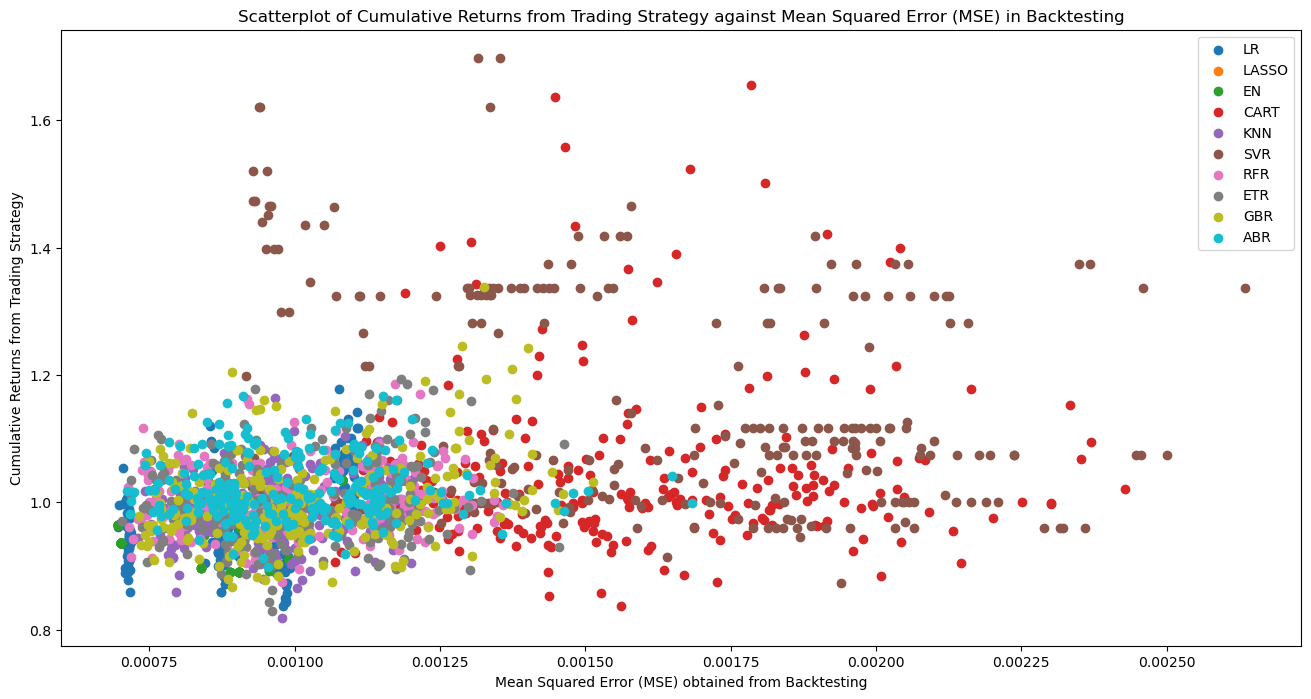

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))

for model in names:
    plt.scatter(final_result_df.loc[final_result_df['Model'] == model ]['Test_Results'], final_result_df.loc[final_result_df['Model'] == model ]['Cumulative_Returns'], label = model)

plt.title('Scatterplot of Cumulative Returns from Trading Strategy against Mean Squared Error (MSE) in Backtesting')
plt.xlabel('Mean Squared Error (MSE) obtained from Backtesting')
plt.ylabel('Cumulative Returns from Trading Strategy')
plt.legend()
plt.show()

## Fitting Selected Model [1,2,3,4] ElasticNet()

> Exogenous Variables:
* Dow Jones Industrial Average (DJIA)
* NASDAQ 100
* US Dollar Index
* VIX

In [ ]:
# Fitting ElasticNet() Model for variables [1,2,3,4]
return_period = 5
validation_size = 0.2

selected_combination_tracker = []
selected_model_tracker = []
selected_cum_returns_tracker = []

combination = [1,2,3,4]

selected_df = exogenous_df.iloc[:,combination]
selected_df = selected_df.apply(lambda x: np.log(x).diff(return_period))
selected_df = pd.concat([Y, selected_df], axis = 1).dropna().iloc[ : :return_period, :]
selected_df_Y = selected_df.iloc[ : , 0]
selected_df_X = selected_df.iloc[ : , 1:]

train_size = int(len(selected_df_X) * (1 - validation_size))
selected_df_X_train , selected_df_X_test = selected_df_X[0:train_size], selected_df_X[train_size:len(selected_df_X)]
selected_df_Y_train , selected_df_Y_test = selected_df_Y[0:train_size], selected_df_Y[train_size:len(selected_df_X)]

for model_choice in [ElasticNet()]:
    selected_df_model = model_choice.fit(selected_df_X_train, selected_df_Y_train)
    selected_df_model_predicted = selected_df_model.predict(selected_df_X_test)
    selected_df_model_predicted_cum_returns = pd.Series(selected_df_model_predicted, selected_df_X_test.index).cumsum().apply(np.exp)
    Y_test_cumulative_returns = pd.Series(selected_df_Y_test).cumsum().apply(np.exp)

    last_train_price = endogenous_df.loc[endogenous_df.index == dt.datetime(2020,1,3)]['SPY']

    # Generate Predicted Weekly Prices
    selected_df_model_predicted_weekly_prices = selected_df_model_predicted_cum_returns.apply(lambda x: x * last_train_price)

    # Set up Strategy DF, beginning with (Filtered) Daily SPY Data
    selected_df_model_strategy_df = endogenous_df.loc[(endogenous_df.index >= dt.datetime(2020,1,3)) & (endogenous_df.index <= dt.datetime(2023,10,19))]

    # Merge DF with Predicted Weekly Prices
    selected_df_model_strategy_df = selected_df_model_strategy_df.merge(selected_df_model_predicted_weekly_prices, how = 'outer', left_on = selected_df_model_strategy_df.index, right_on = selected_df_model_predicted_weekly_prices.index)

    # Rename columns
    selected_df_model_strategy_df.columns = ['Date','SPY','Weekly Predicted']
    # Shift down SPY by 5-periods
    selected_df_model_strategy_df['SPY'] = selected_df_model_strategy_df['SPY'].shift(return_period)
    # .ffill for Weekly Predicted
    selected_df_model_strategy_df['Weekly Predicted'] = selected_df_model_strategy_df['Weekly Predicted'].ffill()
    # Generate Signals column
    selected_df_model_strategy_df['Signal'] = np.where(selected_df_model_strategy_df['Weekly Predicted'] > selected_df_model_strategy_df['SPY'], 1, 0)

    # Create Positions column
    selected_df_model_strategy_df['Positions'] = selected_df_model_strategy_df['Signal'].diff()
    # Create Daily Log Returns column
    selected_df_model_strategy_df['Returns'] = np.log(selected_df_model_strategy_df['SPY'] / selected_df_model_strategy_df['SPY'].shift(1))
    # Create Strategy Returns column
    selected_df_model_strategy_df['Strategy Returns'] = selected_df_model_strategy_df['Positions'].shift(1) * selected_df_model_strategy_df['Returns']
    # Create Cumulative Returns column
    selected_df_model_strategy_df['Cumulative Returns'] = selected_df_model_strategy_df['Strategy Returns'].cumsum().apply(np.exp)

    # Print combination and model
    print(combination,model_choice)
    # Print last value of Cumulative Returns
    print(selected_df_model_strategy_df.iloc[-1]['Cumulative Returns'])
    # Append to list
    selected_combination_tracker.append(combination)
    selected_model_tracker.append(model_choice)
    selected_cum_returns_tracker.append(selected_df_model_strategy_df.iloc[-1]['Cumulative Returns'])

selected_dict = dict(Combination = selected_combination_tracker, Model = selected_model_tracker, Cumulative_Returns = selected_cum_returns_tracker)
selected_df = pd.DataFrame(selected_dict)
selected_df

[1, 2, 3, 4] ElasticNet()
0.9645284200781715


,Combination,Model,Cumulative_Returns
0,"[1, 2, 3, 4]",ElasticNet(),0.964528


In [ ]:
selected_df_model_strategy_df.dropna(subset=['Cumulative Returns'])

,Date,SPY,Weekly Predicted,Signal,Positions,Returns,Strategy Returns,Cumulative Returns
6,2020-01-13,305.135559,304.508826,0,-1.0,0.003808,0.003808,1.003815
7,2020-01-14,304.277649,304.508826,1,1.0,-0.002816,0.002816,1.006645
8,2020-01-15,305.899292,304.508826,0,-1.0,0.005315,0.005315,1.012010
9,2020-01-16,307.973450,304.508826,0,0.0,0.006758,-0.006758,1.005194
10,2020-01-17,307.087219,305.042633,0,0.0,-0.002882,-0.000000,1.005194
...,...,...,...,...,...,...,...,...
951,2023-10-13,429.540009,423.998211,0,0.0,0.011803,0.000000,0.964528
952,2023-10-16,432.290009,423.998211,0,0.0,0.006382,0.000000,0.964528
953,2023-10-17,434.540009,423.998211,0,0.0,0.005191,0.000000,0.964528
954,2023-10-18,436.320007,423.998211,0,0.0,0.004088,0.000000,0.964528


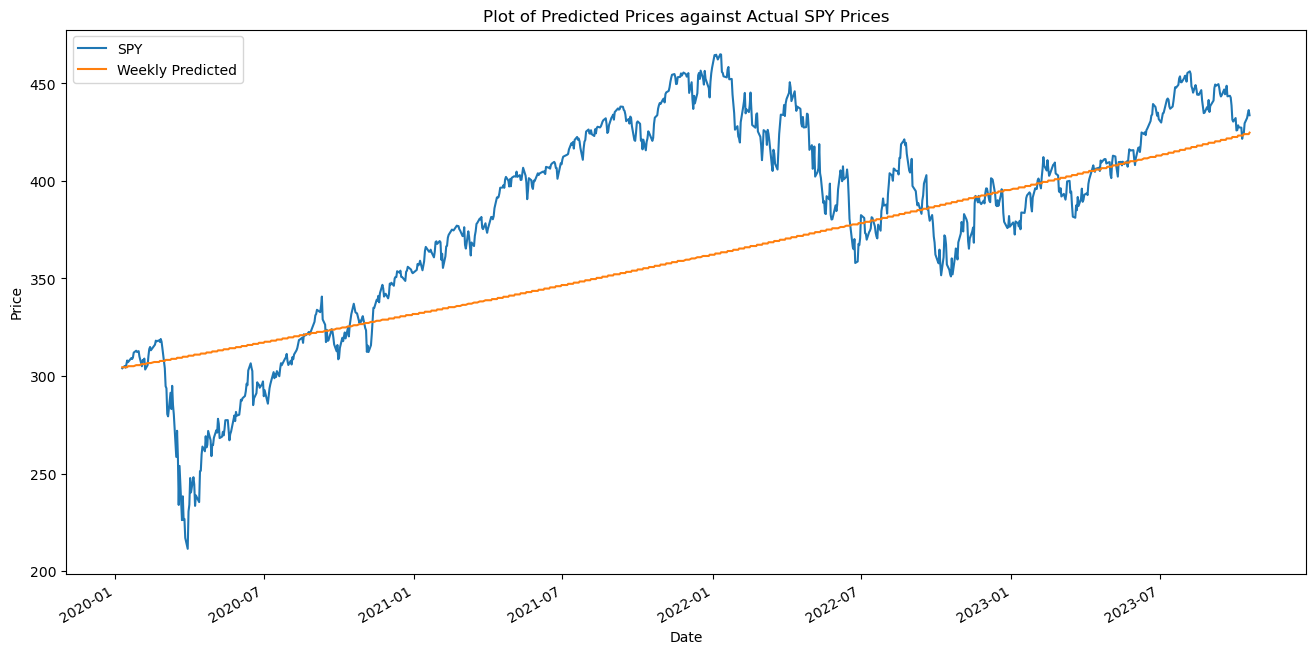

In [ ]:
selected_df_model_strategy_df_for_plotting = selected_df_model_strategy_df.copy()
selected_df_model_strategy_df_for_plotting = selected_df_model_strategy_df_for_plotting.set_index('Date')
selected_df_model_strategy_df_for_plotting[['SPY','Weekly Predicted']].dropna().plot(figsize = (16,8))
plt.title('Plot of Predicted Prices against Actual SPY Prices')
plt.ylabel('Price')
plt.show()

In [ ]:
selected_df_model_strategy_df_for_plotting['Positions'].value_counts()

 0.0    889
 1.0     33
-1.0     33
Name: Positions, dtype: int64

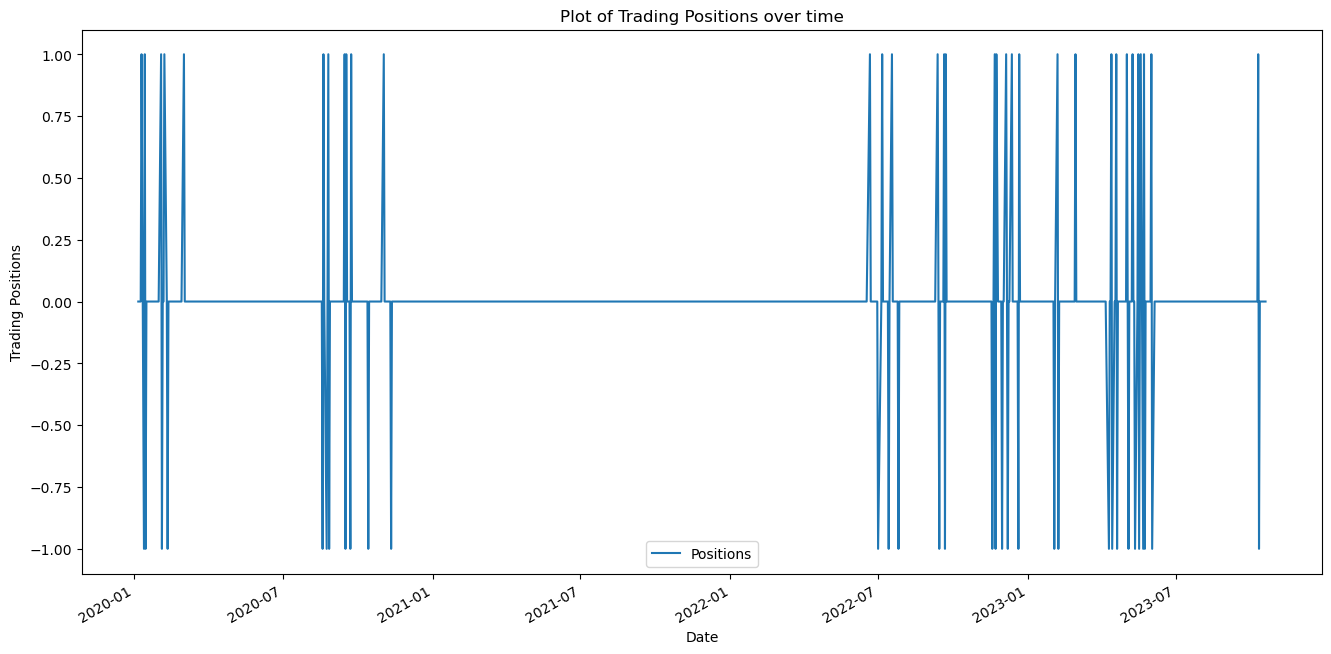

In [ ]:
selected_df_model_strategy_df_for_plotting[['Positions']].dropna().plot(figsize = (16,8))
plt.title('Plot of Trading Positions over time')
plt.ylabel('Trading Positions')
plt.show()

### Rationale for selecting this model

While our fitted ElasticNet() Model does not generate a higher return than the SVR() model, we believe that its superior predictive power over the fitted SVR() model makes it more worthy of reporting. As such, we will be reporting the ElasticNet() Model as part of our Top 3 Strategies after the 2 Momentum (Simple MA and MACD) strategies.

## Fitting Selected Model [0,1,3,4,5,6] SVR()

> Exogenous Variables:
* Crude Oil (WTI)
* Dow Jones Industrial Average (DJIA)
* US Dollar Index
* VIX
* USD/JPY
* USD/GBP

In [ ]:
# Fitting SVR() Model for variables [0,1,3,4,5,6]
return_period = 5
validation_size = 0.2

selected_combination_tracker = []
selected_model_tracker = []
selected_cum_returns_tracker = []

combination = [0,1,3,4,5,6]

selected_df = exogenous_df.iloc[:,combination]
selected_df = selected_df.apply(lambda x: np.log(x).diff(return_period))
selected_df = pd.concat([Y, selected_df], axis = 1).dropna().iloc[ : :return_period, :]
selected_df_Y = selected_df.iloc[ : , 0]
selected_df_X = selected_df.iloc[ : , 1:]

train_size = int(len(selected_df_X) * (1 - validation_size))
selected_df_X_train , selected_df_X_test = selected_df_X[0:train_size], selected_df_X[train_size:len(selected_df_X)]
selected_df_Y_train , selected_df_Y_test = selected_df_Y[0:train_size], selected_df_Y[train_size:len(selected_df_X)]

for model_choice in [SVR()]: # Arima(endog = , exog = , order = [ 5,0,5])
    selected_df_model = model_choice.fit(selected_df_X_train, selected_df_Y_train)
    selected_df_model_predicted = selected_df_model.predict(selected_df_X_test)
    selected_df_model_predicted_cum_returns = pd.Series(selected_df_model_predicted, selected_df_X_test.index).cumsum().apply(np.exp)
    Y_test_cumulative_returns = pd.Series(selected_df_Y_test).cumsum().apply(np.exp)

    last_train_price = endogenous_df.loc[endogenous_df.index == dt.datetime(2020,1,3)]['SPY']

    # Generate Predicted Weekly Prices
    selected_df_model_predicted_weekly_prices = selected_df_model_predicted_cum_returns.apply(lambda x: x * last_train_price)

    # Set up Strategy DF, beginning with (Filtered) Daily SPY Data
    selected_df_model_strategy_df = endogenous_df.loc[(endogenous_df.index >= dt.datetime(2020,1,3)) & (endogenous_df.index <= dt.datetime(2023,10,19))]

    # Merge DF with Predicted Weekly Prices
    selected_df_model_strategy_df = selected_df_model_strategy_df.merge(selected_df_model_predicted_weekly_prices, how = 'outer', left_on = selected_df_model_strategy_df.index, right_on = selected_df_model_predicted_weekly_prices.index)

    # Rename columns
    selected_df_model_strategy_df.columns = ['Date','SPY','Weekly Predicted']
    # Shift down SPY by 5-periods
    selected_df_model_strategy_df['SPY'] = selected_df_model_strategy_df['SPY'].shift(return_period)
    # .ffill for Weekly Predicted
    selected_df_model_strategy_df['Weekly Predicted'] = selected_df_model_strategy_df['Weekly Predicted'].ffill()
    # Generate Signals column
    selected_df_model_strategy_df['Signal'] = np.where(selected_df_model_strategy_df['Weekly Predicted'] > selected_df_model_strategy_df['SPY'], 1, 0)

    # Create Positions column
    selected_df_model_strategy_df['Positions'] = selected_df_model_strategy_df['Signal'].diff()
    # Create Daily Log Returns column
    selected_df_model_strategy_df['Returns'] = np.log(selected_df_model_strategy_df['SPY'] / selected_df_model_strategy_df['SPY'].shift(1))
    # Create Strategy Returns column
    selected_df_model_strategy_df['Strategy Returns'] = selected_df_model_strategy_df['Positions'].shift(1) * selected_df_model_strategy_df['Returns']
    # Create Cumulative Returns column
    selected_df_model_strategy_df['Cumulative Returns'] = selected_df_model_strategy_df['Strategy Returns'].cumsum().apply(np.exp)

    # Print combination and model
    print(combination,model_choice)
    # Print last value of Cumulative Returns
    print(selected_df_model_strategy_df.iloc[-1]['Cumulative Returns'])
    # Append to list
    selected_combination_tracker.append(combination)
    selected_model_tracker.append(model_choice)
    selected_cum_returns_tracker.append(selected_df_model_strategy_df.iloc[-1]['Cumulative Returns'])

selected_dict = dict(Combination = selected_combination_tracker, Model = selected_model_tracker, Cumulative_Returns = selected_cum_returns_tracker)
selected_df = pd.DataFrame(selected_dict)
selected_df

[0, 1, 3, 4, 5, 6] SVR()
1.6980884294208096


,Combination,Model,Cumulative_Returns
0,"[0, 1, 3, 4, 5, 6]",SVR(),1.698088


In [ ]:
selected_df_model_strategy_df.dropna(subset = ['Cumulative Returns'])

,Date,SPY,Weekly Predicted,Signal,Positions,Returns,Strategy Returns,Cumulative Returns
6,2020-01-13,305.135559,295.342463,0,0.0,0.003808,0.0,1.000000
7,2020-01-14,304.277649,295.342463,0,0.0,-0.002816,-0.0,1.000000
8,2020-01-15,305.899292,295.342463,0,0.0,0.005315,0.0,1.000000
9,2020-01-16,307.973450,295.342463,0,0.0,0.006758,0.0,1.000000
10,2020-01-17,307.087219,293.886609,0,0.0,-0.002882,-0.0,1.000000
...,...,...,...,...,...,...,...,...
951,2023-10-13,429.540009,90.215282,0,0.0,0.011803,0.0,1.698088
952,2023-10-16,432.290009,90.215282,0,0.0,0.006382,0.0,1.698088
953,2023-10-17,434.540009,90.215282,0,0.0,0.005191,0.0,1.698088
954,2023-10-18,436.320007,88.858602,0,0.0,0.004088,0.0,1.698088


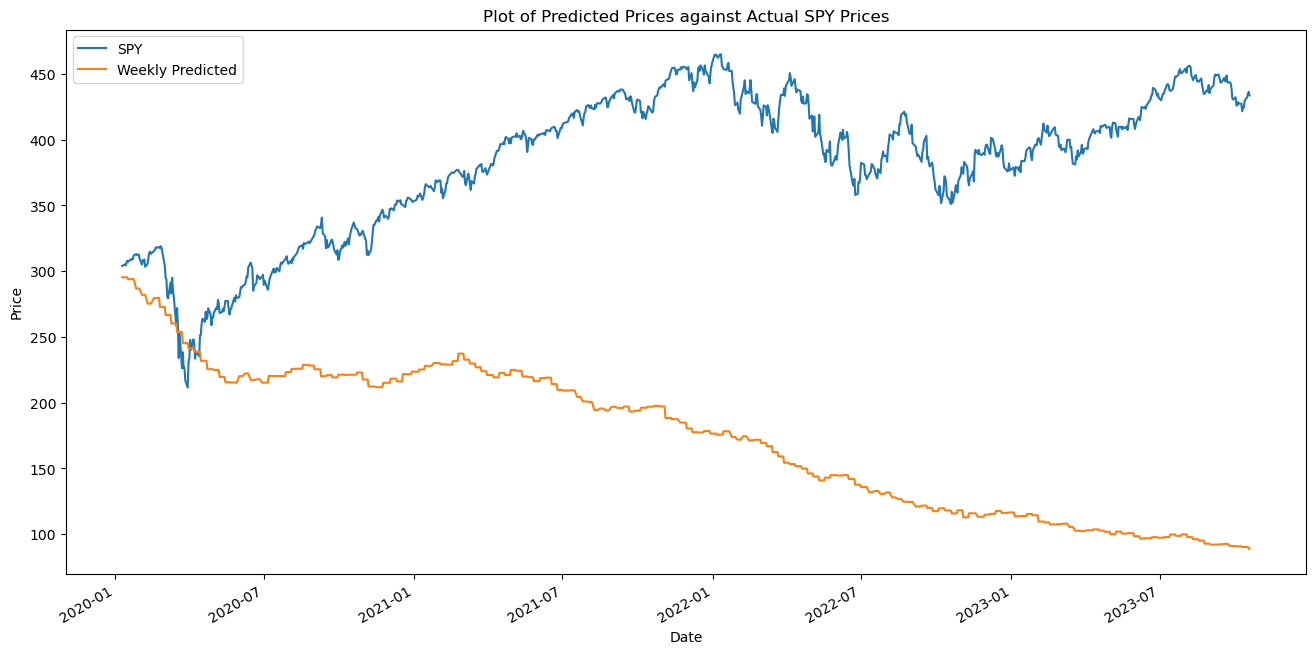

In [ ]:
selected_df_model_strategy_df_for_plotting = selected_df_model_strategy_df.copy()
selected_df_model_strategy_df_for_plotting = selected_df_model_strategy_df_for_plotting.set_index('Date')
selected_df_model_strategy_df_for_plotting[['SPY','Weekly Predicted']].dropna().plot(figsize = (16,8))
plt.title('Plot of Predicted Prices against Actual SPY Prices')
plt.ylabel('Price')
plt.show()

In [ ]:
selected_df_model_strategy_df_for_plotting['Positions'].value_counts()

 0.0    943
 1.0      6
-1.0      6
Name: Positions, dtype: int64

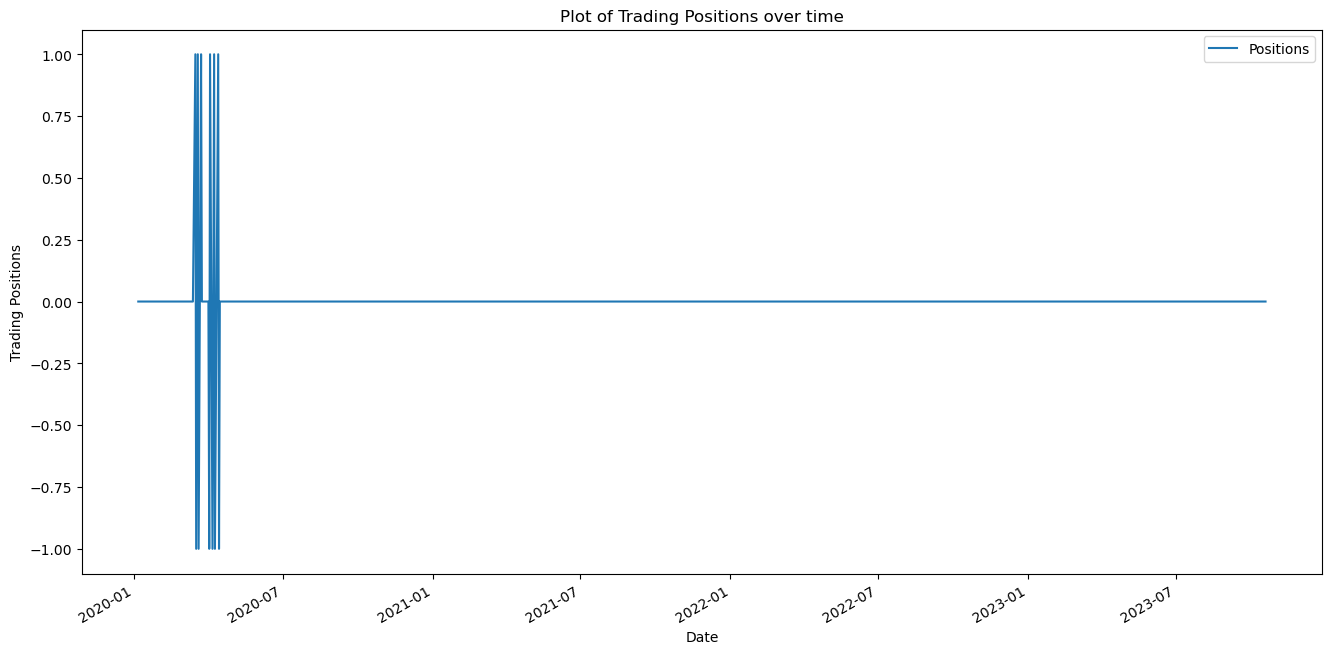

In [ ]:
selected_df_model_strategy_df_for_plotting[['Positions']].dropna().plot(figsize = (16,8))
plt.title('Plot of Trading Positions over time')
plt.ylabel('Trading Positions')
plt.show()

# ARIMAX

In [ ]:
# To check for stationarity
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima
from pmdarima.arima import nsdiffs, ndiffs

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

#H0: It is stationary
#H1: It is non-stationary

def kpss_test(iron_ore_62_filtered):
    result = kpss(iron_ore_62_filtered)
    labels = ['KPSS Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is non-stationary")
    else:
        print("Weak evidence against null hypothesis, time series may be stationary")

for i in range(len(exogenous_df.columns)):
    adfuller_test(exogenous_df.iloc[:,i].dropna())
    kpss_test(exogenous_df.iloc[:,i].dropna())
    print('No. of Differences Required: ',ndiffs(exogenous_df.iloc[:,i].dropna()))
    print('=============================================================================================================================')

ADF Test Statistic : -3.138828938594872
p-value : 0.0238099599771421
#Lags Used : 29
Number of Observations Used : 4748
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
KPSS Test Statistic : 1.087807027441212
p-value : 0.01
#Lags Used : 42
Number of Observations Used : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is non-stationary
No. of Differences Required:  1
ADF Test Statistic : 0.05300248761476215
p-value : 0.9627019478169113
#Lags Used : 31
Number of Observations Used : 4751
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary
KPSS Test Statistic : 10.099339279478178
p-value : 0.01
#Lags Used : 42
Number of Observations Used : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is non-statio

In [ ]:
# First run to save date index for ARIMA X TEST
combination = [1,2,3,4]

arima_df = exogenous_df.iloc[:,combination]
arima_df = arima_df.apply(lambda x: np.log(x).diff(return_period))
arima_df = pd.concat([Y, arima_df], axis = 1).dropna().iloc[ : :return_period, :]
# Take common order of non-seasonal differencing (first difference)
arima_df = arima_df.diff(1)
# dropna after differencing
arima_df = arima_df.dropna()
arima_df_Y = arima_df.iloc[ : , 0]
arima_df_X = arima_df.iloc[:, 1:]

train_size = int(len(arima_df_X) * (1 - validation_size))
arima_df_X_train , arima_df_X_test = arima_df_X[0:train_size], arima_df_X[train_size:len(arima_df_X)]
arima_df_Y_train , arima_df_Y_test = arima_df_Y[0:train_size], arima_df_Y[train_size:len(arima_df_X)]
arima_df_X_test_index = arima_df_X_test.index
# Save resultant date index for later use
arima_df_X_test_index

DatetimeIndex(['2020-01-10', '2020-01-17', '2020-01-27', '2020-02-03',
               '2020-02-10', '2020-02-18', '2020-02-25', '2020-03-03',
               '2020-03-10', '2020-03-17',
               ...
               '2023-08-16', '2023-08-23', '2023-08-30', '2023-09-07',
               '2023-09-14', '2023-09-21', '2023-09-28', '2023-10-05',
               '2023-10-12', '2023-10-19'],
              dtype='datetime64[ns]', name='Date', length=191, freq=None)

## Hyperparameter Tuning for ARIMAX

In our model fitting for ARIMA with Exogenous Variables (ARIMAX), we have elected to perform hyperparameter tuning, looping through AR(p) and MA(q) orders of up to 5 to determine the optimal ARIMA model using `AICc` as the model selection criterion.

As usual, we apply the 5-day lag to our exogenous variables, as well as an 80-20 train test split.

### Based on the conclusions from our Feature Selection, we select the following variables: [1,2,3,4]
### DJIA, NASDAQ 100, US Dollar Index, VIX

> This combination of exogenous variables is also the optimal combination of exogenous variables as seen in our ElasticNet() model above

From the results of the stationarity tests and ndiffs() above, we take a common order of non-seasonal differencing for all exogenous variables (at d = 1)

In [ ]:
# For ARIMAX
return_period = 5
validation_size = 0.2

arima_combination_tracker = []
arima_model_tracker = []
arima_order_tracker = []
arima_aicc_tracker = []
arima_cum_returns_tracker = []

# Selected combination of variables based on Feature Selection
combination = [1,2,3,4]

arima_df = exogenous_df.iloc[:,combination]
arima_df = arima_df.apply(lambda x: np.log(x).diff(return_period))
arima_df = pd.concat([Y, arima_df], axis = 1).dropna().iloc[ : :return_period, :]
# Take common order of non-seasonal differencing (first difference)
arima_df = arima_df.diff(1)
# dropna after differencing
arima_df = arima_df.dropna()
arima_df = arima_df.reset_index(drop = True)
arima_df_Y = arima_df.iloc[ : , 0]
arima_df_X = arima_df.iloc[:, 1:]

train_size = int(len(arima_df_X) * (1 - validation_size))
arima_df_X_train , arima_df_X_test = arima_df_X[0:train_size], arima_df_X[train_size:len(arima_df_X)]
arima_df_Y_train , arima_df_Y_test = arima_df_Y[0:train_size], arima_df_Y[train_size:len(arima_df_X)]

for p in tqdm(range(0,6)):

    for q in range(0,6):

        for model_choice in [ARIMA(endog = arima_df_Y_train, exog = arima_df_X_train, order = (p, 0, q))]:
            arima_df_model = model_choice.fit()
            arima_df_model_predicted = arima_df_model.predict(start = 762, end = 952, exog = arima_df_X_test)
            # Note: Reverse the differencing
            arima_df_model_predicted = arima_df_model_predicted.cumsum()
            # Calculate cumulative returns
            arima_df_model_predicted_cum_returns = pd.Series(arima_df_model_predicted, arima_df_X_test.index).cumsum().apply(np.exp)
            Y_test_cumulative_returns = pd.Series(arima_df_Y_test).cumsum().apply(np.exp)

            last_train_price = endogenous_df.loc[endogenous_df.index == dt.datetime(2020,1,3)]['SPY']

            # Generate Predicted Weekly Prices
            arima_df_model_predicted_weekly_prices = arima_df_model_predicted_cum_returns.apply(lambda x: x * last_train_price)
            # Convert back to date index using date index saved earlier
            arima_df_model_predicted_weekly_prices.index = arima_df_X_test_index

            # Set up Strategy DF, beginning with (Filtered) Daily SPY Data
            arima_df_model_strategy_df = endogenous_df.loc[(endogenous_df.index >= dt.datetime(2020,1,3)) & (endogenous_df.index <= dt.datetime(2023,10,19))]

            # Merge DF with Predicted Weekly Prices
            arima_df_model_strategy_df = arima_df_model_strategy_df.merge(arima_df_model_predicted_weekly_prices, how = 'outer', left_on = arima_df_model_strategy_df.index, right_on = arima_df_model_predicted_weekly_prices.index)

            # Rename columns
            arima_df_model_strategy_df.columns = ['Date','SPY','Weekly Predicted']
            # Shift down SPY by 5-periods
            arima_df_model_strategy_df['SPY'] = arima_df_model_strategy_df['SPY'].shift(return_period)
            # .ffill for Weekly Predicted
            arima_df_model_strategy_df['Weekly Predicted'] = arima_df_model_strategy_df['Weekly Predicted'].ffill()
            # Generate Signals column
            arima_df_model_strategy_df['Signal'] = np.where(arima_df_model_strategy_df['Weekly Predicted'] > arima_df_model_strategy_df['SPY'], 1, 0)

            # Create Positions column
            arima_df_model_strategy_df['Positions'] = arima_df_model_strategy_df['Signal'].diff()
            # Create Daily Log Returns column
            arima_df_model_strategy_df['Returns'] = np.log(arima_df_model_strategy_df['SPY'] / arima_df_model_strategy_df['SPY'].shift(1))
            # Create Strategy Returns column
            arima_df_model_strategy_df['Strategy Returns'] = arima_df_model_strategy_df['Positions'].shift(1) * arima_df_model_strategy_df['Returns']
            # Create Cumulative Returns column
            arima_df_model_strategy_df['Cumulative Returns'] = arima_df_model_strategy_df['Strategy Returns'].cumsum().apply(np.exp)

            # Print combination and model
            print(combination, model_choice, (p,1,q), arima_df_model.aicc)
            # Print last value of Cumulative Returns
            print(arima_df_model_strategy_df.iloc[-1]['Cumulative Returns'])
            # Append to list
            arima_combination_tracker.append(combination)
            arima_model_tracker.append(model_choice)
            # To manually update order of differencing
            arima_order_tracker.append((p,1,q))
            # Store AICc results
            arima_aicc_tracker.append(arima_df_model.aicc)
            arima_cum_returns_tracker.append(arima_df_model_strategy_df.iloc[-1]['Cumulative Returns'])

arima_dict = dict(Combination = arima_combination_tracker, Model = arima_model_tracker, ARIMA_Order = arima_order_tracker, AICc = arima_aicc_tracker, Cumulative_Returns = arima_cum_returns_tracker)
arima_df = pd.DataFrame(arima_dict)
arima_df

  0%|          | 0/6 [00:00<?, ?it/s]

[1, 2, 3, 4] <statsmodels.tsa.arima.model.ARIMA object at 0x00000205088F0A10> (0, 1, 0) -3202.8762386168787
0.9635513254436464
[1, 2, 3, 4] <statsmodels.tsa.arima.model.ARIMA object at 0x0000020508669BD0> (0, 1, 1) -3545.6452413779125
0.9487556926239306
[1, 2, 3, 4] <statsmodels.tsa.arima.model.ARIMA object at 0x00000205089B39D0> (0, 1, 2) -3526.159616753947
0.9559218146794796
[1, 2, 3, 4] <statsmodels.tsa.arima.model.ARIMA object at 0x000002050862D8D0> (0, 1, 3) -3525.9926441049834
0.9549560260718895
[1, 2, 3, 4] <statsmodels.tsa.arima.model.ARIMA object at 0x0000020508618210> (0, 1, 4) -3520.845197453807
1.0118506128480194
[1, 2, 3, 4] <statsmodels.tsa.arima.model.ARIMA object at 0x0000020508628A50> (0, 1, 5) -3535.5212660752945
0.9981632288737986
[1, 2, 3, 4] <statsmodels.tsa.arima.model.ARIMA object at 0x000002050869CF10> (1, 1, 0) -3259.1916266919034
0.9816557129054609
[1, 2, 3, 4] <statsmodels.tsa.arima.model.ARIMA object at 0x0000020508951150> (1, 1, 1) -3522.4591814907067
1.021

,Combination,Model,ARIMA_Order,AICc,Cumulative_Returns
0,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(0, 1, 0)",-3202.876239,0.963551
1,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(0, 1, 1)",-3545.645241,0.948756
2,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(0, 1, 2)",-3526.159617,0.955922
3,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(0, 1, 3)",-3525.992644,0.954956
4,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(0, 1, 4)",-3520.845197,1.011851
5,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(0, 1, 5)",-3535.521266,0.998163
6,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(1, 1, 0)",-3259.191627,0.981656
7,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(1, 1, 1)",-3522.459181,1.021748
8,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(1, 1, 2)",-3522.725934,0.956761
9,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(1, 1, 3)",-3538.921745,0.991902


> Unfortunately, the lowest AICc model produced an SPY price forecast with significant deviation from the actual trend. Hence, we will NOT be considering this model as part of our top 3 strategies.

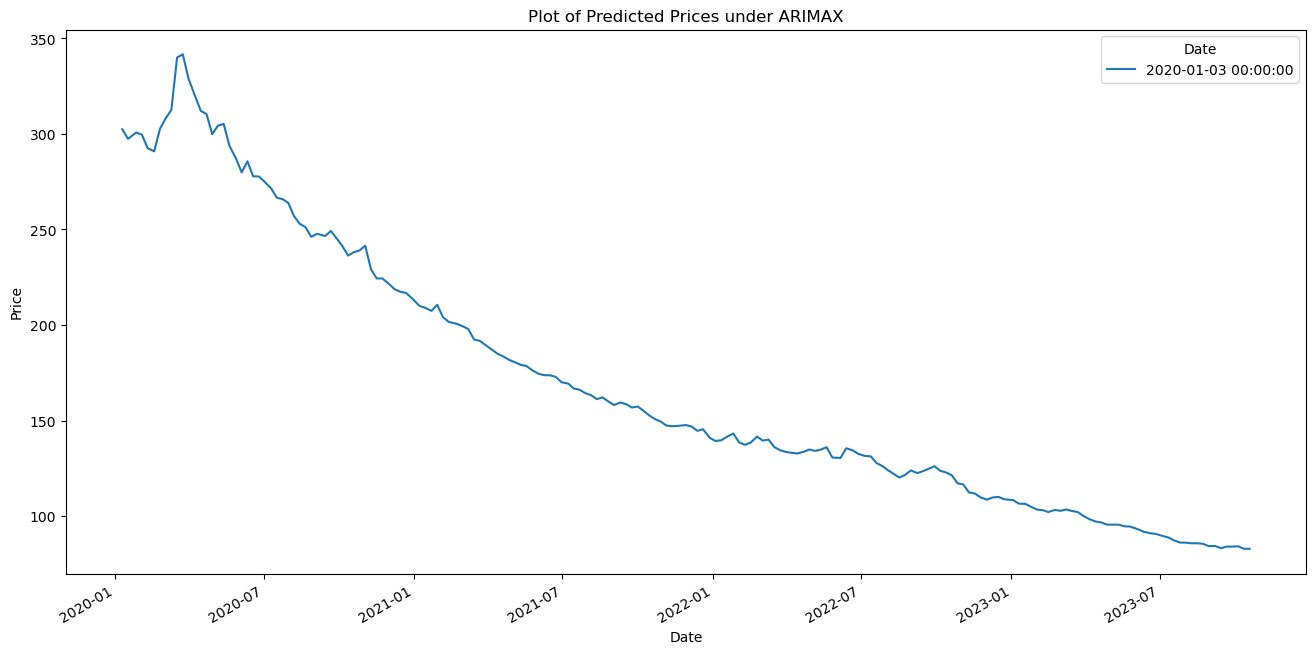

In [ ]:
arima_df_model_predicted_weekly_prices.plot(figsize = (16,8))
plt.title('Plot of Predicted Prices under ARIMAX')
plt.ylabel('Price')
plt.show()

In [ ]:
arima_df['AICc'].min()

-3545.6452413779125

In [ ]:
arima_df.loc[arima_df['AICc'] == arima_df['AICc'].min()]

,Combination,Model,ARIMA_Order,AICc,Cumulative_Returns
1,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(0, 1, 1)",-3545.645241,0.948756


In [ ]:
arima_df['Cumulative_Returns'].max()

1.0463745722274582

In [ ]:
arima_df.loc[arima_df['Cumulative_Returns'] == arima_df['Cumulative_Returns'].max()]

,Combination,Model,ARIMA_Order,AICc,Cumulative_Returns
32,"[1, 2, 3, 4]",<statsmodels.tsa.arima.model.ARIMA object at 0...,"(5, 1, 2)",-3531.000343,1.046375


## Simple Neural Network

We also considered building a simple neural network for this purpose. However, the cumulative returns were not optimal as well. Hence, we will NOT be considering this model as part of our top 3 strategies.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(final_df_X_train)
X_test_scaled = scaler.transform(final_df_X_test)

In [ ]:
# Build a simple neural network model
nnmodel = Sequential()
nnmodel.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nnmodel.add(Dropout(0.2))
nnmodel.add(Dense(32, activation='relu'))
nnmodel.add(Dropout(0.2))
nnmodel.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
nnmodel.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nnmodel.fit(X_train_scaled, final_df_Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = nnmodel.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(final_df_Y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')



Epoch 1/50

19/19 [==============================] - 2s 25ms/step - loss: 0.1700 - val_loss: 0.0146
Epoch 2/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0757 - val_loss: 0.0136
Epoch 3/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0632 - val_loss: 0.0075
Epoch 4/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0470 - val_loss: 0.0044
Epoch 5/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0418 - val_loss: 0.0046
Epoch 6/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0041
Epoch 7/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0209 - val_loss: 0.0040
Epoch 8/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0214 - val_loss: 0.0040
Epoch 9/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0170 - val_loss: 0.0032
Epoch 10/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0193 - val_loss: 0.0028
Epoch 11/5

In [ ]:
y_pred

array([[-1.07060093e-03],
       [ 6.23278366e-03],
       [-1.07060093e-03],
       [ 9.81725752e-04],
       [-2.38979072e-03],
       [-1.07060093e-03],
       [-2.66791903e-03],
       [-3.57794240e-02],
       [ 6.93218261e-02],
       [-2.14295350e-02],
       [ 1.11217676e-02],
       [ 8.49531814e-02],
       [ 2.96248533e-02],
       [ 1.76399574e-02],
       [-5.27728908e-03],
       [ 2.60156095e-02],
       [-1.34251848e-01],
       [-8.26202706e-03],
       [-3.47052217e-02],
       [ 1.10069141e-02],
       [ 7.96336681e-05],
       [-1.63228177e-02],
       [-1.07060093e-03],
       [-4.73551918e-03],
       [-1.07060093e-03],
       [-1.78822502e-02],
       [ 1.28151327e-02],
       [-1.93518610e-03],
       [-1.30829848e-02],
       [-4.22144309e-03],
       [-5.64220361e-02],
       [-1.47874737e-02],
       [-1.47611415e-02],
       [ 6.98493700e-03],
       [ 3.54149938e-02],
       [ 8.79717898e-03],
       [-1.35944795e-03],
       [-6.01331051e-03],
       [-1.4

In [ ]:
y_pred.reshape(-1,)

array([-1.07060093e-03,  6.23278366e-03, -1.07060093e-03,  9.81725752e-04,
       -2.38979072e-03, -1.07060093e-03, -2.66791903e-03, -3.57794240e-02,
        6.93218261e-02, -2.14295350e-02,  1.11217676e-02,  8.49531814e-02,
        2.96248533e-02,  1.76399574e-02, -5.27728908e-03,  2.60156095e-02,
       -1.34251848e-01, -8.26202706e-03, -3.47052217e-02,  1.10069141e-02,
        7.96336681e-05, -1.63228177e-02, -1.07060093e-03, -4.73551918e-03,
       -1.07060093e-03, -1.78822502e-02,  1.28151327e-02, -1.93518610e-03,
       -1.30829848e-02, -4.22144309e-03, -5.64220361e-02, -1.47874737e-02,
       -1.47611415e-02,  6.98493700e-03,  3.54149938e-02,  8.79717898e-03,
       -1.35944795e-03, -6.01331051e-03, -1.48243387e-04, -3.13797258e-02,
        2.70416681e-03, -3.56378593e-02, -1.07060093e-03, -1.07060093e-03,
       -5.02625480e-03, -1.07060093e-03, -2.69582961e-03, -2.49191711e-04,
       -7.11014541e-03, -7.92864487e-02, -1.39510154e-03, -1.07060093e-03,
        3.74291977e-03, -

In [ ]:
nnmodel_predicted_cum_returns = pd.Series(y_pred.reshape(-1,), new_df_X_test.index).cumsum().apply(np.exp)
nnmodel_predicted_cum_returns

Date
2020-01-07    0.998930
2020-01-14    1.005176
2020-01-22    1.004100
2020-01-29    1.005086
2020-02-05    1.002687
                ...   
2023-09-20    0.528429
2023-09-27    0.522079
2023-10-04    0.524084
2023-10-12    0.523523
2023-10-20    0.512844
Length: 187, dtype: float32

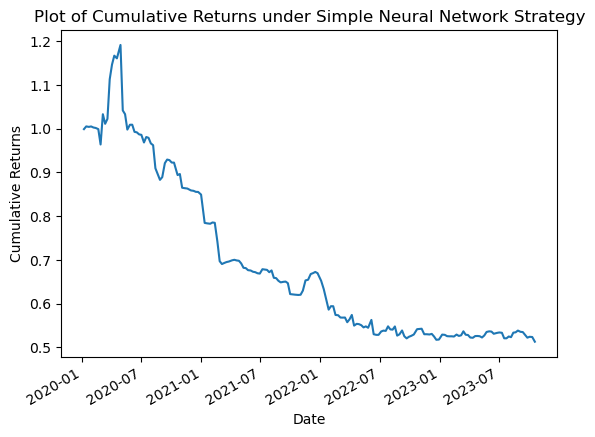

In [ ]:
nnmodel_predicted_cum_returns.plot()
plt.title('Plot of Cumulative Returns under Simple Neural Network Strategy')
plt.ylabel('Cumulative Returns')
plt.show()

## <a id = "p2">2.</a>  <font color = "green"> Backtesting of Trading Strategies </font>  [back to table of contents](#top)

## Part 2 (7 points)
Second, you should backtest the above trading strategies and come up with accompanying data visualization and evidentiary numerical values (i.e., `Sharpe Ratio`, `compound annual growth rate`, `maximum drawdown`, and `how much is left on your account`) that allow you to compare if and which of your strategies beat the baseline performance of S&P 500, and by how much.


### <a id = "p2.1">2.1 </a> <font color = "green"> Momentum Trading Strategies </font>  [back to table of contents](#top)

### <a id = "p2.1.1">2.1.1 </a> <font color = "green"> Simple Moving Average Crossover </font>  [back to table of contents](#top)

### Ending Capital

In [19]:
max_final_capital

460541.91628087196

<Axes: xlabel='Date'>

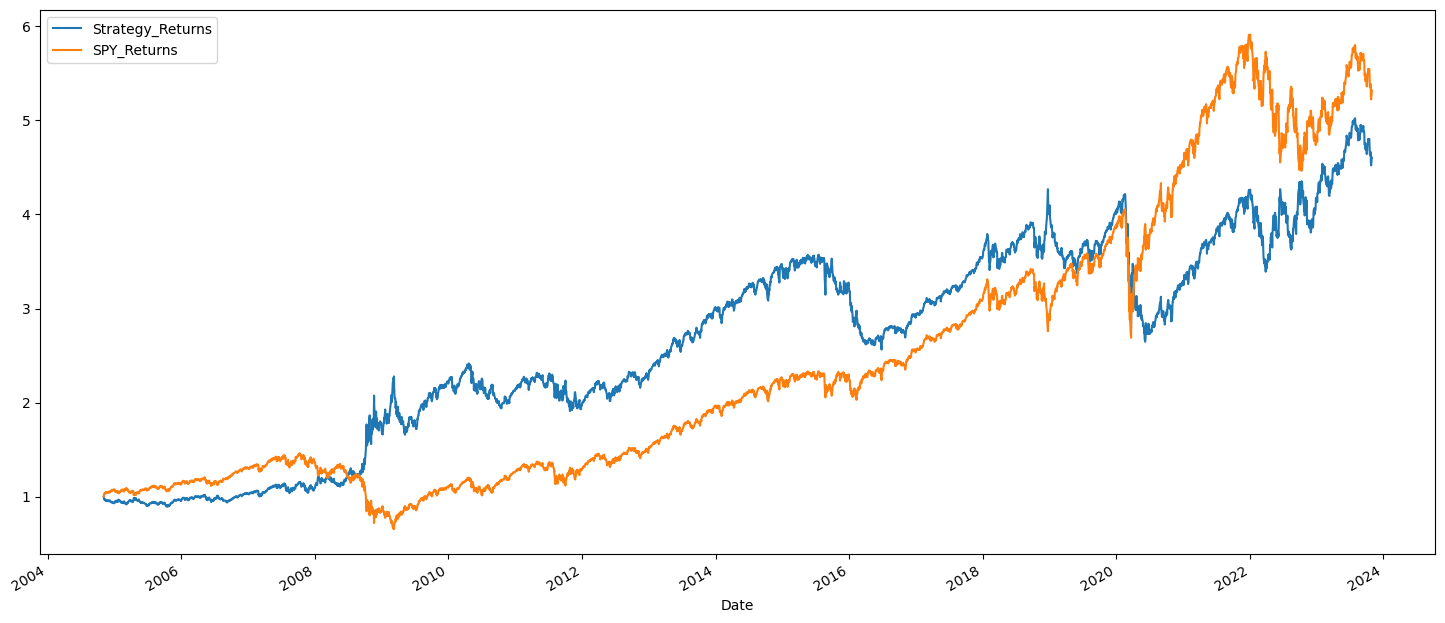

In [20]:
spy[["Strategy_Returns", "SPY_Returns"]].cumsum().apply(np.exp).plot(figsize = [18, 8])

### Sharpe Ratio

In [21]:
sharpe_sma = np.sqrt(252) * (spy["Strategy_Returns"].mean() / spy["Strategy_Returns"].std())
sharpe_sma

0.4164649124727374

### Compound Annual Growth Rate

In [22]:
days_spy =\
(    (spy.index[-1] - spy.index[0])
     .days
)

initial_capital = 1e5
CAGR_sma = ((max_final_capital / initial_capital) ** (365.0/days_spy)) -1

CAGR_sma

0.0836619105651919

### Maximum Drawdown & Longest Drawdown Duration

In [23]:
drawdown_sma = 1 - (spy["Cumulative_Returns"] / spy["Max_Gross_Performance"])
drawdown_sma.max()

0.3800870399370304

In [24]:
past_periods_sma =\
(
    drawdown_sma[drawdown_sma == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_sma[drawdown_sma == 0].index[   : -1].to_pydatetime()
)

present_period_sma =\
(
    spy.index[ -1 ].to_pydatetime()
    -
    drawdown_sma[drawdown_sma == 0].index[ -1 ].to_pydatetime()
)

longest_drawdown_sma = max(past_periods_sma.max(), present_period_sma)
longest_drawdown_sma

datetime.timedelta(days=1373)

<Axes: xlabel='Date'>

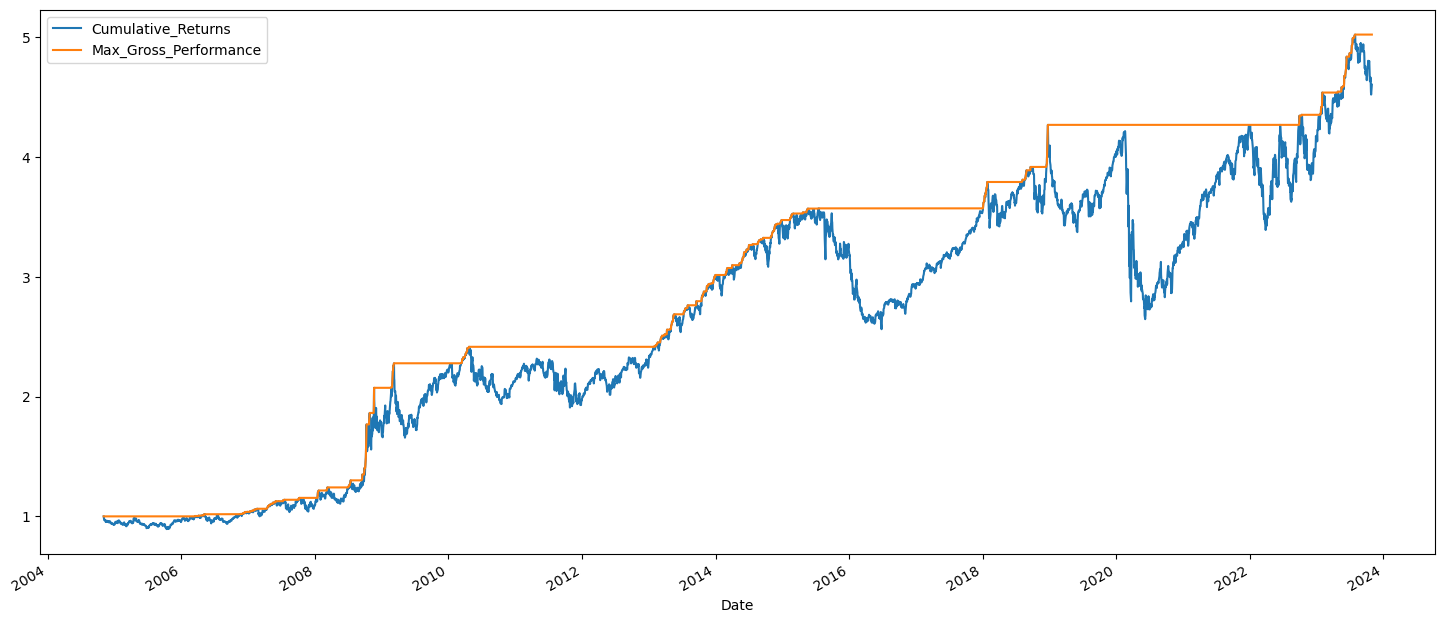

In [25]:
spy[["Cumulative_Returns", "Max_Gross_Performance"]].dropna().plot(figsize = [18, 8])

### <a id = "p2.1.2">2.1.2 </a> <font color = "green"> Time Series Momentum </font>  [back to table of contents](#top)

### Ending Capital

In [26]:
initial_capital = 100000
final_capital_ts= initial_capital * spy_close["Cumulative_Returns"][-1]
final_capital_ts

20404.386966551632

<Axes: xlabel='Date'>

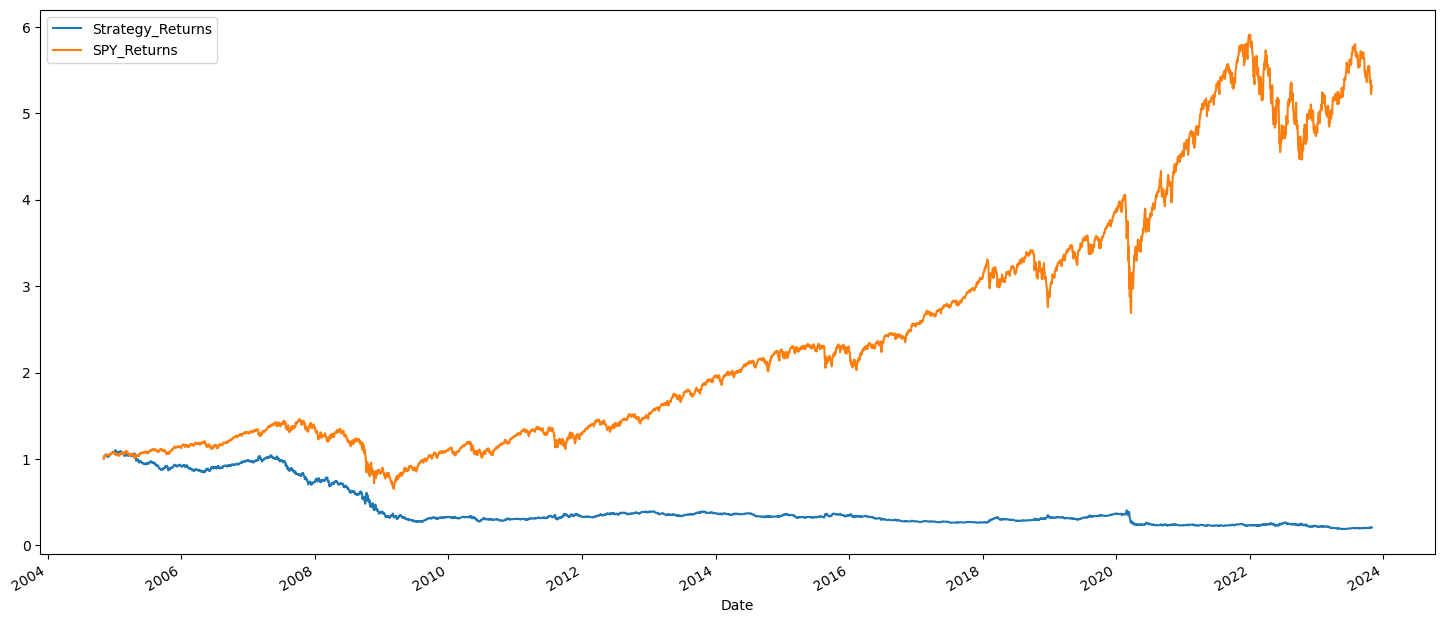

In [27]:
spy_close[["Strategy_Returns", "SPY_Returns"]].cumsum().apply(np.exp).plot(figsize = [18, 8])

### Sharpe Ratio

In [28]:
sharpe_ts = np.sqrt(252) * (spy_close["Strategy_Returns"].mean() / spy_close["Strategy_Returns"].std())
sharpe_ts

-0.4339813367704456

### Compound Annual Growth Rate

In [29]:
days_spy =\
(    (spy.index[-1] - spy.index[0])
     .days
)

CAGR_ts = ((final_capital_ts / initial_capital) ** (365.0/days_spy)) - 1
CAGR_ts

-0.08021701807368775

### Maximum Drawdown & Longest Drawdown Duration

In [30]:
drawdown_ts = 1 - (spy_close["Cumulative_Returns"] / spy_close["Max_Gross_Performance"])
drawdown_ts.max()

0.830598025291692

In [31]:
past_periods_ts =\
(
    drawdown_ts[drawdown_ts == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_ts[drawdown_ts == 0].index[   : -1].to_pydatetime()
)

present_period_ts =\
(
    spy_close.index[ -1 ].to_pydatetime()
    -
    drawdown_ts[drawdown_ts == 0].index[ -1 ].to_pydatetime()
)

longest_drawdown_ts = max(past_periods_ts.max(), present_period_ts)
longest_drawdown_ts

datetime.timedelta(days=6873)

<Axes: xlabel='Date'>

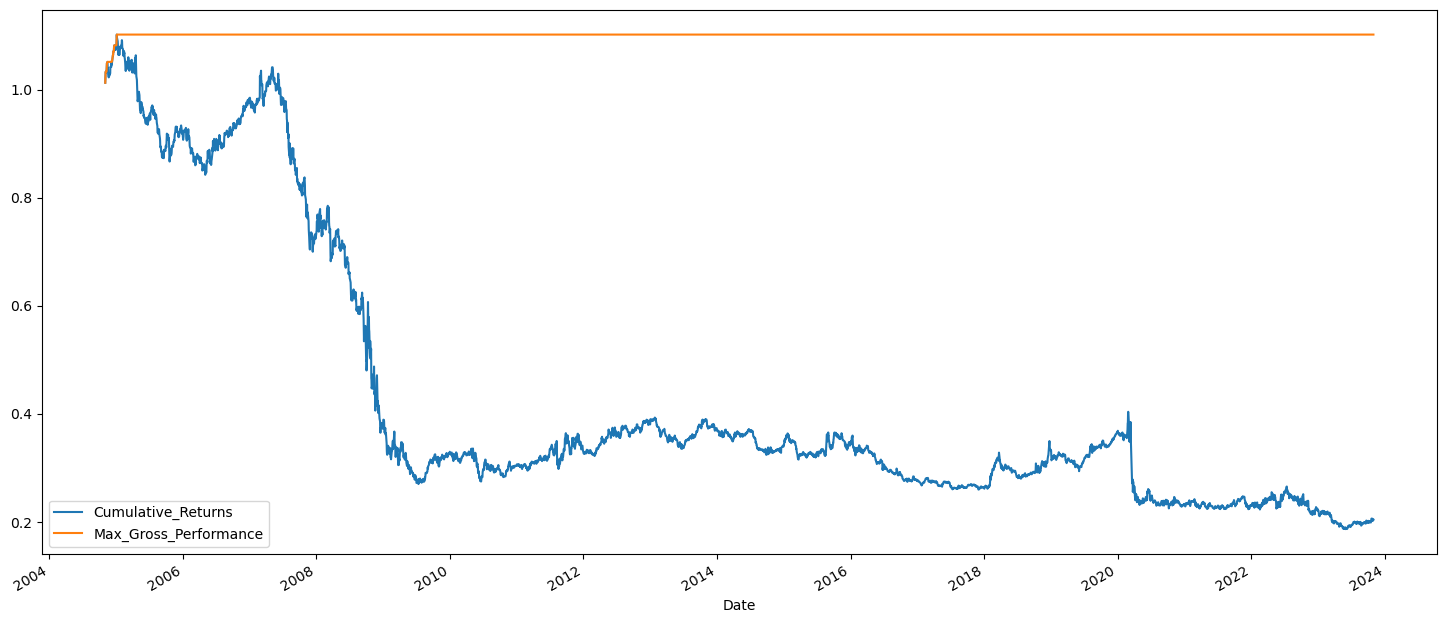

In [32]:
spy_close[["Cumulative_Returns", "Max_Gross_Performance"]].dropna().plot(figsize = [18, 8])

### <a id = "p2.1.3">2.1.3 </a> <font color = "green"> MACD </font>  [back to table of contents](#top)

### Ending Capital

<Axes: xlabel='Date'>

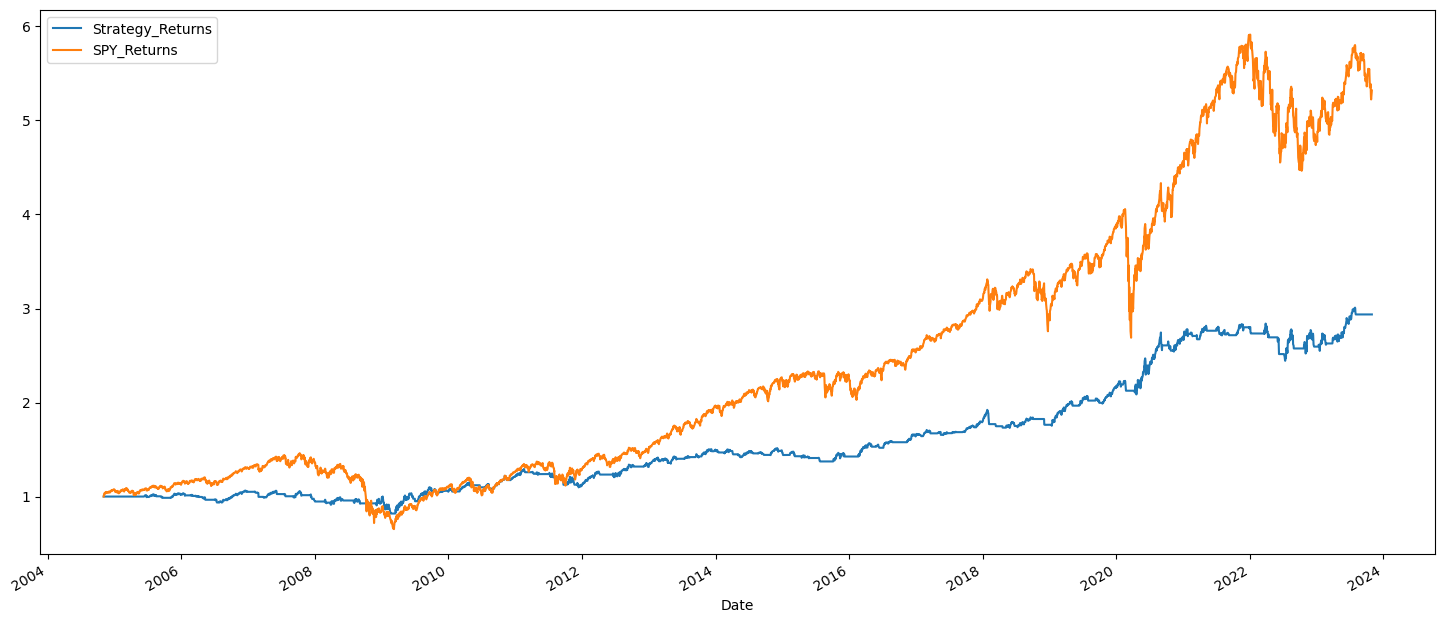

In [33]:
SPY_macd[["Strategy_Returns", "SPY_Returns"]].cumsum().apply(np.exp).plot(figsize = [18, 8])

In [34]:
final_capital_macd = max_final_capital_macd
final_capital_macd

293699.48172650335

### Sharpe Ratio

In [35]:
Sharpe_SPY_macd =\
(
    np.sqrt(252) * (SPY_macd["Strategy_Returns"].mean() / SPY_macd["Strategy_Returns"].std()
                    )
)
Sharpe_SPY_macd

0.5395798244232114

### Compound Annual Growth Rate

In [36]:
days_SPY_macd =\
(    (SPY_macd.index[-1] - SPY_macd.index[0])
     .days
)

CAGR_SPY_macd = ((max_final_capital_macd / initial_capital) ** (365.0/days_spy)) - 1
CAGR_SPY_macd

0.058317151778117804

### Maximum Drawdown & Longest Drawdown Duration

In [37]:
drawdown_macd = 1 - (SPY_macd["Cumulative_Returns"] / SPY_macd["Max_Gross_Performance"])
drawdown_macd.max()

0.22865091543362048

In [38]:
past_periods_macd =\
(
    drawdown_macd[drawdown_macd == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_macd[drawdown_macd == 0].index[   : -1].to_pydatetime()
)

present_period_macd =\
(
    SPY_macd.index[ -1 ].to_pydatetime()
    -
    drawdown_macd[drawdown_macd == 0].index[ -1 ].to_pydatetime()
)

longest_drawdown_macd = max(past_periods_macd.max(), present_period_macd)
longest_drawdown_macd

datetime.timedelta(days=1000)

<Axes: xlabel='Date'>

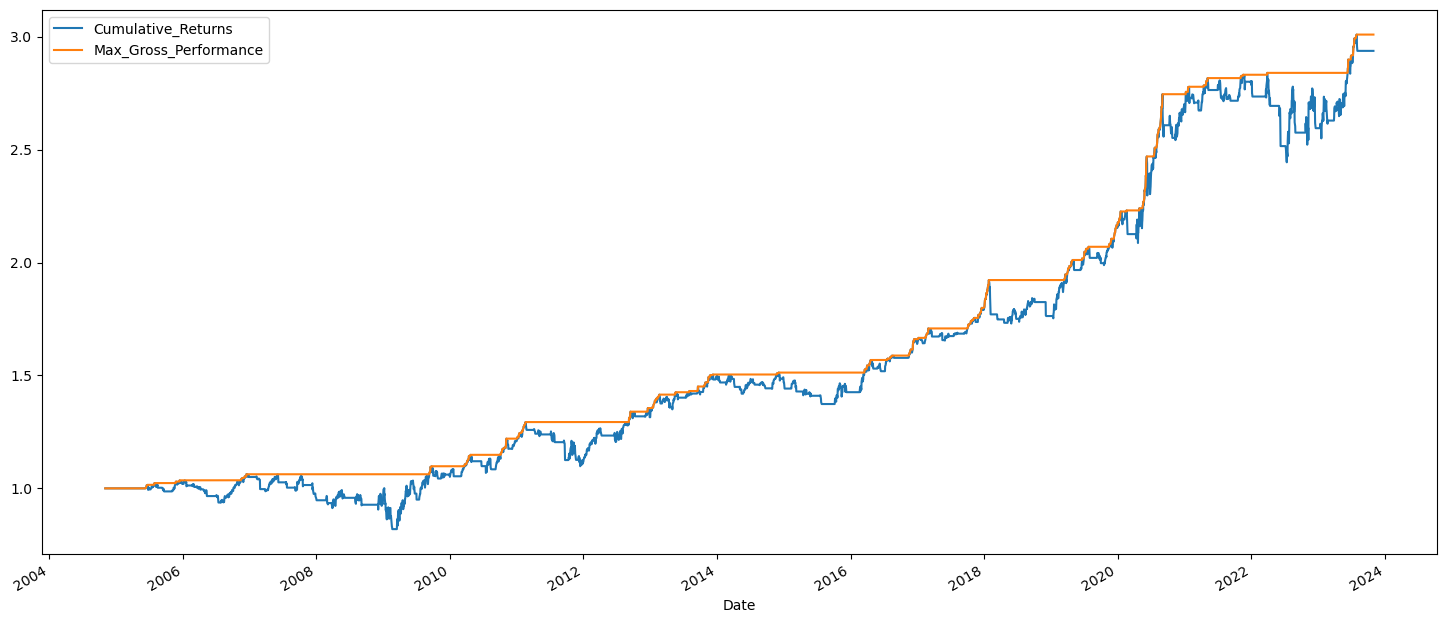

In [39]:
SPY_macd[["Cumulative_Returns", "Max_Gross_Performance"]].dropna().plot(figsize = [18, 8])

### <a id = "p2.2">2.2 </a> <font color = "green"> Mean-Reversion Trading Strategies </font>  [back to table of contents](#top)

### <a id = "p2.2.1">2.2.1 </a> <font color = "green"> Simple Mean-Reversion </font>  [back to table of contents](#top)

In [40]:
def CalculateCashReturn(dataframe,capital):
    
    #Calculate cummulative return --> only for our comparison with strategy returns
    dataframe['CUMULATIVE RETURN'] = \
        dataframe['SPY_Returns'].cumsum().apply(np.exp)
    
    #Calculate cummulative strategy return
    dataframe['CUMULATIVE STRATEGY'] = \
        dataframe['Strategy_Returns'].cumsum().apply(np.exp)
    
    #Final cash return
    capital = \
        capital * dataframe['CUMULATIVE STRATEGY'][-1]

    return capital

In [41]:
final_capital_smr = CalculateCashReturn(MeanReversion(data,42,3),1e5)
final_capital_smr

88764.26672567212

<Axes: xlabel='Date'>

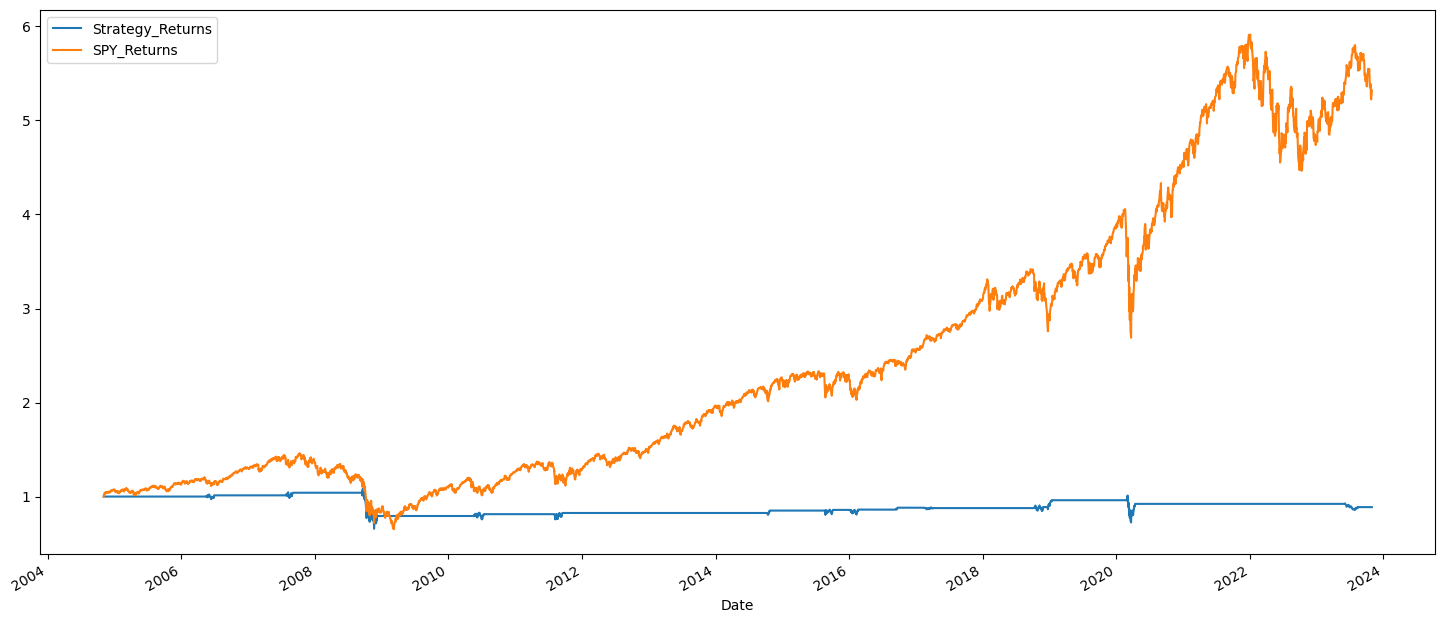

In [42]:
spy_smr[["Strategy_Returns", "SPY_Returns"]].cumsum().apply(np.exp).plot(figsize = [18, 8])

### Sharpe Ratio

In [43]:
sharpe_smr = np.sqrt(252) * (spy_smr["Strategy_Returns"].mean() / spy_smr["Strategy_Returns"].std())
sharpe_smr

-0.05208899923745804

### Compound Annual Growth Rate

In [44]:
days_spy =\
(    (data.index[-1] - data.index[0])
     .days
)

CAGR_SPY_smr = ((final_capital_smr / initial_capital) ** (365.0/days_spy)) - 1
CAGR_SPY_smr

-0.006250619015533032

### Maximum Drawdown & Longest Drawdown Duration

In [45]:
drawdown_smr = 1 - (spy_smr["Cumulative_Returns"] / spy_smr["Max_Gross_Performance"])
drawdown_smr.max()

0.39212081832964285

In [46]:
past_periods_smr =\
(
    drawdown_smr[drawdown_smr == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_smr[drawdown_smr == 0].index[   : -1].to_pydatetime()
)

present_period_smr =\
(
    spy_smr.index[ -1 ].to_pydatetime()
    -
    drawdown_smr[drawdown_smr == 0].index[ -1 ].to_pydatetime()
)

longest_drawdown_smr = max(past_periods_smr.max(), present_period_smr)
longest_drawdown_smr

datetime.timedelta(days=5520)

<Axes: xlabel='Date'>

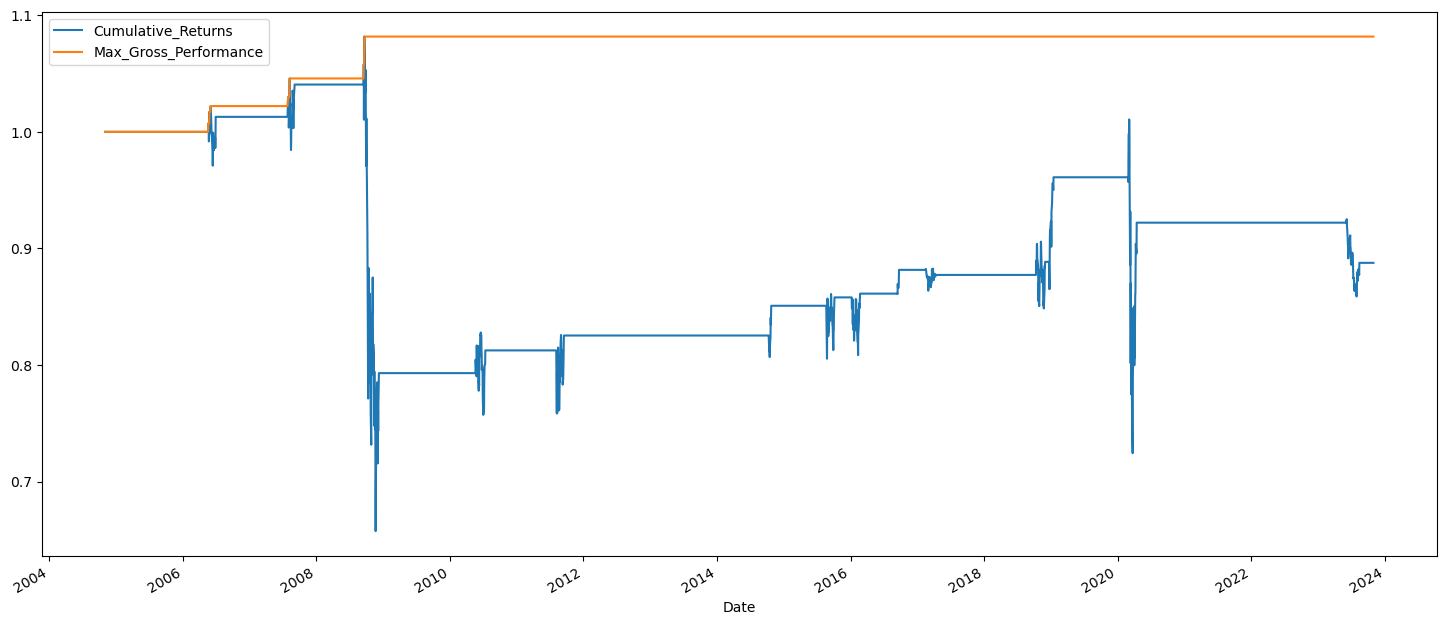

In [47]:
spy_smr[["Cumulative_Returns", "Max_Gross_Performance"]].dropna().plot(figsize = [18, 8])

### <a id = "p2.2.2">2.2.2 </a> <font color = "green"> RSI </font>  [back to table of contents](#top)

### Ending Capital

In [48]:
capital_rsi = initial_capital * SPY["Cumulative_Returns"][-1]
capital_rsi

104407.97278749057

<Axes: xlabel='Date'>

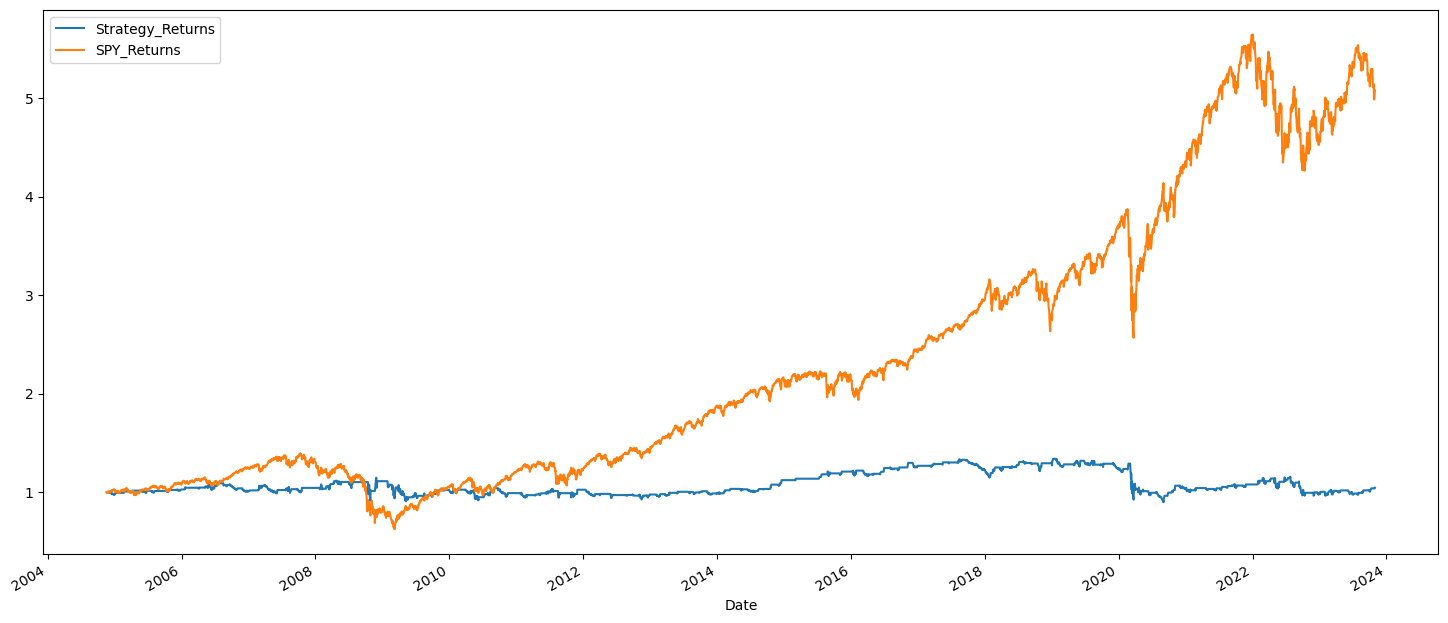

In [49]:
SPY[["Strategy_Returns","SPY_Returns"]].cumsum().apply(np.exp).plot(figsize = [18, 8])

### Sharpe Ratio

In [50]:
sharpe_rsi = np.sqrt(252) * (SPY["Strategy_Returns"].mean() / SPY["Strategy_Returns"].std())
sharpe_rsi

0.01750801122785079

### Compound Annual Growth Rate

In [51]:
days_spy =\
(    (SPY.index[-1] - SPY.index[0])
     .days
)

CAGR_SPY_rsi = ((capital_rsi / initial_capital) ** (365.0/days_spy)) - 1
CAGR_SPY_rsi

0.0022774901127704528

### Maximum Drawdown & Longest Drawdown Duration

In [52]:
drawdown_rsi = 1 - (SPY["Cumulative_Returns"] / SPY["Max_Gross_Performance"])
drawdown_rsi.max()

0.32986612745723054

In [53]:
past_periods_rsi =\
(
    drawdown_rsi[drawdown_rsi == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_rsi[drawdown_rsi == 0].index[   : -1].to_pydatetime()
)

present_period_rsi =\
(
    SPY.index[ -1 ].to_pydatetime()
    -
    drawdown_rsi[drawdown_rsi == 0].index[ -1 ].to_pydatetime()
)

longest_drawdown_rsi = max(past_periods_rsi.max(), present_period_rsi)
longest_drawdown_rsi

datetime.timedelta(days=2418)

<Axes: xlabel='Date'>

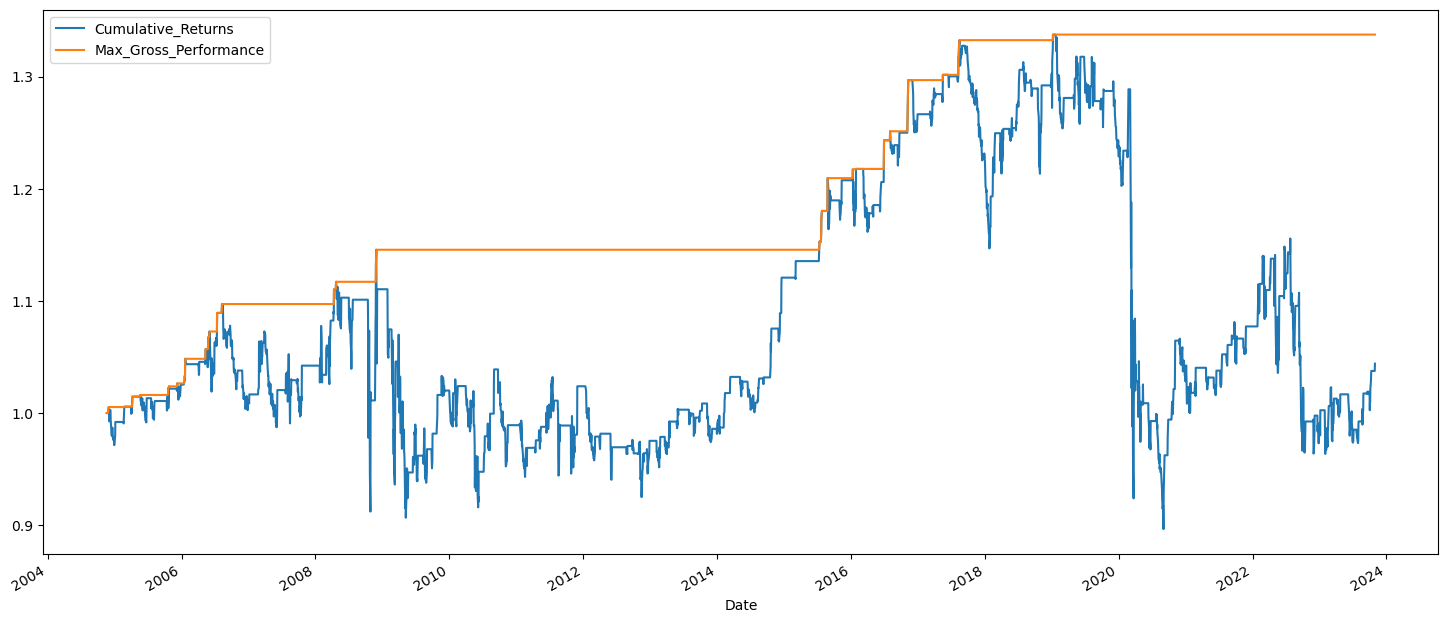

In [54]:
SPY[["Cumulative_Returns", "Max_Gross_Performance"]].dropna().plot(figsize = [18, 8])

### <a id = "p2.3">2.3 </a> <font color = "green"> Supervised Machine Learning </font>  [back to table of contents](#top)

## Fitting Selected Model [1,2,3,4] ElasticNet()

### Ending Capital

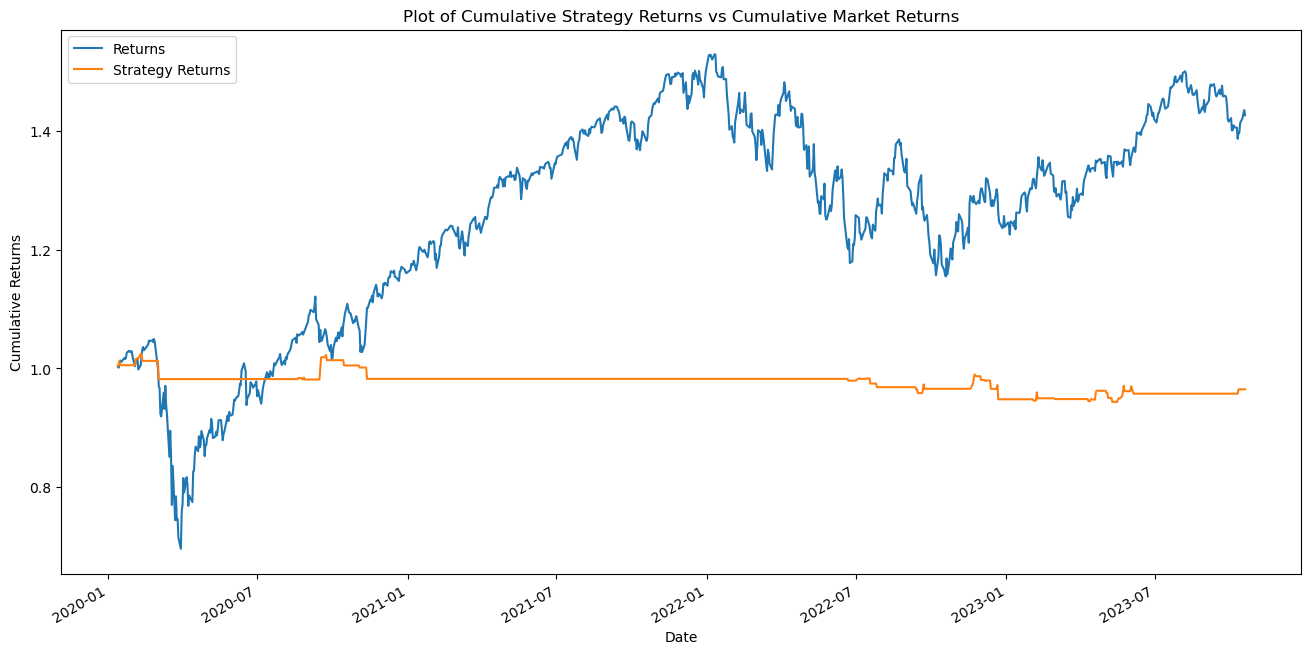

In [ ]:
selected_df_model_strategy_df_for_plotting[['Returns','Strategy Returns']].dropna().cumsum().apply(np.exp).plot(figsize = (16,8))
plt.title('Plot of Cumulative Strategy Returns vs Cumulative Market Returns')
plt.ylabel('Cumulative Returns')
plt.show()

In [ ]:
initial_capital = 100000
ending_capital = selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).iloc[-1]['Cumulative Returns'] * initial_capital
ending_capital

96452.84200781715

### Sharpe Ratio

In [ ]:
sharpe = np.sqrt(253)*selected_df_model_strategy_df["Strategy Returns"].mean()/selected_df_model_strategy_df["Strategy Returns"].std()
sharpe

-0.25273603739642564

### Compound Annual Growth Rate

In [ ]:
selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).set_index('Date').index[0]

Timestamp('2020-01-13 00:00:00')

In [ ]:
trading_days = selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).set_index('Date').index[-1] - selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).set_index('Date').index[0]
trading_days.days

1375

In [ ]:
CAGR = (ending_capital / initial_capital) ** (365 / trading_days.days) - 1
CAGR

-0.009541341083675992

### Maximum Drawdown & Longest Drawdown Duration

In [ ]:
drawdown_df = selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).set_index('Date')
# Create Max Gross Performance column
drawdown_df['Max Gross Performance'] = drawdown_df['Cumulative Returns'].cummax()
# Create Drawdown column
drawdown_df['Drawdown'] = drawdown_df['Max Gross Performance'] - drawdown_df['Cumulative Returns']
drawdown_df

,SPY,Weekly Predicted,Signal,Positions,Returns,Strategy Returns,Cumulative Returns,Max Gross Performance,Drawdown
Date,,,,,,,,,
2020-01-13,305.135559,304.508826,0,-1.0,0.003808,0.003808,1.003815,1.003815,0.000000
2020-01-14,304.277649,304.508826,1,1.0,-0.002816,0.002816,1.006645,1.006645,0.000000
2020-01-15,305.899292,304.508826,0,-1.0,0.005315,0.005315,1.012010,1.012010,0.000000
2020-01-16,307.973450,304.508826,0,0.0,0.006758,-0.006758,1.005194,1.012010,0.006816
2020-01-17,307.087219,305.042633,0,0.0,-0.002882,-0.000000,1.005194,1.012010,0.006816
...,...,...,...,...,...,...,...,...,...
2023-10-13,429.540009,423.998211,0,0.0,0.011803,0.000000,0.964528,1.024120,0.059591
2023-10-16,432.290009,423.998211,0,0.0,0.006382,0.000000,0.964528,1.024120,0.059591
2023-10-17,434.540009,423.998211,0,0.0,0.005191,0.000000,0.964528,1.024120,0.059591


####  The Max Drawdown is 0.08097786373309368

In [ ]:
# Plot Drawdown: Plot of 'Cumulative Returns' vs 'Max Gross Performance'
def plot_drawdown(df, cumulative_returns_column, max_gross_performance_column):
    df[[cumulative_returns_column, max_gross_performance_column]].plot(figsize = (16,8))
    plt.title('Plot of Cumulative Returns against Max Gross Performance')
    plt.ylabel('Cumulative Returns')
    plt.show()

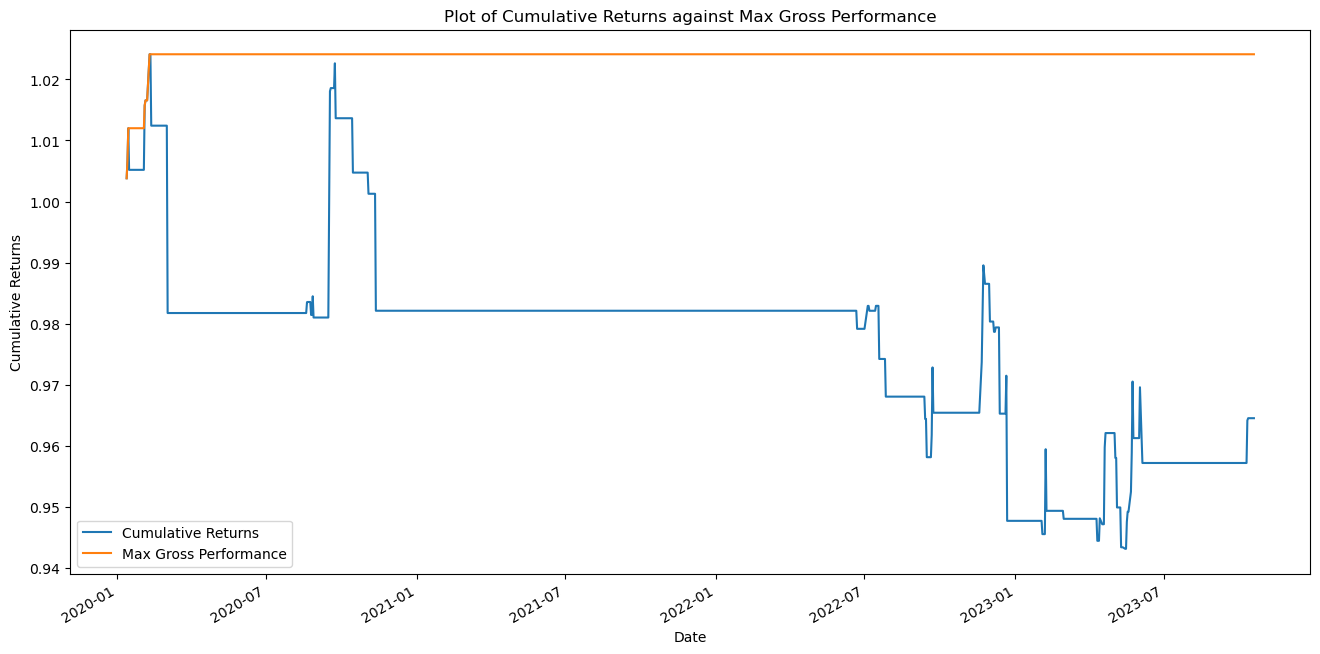

In [ ]:
plot_drawdown(drawdown_df, 'Cumulative Returns', 'Max Gross Performance')

In [ ]:
def get_drawdown_periods(df):
    global drawdown_periods_df
    # Max Drawdown End Periods - Max Drawdown Start Periods
    drawdown_periods_df = pd.DataFrame((df.loc[df['Drawdown'] == 0].index[1:] - df.loc[df['Drawdown'] == 0].index[:-1])).rename(columns = {'Date':'Drawdown Periods'})
    # Add in Drawdown Start date column
    drawdown_periods_df['Drawdown Start'] = df.loc[df['Drawdown'] == 0].index[:-1]
    # Add in Drawdown End date column
    drawdown_periods_df['Drawdown End'] = df.loc[df['Drawdown'] == 0].index[1:]
    # Rearrange column order
    drawdown_periods_df = drawdown_periods_df[['Drawdown Start', 'Drawdown End','Drawdown Periods']]
    # Calculate Max Drawdown for each period; .apply(lambda x: across , axis = 1
    drawdown_periods_df['Max Drawdown'] = drawdown_periods_df.apply(lambda x: df.loc[(df.index >= x['Drawdown Start']) & (df.index < x['Drawdown End'])]['Drawdown'].max(), axis = 1)

    return drawdown_periods_df

In [ ]:
get_drawdown_periods(drawdown_df)

,Drawdown Start,Drawdown End,Drawdown Periods,Max Drawdown
0,2020-01-13,2020-01-14,1 days,0.000000
1,2020-01-14,2020-01-15,1 days,0.000000
2,2020-01-15,2020-02-04,20 days,0.006816
3,2020-02-04,2020-02-05,1 days,0.000000
4,2020-02-05,2020-02-06,1 days,0.000000
5,2020-02-06,2020-02-07,1 days,0.000000
6,2020-02-07,2020-02-10,3 days,0.000000
7,2020-02-10,2020-02-11,1 days,0.000000


In [ ]:
drawdown_periods_df.loc[drawdown_periods_df['Drawdown Periods'] == drawdown_periods_df['Drawdown Periods'].max()]

,Drawdown Start,Drawdown End,Drawdown Periods,Max Drawdown
2,2020-01-15,2020-02-04,20 days,0.006816


In [ ]:
longest_drawdown_period = drawdown_periods_df.loc[drawdown_periods_df['Drawdown Periods'] == drawdown_periods_df['Drawdown Periods'].max()]['Drawdown Periods']
longest_drawdown_period

2   20 days
Name: Drawdown Periods, dtype: timedelta64[ns]

## Fitting Selected Model [0,1,3,4,5,6] SVR()

### Ending Capital

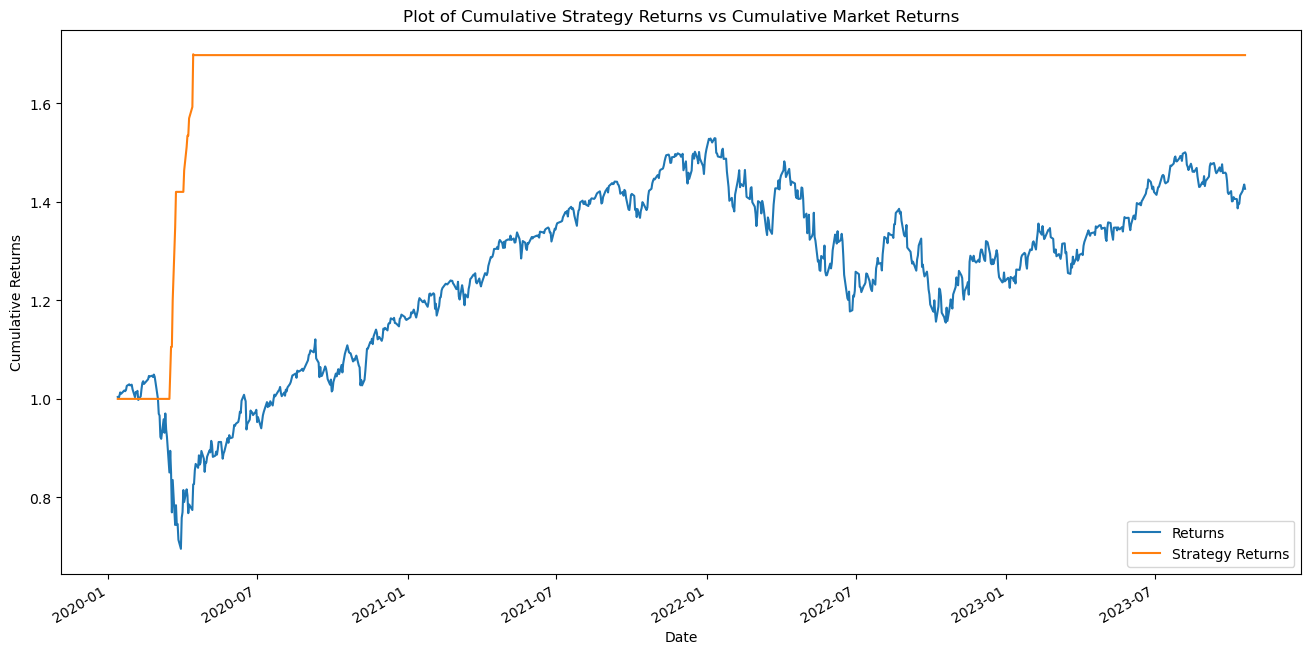

In [ ]:
selected_df_model_strategy_df_for_plotting[['Returns','Strategy Returns']].dropna().cumsum().apply(np.exp).plot(figsize = (16,8))
plt.title('Plot of Cumulative Strategy Returns vs Cumulative Market Returns')
plt.ylabel('Cumulative Returns')
plt.show()

In [ ]:
initial_capital = 100000
ending_capital = selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).iloc[-1]['Cumulative Returns'] * initial_capital
ending_capital

169808.84294208096

### Sharpe Ratio

In [ ]:
sharpe = np.sqrt(253)*selected_df_model_strategy_df["Strategy Returns"].mean()/selected_df_model_strategy_df["Strategy Returns"].std()
sharpe

1.4641957260435583

### Compound Annual Growth Rate

In [ ]:
selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).set_index('Date').index[0]

Timestamp('2020-01-13 00:00:00')

In [ ]:
trading_days = selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).set_index('Date').index[-1] - selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).set_index('Date').index[0]
trading_days.days

1375

In [ ]:
CAGR = (ending_capital / initial_capital) ** (365 / trading_days.days) - 1
CAGR

0.15091700699599553

### Maximum Drawdown & Longest Drawdown Duration

In [ ]:
drawdown_df = selected_df_model_strategy_df.dropna(subset=['Cumulative Returns']).set_index('Date')
# Create Max Gross Performance column
drawdown_df['Max Gross Performance'] = drawdown_df['Cumulative Returns'].cummax()
# Create Drawdown column
drawdown_df['Drawdown'] = drawdown_df['Max Gross Performance'] - drawdown_df['Cumulative Returns']
drawdown_df

,SPY,Weekly Predicted,Signal,Positions,Returns,Strategy Returns,Cumulative Returns,Max Gross Performance,Drawdown
Date,,,,,,,,,
2020-01-13,305.135559,295.342463,0,0.0,0.003808,0.0,1.000000,1.000000,0.000000
2020-01-14,304.277649,295.342463,0,0.0,-0.002816,-0.0,1.000000,1.000000,0.000000
2020-01-15,305.899292,295.342463,0,0.0,0.005315,0.0,1.000000,1.000000,0.000000
2020-01-16,307.973450,295.342463,0,0.0,0.006758,0.0,1.000000,1.000000,0.000000
2020-01-17,307.087219,293.886609,0,0.0,-0.002882,-0.0,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2023-10-13,429.540009,90.215282,0,0.0,0.011803,0.0,1.698088,1.699819,0.001731
2023-10-16,432.290009,90.215282,0,0.0,0.006382,0.0,1.698088,1.699819,0.001731
2023-10-17,434.540009,90.215282,0,0.0,0.005191,0.0,1.698088,1.699819,0.001731


####  The Max Drawdown is 0.0017309279913857445

In [ ]:
# Plot Drawdown: Plot of 'Cumulative Returns' vs 'Max Gross Performance'
def plot_drawdown(df, cumulative_returns_column, max_gross_performance_column):
    df[[cumulative_returns_column, max_gross_performance_column]].plot(figsize = (16,8))
    plt.title('Plot of Cumulative Returns against Max Gross Performance')
    plt.ylabel('Cumulative Returns')
    plt.show()

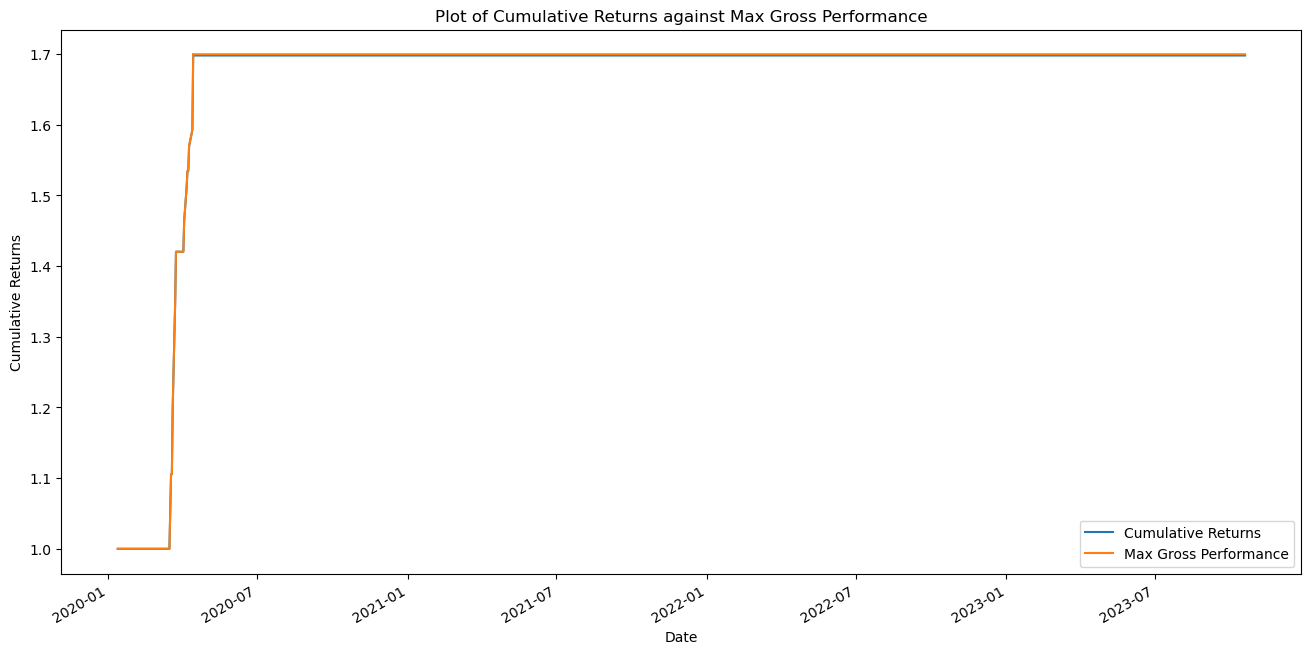

In [ ]:
plot_drawdown(drawdown_df, 'Cumulative Returns', 'Max Gross Performance')

In [ ]:
def get_drawdown_periods(df):
    global drawdown_periods_df
    # Max Drawdown End Periods - Max Drawdown Start Periods
    drawdown_periods_df = pd.DataFrame((df.loc[df['Drawdown'] == 0].index[1:] - df.loc[df['Drawdown'] == 0].index[:-1])).rename(columns = {'Date':'Drawdown Periods'})
    # Add in Drawdown Start date column
    drawdown_periods_df['Drawdown Start'] = df.loc[df['Drawdown'] == 0].index[:-1]
    # Add in Drawdown End date column
    drawdown_periods_df['Drawdown End'] = df.loc[df['Drawdown'] == 0].index[1:]
    # Rearrange column order
    drawdown_periods_df = drawdown_periods_df[['Drawdown Start', 'Drawdown End','Drawdown Periods']]
    # Calculate Max Drawdown for each period; .apply(lambda x: across , axis = 1
    drawdown_periods_df['Max Drawdown'] = drawdown_periods_df.apply(lambda x: df.loc[(df.index >= x['Drawdown Start']) & (df.index < x['Drawdown End'])]['Drawdown'].max(), axis = 1)

    return drawdown_periods_df

In [ ]:
get_drawdown_periods(drawdown_df)

,Drawdown Start,Drawdown End,Drawdown Periods,Max Drawdown
0,2020-01-13,2020-01-14,1 days,0.0
1,2020-01-14,2020-01-15,1 days,0.0
2,2020-01-15,2020-01-16,1 days,0.0
3,2020-01-16,2020-01-17,1 days,0.0
4,2020-01-17,2020-01-21,4 days,0.0
...,...,...,...,...
58,2020-04-06,2020-04-07,1 days,0.0
59,2020-04-07,2020-04-08,1 days,0.0
60,2020-04-08,2020-04-09,1 days,0.0
61,2020-04-09,2020-04-13,4 days,0.0


In [ ]:
drawdown_periods_df.loc[drawdown_periods_df['Drawdown Periods'] == drawdown_periods_df['Drawdown Periods'].max()]

,Drawdown Start,Drawdown End,Drawdown Periods,Max Drawdown
4,2020-01-17,2020-01-21,4 days,0.0
23,2020-02-14,2020-02-18,4 days,0.0
61,2020-04-09,2020-04-13,4 days,0.0


In [ ]:
longest_drawdown_period = drawdown_periods_df.loc[drawdown_periods_df['Drawdown Periods'] == drawdown_periods_df['Drawdown Periods'].max()]['Drawdown Periods']
longest_drawdown_period

4    4 days
23   4 days
61   4 days
Name: Drawdown Periods, dtype: timedelta64[ns]

## <a id = "p3">3.</a>  <font color = "green"> Executive Summary of Strategies and Backtesting Results </font>  [back to table of contents](#top)

## Part 3 (7 points)
Third, you should write up an executive summary of your strategies and backtesting results. Please report at least your `top three strategies` (i.e., strategy A, strategy B, strategy C). In this summary, you should discuss Sharpe Ratio, compound annual growth rate, and maximum drawdown, comparing your results for strategies A, B, and C. For each of the three sections, please provide a bookmark in your Jupyter Notebook file (for easy access).

### <a id = "p3.1">3.1 </a> <font color = "green"> Simple Moving Average Crossover </font>  [back to table of contents](#top)

We observed that our momentum simple moving average strategy achieves the maximum cumulative return when the short-term window is set to 46 and the long-term window is set to 161. Based on these two rolling windows, the final capital for the momentum simple moving average strategy reaches 460,540 dollars, with a maximum drawdown of 0.380, a Sharpe ratio of 0.416, and a CAGR of 0.08.

### <a id = "p3.2">3.2 </a> <font color = "green"> MACD </font>  [back to table of contents](#top)

We observed that the MACD strategy yields the highest cumulative return when the short-term window is set to 24 and the long-term window is set to 146. Based on these two rolling windows, the final capital for the MACD strategy reaches 293,699 dollars, with a maximum drawdown of 0.004, a Sharpe ratio of 0.54, and a CAGR of 0.0583.

### <a id = "p3.3">3.3 </a> <font color = "green"> Support Vector Regression & Elastic Net (Supervised Machine Learning) </font>  [back to table of contents](#top)

* ### Preamble and Methodology

In our supervised machine learning strategy, we focused on experimenting with various combinations of exogenous variables to arrive at a model that best predicts SPY returns/prices and which hopefully also produces the highest cumulative returns when employed in a trading strategy.

We began our study by shortlisting a list of potential exogenous variables namely the Dow Jones Industrial Average (DJIA), NASDAQ 100, VIX, as well as the USD/JPY and USD/GBP currency pairs which we initially hypothesised to be instrumental in predicting SPY returns/prices.

First and foremost, we perform Exploratory Data Analysis (EDA) using correlation matrices and the calculation of mutual information regression scores to guide us in our feature selection. We then performed an OLS regression on the variables to determine which variables are statistically significant in explaining the variation in SPY returns/prices. The results are shown in Part 1 of our report.
While methods such as OLS regression, mutual info regression and other feature selection methods have given us some indication of which exogenous variables could potentially prove useful in forecasting SPY prices/returns, we have elected to allow the data to speak for itself. Hence, we wrote a programme to determine the optimal combination of variables, while concurrently determining the optimal supervised ML algorithm that yields the best results in terms of lowest Mean Squared Error (MSE) during backtesting as well as the highest cumulative returns when deployed in a trading strategy.
Since we employ a 5-trading day lag across the board to all our variables, we have essentially elected to generate our forecasts of SPY returns in weekly time intervals. Consequently, the supervised ML algorithm will also generate forecasts of SPY returns in weekly time steps. Having obtained this series of weekly forecasted SPY returns, we are then able to calculate cumulative returns at weekly time intervals. Given that we have knowledge of the last adjusted SPY close price at the end of the training period, we are also able to back into the implied SPY prices at weekly intervals.
Yet, we are cognisant that these weekly signals are generated only at market close of the trading day which implies that the soonest that one would be able to act on the generated trading signal is the next trading day. Taking these practical considerations into account, we have elected to merge the series of weekly forecasts into the original daily time series where we are then able to initiate buy/sell positions by comparing actual SPY prices for the day against the predicted SPY prices for the next week. We achieve this by using .ffill() to fill the NaN values that originally existed in the daily time series between weekly price predictions. Thus, if the following week's predicted SPY price is higher than the actual SPY price for the day, we will generate a Buy Signal.

* ### Discussion of Results

The results of our rigorous process in determining the optimal combination of exogenous variables and the optimal supervised ML algorithm for this purpose yielded the following results:

#### Supervised ML Model / Strategy with the best predictive power
The ElasticNet() model with the exogenous variables Dow Jones Industrial Average (DJIA), Nasdaq 100, US Dollar Index and the VIX resulted in the model with the best predictive ability. This means that it was able to produce forecasts of SPY returns/prices with the lowest Mean Squared Error (MSE) amongst all other explored combinations of variables and supervised ML algorithms.

Interestingly, this combination of exogenous variables also aligns with the insights that can be gleaned from our EDA analysis and feature selection. Yet, it was interesting to note that this model produced poor cumulative returns when employed in our trading strategy.

#### Supervised ML Model / Strategy with the best cumulative returns
On the other hand, the Support Vector Regression SVR() model with the exogenous variables Crude Oil (WTI), Dow Jones Industrial Average (DJIA), US Dollar Index, VIX, as well as the currency pairs USD/JPY and USD/GBP resulted in the strategy that produced the highest cumulative returns amongst all the other explored combinations of variables and supervised ML algorithms, going to the extent of beating the market. Yet, on closer analysis, it is apparent that the fitted model yields a poor forecast of SPY returns/prices. Therefore, it is very likely sheer coincidence / luck that allowed this model / strategy to beat the market and yield the highest cumulative returns amongst the other supervised ML methods. For this reason, we will not be selecting this model for reporting as part of our top 3 strategies.

### <a id = "p3.4">3.4 </a> <font color = "green"> Summary of Backtesting Results </font>  [back to table of contents](#top)

In [55]:
spy_returns = data[['Adj Close']]
spy_returns['SPY_Returns'] = np.log(spy_returns['Adj Close'] / spy_returns['Adj Close'].shift(1))
spy_returns['SPY_Cumulative_Returns'] = spy_returns["SPY_Returns"].cumsum().apply(np.exp)
spy_returns["SPY_Max_Gross_Performance"] = spy_returns["SPY_Cumulative_Returns"].cummax()
spy_returns

,Adj Close,SPY_Returns,SPY_Cumulative_Returns,SPY_Max_Gross_Performance
Date,,,,
2004-11-01,78.617905,NaN,NaN,NaN
2004-11-02,78.645638,0.000353,1.000353,1.000353
2004-11-03,79.636055,0.012515,1.012951,1.012951
2004-11-04,80.723457,0.013562,1.026782,1.026782
2004-11-05,81.229073,0.006244,1.033213,1.033213
...,...,...,...,...
2023-10-25,417.549988,-0.014456,5.311131,5.913709
2023-10-26,412.549988,-0.012047,5.247532,5.913709
2023-10-27,410.679993,-0.004543,5.223746,5.913709


In [56]:
starting_capital = 1e5

In [57]:
spy_ending_capital = starting_capital * spy_returns['SPY_Cumulative_Returns'].iloc[-1]
spy_ending_capital

531939.9111426481

In [58]:
spy_cumulative_returns = spy_returns['SPY_Cumulative_Returns'].iloc[-1]
spy_cumulative_returns

5.31939911142648

In [59]:
spy_sharpe_ratio = np.sqrt(252) * (spy_returns["SPY_Returns"].mean() / spy_returns["SPY_Returns"].std())
spy_sharpe_ratio

0.4557981565299176

In [60]:
num_of_days = (spy_returns.index[-1] - spy_returns.index[0]).days
num_of_days

6938

In [61]:
spy_cagr = (((spy_ending_capital / starting_capital) ** (365.0/num_of_days)) - 1) * 100
spy_cagr

9.190982639368794

In [62]:
spy_drawdown = 1 - (spy_returns["SPY_Cumulative_Returns"] / spy_returns["SPY_Max_Gross_Performance"])
spy_drawdown

Date
2004-11-01         NaN
2004-11-02    0.000000
2004-11-03    0.000000
2004-11-04    0.000000
2004-11-05    0.000000
                ...   
2023-10-25    0.101895
2023-10-26    0.112650
2023-10-27    0.116672
2023-10-30    0.106111
2023-10-31    0.100497
Length: 4783, dtype: float64

In [63]:
spy_max_drawdown = spy_drawdown.max() * 100
spy_max_drawdown

55.18943486556902

In [64]:
spy_past_periods =\
(
    spy_drawdown[spy_drawdown == 0].index[ 1 :   ].to_pydatetime()
    -
    spy_drawdown[spy_drawdown == 0].index[   : -1].to_pydatetime()
) 

In [65]:
spy_present_period =\
(
    spy_returns.index[ -1 ].to_pydatetime()
    -
    spy_drawdown[spy_drawdown == 0].index[ -1 ].to_pydatetime()
)

In [66]:
spy_longest_drawdown = max(spy_past_periods.max(), spy_present_period)
spy_longest_drawdown

datetime.timedelta(days=1773)

## Overview of Backtesting Results for Top 3 Strategies vs SPY Benchmark Returns for the comparable period

In [69]:
backtesting_results = pd.DataFrame(data=\
             [[max_final_capital, spy["Cumulative_Returns"][-1], sharpe_sma, CAGR_sma*100, drawdown_sma.max()*100, longest_drawdown_sma],
              [final_capital_macd, SPY_macd["Cumulative_Returns"][-1], Sharpe_SPY_macd, CAGR_SPY_macd*100, drawdown_macd.max()*100, longest_drawdown_macd],
              [spy_ending_capital, spy_cumulative_returns, spy_sharpe_ratio, spy_cagr, spy_max_drawdown, spy_longest_drawdown]])

backtesting_results = backtesting_results.rename(columns={0: 'Ending Capital ($)', 1: 'Cumulative Returns', 2: 'Sharpe Ratio', 3: 'CAGR (%)', 4: 'Maximum Drawdown (%)', 5: 'Longest Drawdown Duration'})
backtesting_results = backtesting_results.rename(index={0: 'Simple Moving Average Crossover Returns', 1: 'MACD Returns', 2: 'SPY Benchmark Returns (2004 - 2023)'})
backtesting_results

,Ending Capital ($),Cumulative Returns,Sharpe Ratio,CAGR (%),Maximum Drawdown (%),Longest Drawdown Duration
Simple Moving Average Crossover Returns,460541.916281,4.605419,0.416465,8.366191,38.008704,1373 days
MACD Returns,293699.481727,2.936995,0.539580,5.831715,22.865092,1000 days
SPY Benchmark Returns (2004 - 2023),531939.911143,5.319399,0.455798,9.190983,55.189435,1773 days


In [3]:
backtesting_results = pd.DataFrame(data=\
             [[96452.84200781715, 0.964528, -0.25273603739642564, -0.009541341083675992*100, 0.08097786373309368*100, 20],
              [169808.84294208096, 1.698088, 1.4641957260435583, 0.15091700699599553*100, 0.0017309279913857445*100, 4],
              [146829.845263, 1.468298, 1.127673, 10.816909, 28.463162, 528]])

backtesting_results = backtesting_results.rename(columns={0: 'Ending Capital ($)', 1: 'Cumulative Returns', 2: 'Sharpe Ratio', 3: 'CAGR (%)', 4: 'Maximum Drawdown (%)', 5: 'Longest Drawdown Duration'})
backtesting_results = backtesting_results.rename(index={0: 'Elastic Net (ML) Returns', 1: 'Support Vector Regression (ML) Returns', 2: 'SPY Benchmark Returns (2020 - 2023)'})
backtesting_results

,Ending Capital ($),Cumulative Returns,Sharpe Ratio,CAGR (%),Maximum Drawdown (%),Longest Drawdown Duration
Elastic Net (ML) Returns,96452.842008,0.964528,-0.252736,-0.954134,8.097786,20
Support Vector Regression (ML) Returns,169808.842942,1.698088,1.464196,15.091701,0.173093,4
SPY Benchmark Returns (2020 - 2023),146829.845263,1.468298,1.127673,10.816909,28.463162,528


## <a id = "p4">4.</a>  <font color = "green"> Self-Critique of Trading Strategies </font>  [back to table of contents](#top)

## Part 4 (7 points)
`Self-Critique of Team's Trading Strategies`

* <span style="color:red; font-size:18px; font-weight:bold;">**Critique for Simple Moving Average Crossover and MACD**</span>

Whether employing the momentum simple moving average strategy or the MACD strategy, our objective is to identify rolling windows within the dataset spanning from 2004 to 2023 that maximize cumulative return. Under this specific condition, we can attain the highest returns possible. However, it is important to note that this strategy lacks universality. In other words, over time, without adjusting the rolling window, the efficacy of the strategy may diminish, rendering it less effective in generating maximum returns.

* <span style="color:red; font-size:18px; font-weight:bold;">**Critique for Mean-Reversion and RSI**</span>

For RSI:

The choice of the RSI calculation period, typically 14 days, is subjective, and different periods may yield different results. In certain market conditions, shorter or longer RSI periods may be more suitable. RSI focuses solely on the relative changes in price, overlooking other factors that could influence the market, such as fundamental data. This singularity may result in an incomplete understanding of market conditions.

For mean reversion:

The mean reversion strategy involves an arbitrary choice of the rolling window and threshold, which results in the susceptibility to certain biases. As mentioned in the momentum bias, altering the rolling window and threshold could yield different results, implying that this strategy is tailored to the specific dataset and lacks universal applicability.

* <span style="color:red; font-size:18px; font-weight:bold;">**Survivorship Bias**</span>

For our supervised machine learning approach, we split the dataset into 80% train set and 20% test set. Essentially, we trained our model from 2004 to 2019, and tested our model from 2020 to 2023. As our model is tested and deployed on the SPY from 2020 to 2023, our machine learning models are subject to survivorship bias as some new companies added to the index during these 4 years will not have been trained by our model.

A good example of this would be Apartment Investment and Management (Aimco), and Tesla. Tesla, one of the magnificent-seven stocks in the S&P 500 partly responsible for the 2023 mega-rally in tech/AI stocks (NASDAQ 100) as well as the S&P 500, was actually only included into the S&P 500 on 21 Dec 2020, replacing Aimco. This implies that our machine learning models would have trained itself on the returns and volatility profile of some companies that eventually dropped out of the SPY during the testing period, such as Aimco in this case.

* <span style="color:red; font-size:18px; font-weight:bold;">**Lookahead Bias**</span>

All our strategies are not subject to lookahead bias. Particularly, in our supervised machine learning approach, the data/correlated assets we used for training and backtesting were daily live prices instead of economic data that is reported on a quarterly basis, such as quarterly GDP. We have also shifted our trading entry point to only enter a trading position at the next trading day, so as to add realism to the fact that the earliest possible time we are able to react based on information from today is the next trading day. This has significantly affected our profits.

* <span style="color:red; font-size:18px; font-weight:bold;">**Market Regime Shift**</span>

For our supervised machine learning approach, since our train set period was between 2004 to 2019, our machine learning models were not trained on market conditions such as the period when the Covid-19 pandemic hit the world. This occurred in Mar 2020, when the market plunged roughly 34% within 23 trading days. In other words, this implies that our models were not trained on such a fast and steep selloff, and hence may be less effective in identifying such sudden declines. On the other hand, our models were trained on longer bear markets such as the financial crisis from Oct 2007 to Mar 2009, which took 1.5 years to fall from a peak to trough of over 50%, and the subsequent decade long bull market from Mar 2009 to Feb 2020.

* <span style="color:red; font-size:18px; font-weight:bold;">**Strategies to Mitigate Survivorship Bias and Market Regime Shift**</span>

To mitigate survivorship bias and market regime shift, our group believes that on top of looping for the optimal combination of variables, our supervised machine learning approach can be further improved by:

Running the supervised machine learning strategy on a rolling window basis, then for each window/period, we can fit the model with the lowest mean squared error (MSE), and deploy that model on the test set for our trading strategy. In essence, each period may have a different selected model.

For instance, a period could be 1 year, and we have 9 months of training followed by 3 months of testing and deployment (75% train set, 25% test set). Then, the training for the second period begins 3 months after the training for the first period.

Period 1: Nov 2004 - Oct 2005
- Train Set 1: Nov 2004 - Jul 2005
- Test Set 1: Aug 2005 - Oct 2005

Period 2: Feb 2005 - Jan 2006
- Train Set 2: Feb 2005 - Oct 2005
- Test Set 2: Nov 2005 - Jan 2006

Period 3: May 2005 - Apr 2006
- Train Set 3: May 2005 - Jan 2006
- Test Set 3: Feb 2006 - Apr 2006

This goes on until the final period.

Period N-1: Aug 2022 - Jul 2023
- Train Set N-1: Aug 2022 - Apr 2023
- Test Set N-1: May 2023 - Jul 2023

Period N: Nov 2022 - Oct 2023
- Train Set N: Nov 2022 - Jul 2023
- Test Set N: Aug 2023 - Oct 2023

This strategy mitigates survivorship bias and market regime shift by shortening the time gap between each train and test period, so that the data used to train the model is more recent and will more likely include similar S&P 500 constituents in both the train and test set.

* <span style="color:red; font-size:18px; font-weight:bold;">**Concluding Remarks**</span>

Ultimately, these trading strategies, especially the less sophisticated strategies such as the momentum and mean-reversion strategies, are susceptible to "crowding risk" (otherwise referred to as alpha decay). A strategy is at risk of being crowded when there is an influx of market participants following the same strategy, resulting in the degradation of those profitable patterns. Therefore, we ought to be cognizant that the process of alpha generation is a dynamic and continuous endeavor.

Alpha, or excess return, is a product of exploiting market inefficiencies, and as financial markets evolve, so do these inefficiencies. Continuous quant research is paramount to staying ahead of the curve. Quantitative researchers and algorithmic traders must engage in ongoing analysis and refinement of their models to adapt to changing market conditions.

## Contribution Statements

#### Denton
> Denton was responsible for exploring the use of supervised ML models in predicting SPY returns/prices and subsequently crafting the strategy for their deployment in trading. By writing code to rigorously explore and determine the optimal combination of variables for use in SPY returns/price prediction, he was able to arrive at 2 models, one which had the best predictive ability (lowest MSE during backtesting), and the other which produced the highest cumulative returns amongst the various ML algorithms and combinations of exogenous variables explored.

#### Cai Yihan
> Cai Yihan was responsible for  mean reversion (MACD-RSI）strategy.

#### Daniel Soh
> Daniel was responsible for writing part of the self-critique of the team’s strategies, assisting with machine learning strategies, calculating several performance metrics for the momentum and mean-reversion trading strategies, summarizing the backtesting results as well as collating the ipynb file.

#### Hao Tong Wang
> Wang Haotong was responsible for building momentum trading strategies (SMA,MACD) and mean reversion trading strategies (simple mean reversion, RSI) for the SPY stock price and explaining possible biases for the trading strategies.

#### Hanyu Pang
> Pang Hanyu explored the momentum strategy and made preparations for the report such as making a table of contents and reintegrating some data into new locations.
